# Analise dos Dados
Neste notebook serão analisados os dados a serem empregados nos modelos de aprendizado de máquina

In [1]:
from google.colab import drive
import os

# monta o drive no Google Drive para acesso aos dados
drive.mount('/content/drive/')

# Muda para a pasta de trabalho inicial onde estão os dados
os.chdir("/content/drive/My Drive/Colab Notebooks/TCC/")

Mounted at /content/drive/


In [2]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import FuncoesAuxiliares as fn

pd.set_option('precision', 4)
pd.options.display.max_columns = 16

In [3]:
# importa dos dados do modelo
Modelo = pd.read_excel('Modelo.xlsx')
print(Modelo)

       Ano  Município              Nome   TB0   TB1    TB2    TB3       TB4  \
0     2007     110020  PORTO VELHO (RO)   633   641   8982   7381   3884.67   
1     2008     110020  PORTO VELHO (RO)   225   133  12099  12021  10369.06   
2     2009     110020  PORTO VELHO (RO)   914   867  25559  24298  15258.53   
3     2010     110020  PORTO VELHO (RO)   811   774  27643  27428  30332.58   
4     2011     110020  PORTO VELHO (RO)   325   247  10104   9041  15191.44   
...    ...        ...               ...   ...   ...    ...    ...       ...   
2395  2014     530010     BRASILIA (DF) -4093 -4076  27762  32611  37829.15   
2396  2015     530010     BRASILIA (DF) -4123 -3750 -76622 -72733 -40831.33   
2397  2016     530010     BRASILIA (DF)  -928  -963   5505   6868   6336.61   
2398  2017     530010     BRASILIA (DF)   386   292  -9344  -8674 -33699.14   
2399  2018     530010     BRASILIA (DF) -2289 -2248  -5694  -4244  -3484.31   

      ...      RC8S      RC9S   SE1M  SE2M      SE1

In [4]:
# guarda a descrição dos dados do modelo
descricao = Modelo.describe()
print(descricao)

             Ano    Município         TB0         TB1          TB2  \
count  2400.0000    2400.0000   2400.0000   2400.0000    2400.0000   
mean   2012.5000  344233.6350    222.5037    198.5725    3163.5567   
std       3.4528   79207.5753   1583.2098   1520.4727   20381.9231   
min    2007.0000  110020.0000 -19629.0000 -20396.0000 -219378.0000   
25%    2009.7500  315037.5000    -70.0000    -73.0000    -771.5000   
50%    2012.5000  351440.0000     94.0000     86.0000    1579.0000   
75%    2015.2500  355632.5000    354.2500    334.0000    4573.7500   
max    2018.0000  530010.0000  32207.0000  30336.0000  349043.0000   

               TB3          TB4         TB5  ...        RC8S        RC9S  \
count    2400.0000    2400.0000  2.4000e+03  ...  2.4000e+03  2.4000e+03   
mean     2857.5446    2828.7579  3.8193e+05  ... -8.3649e+05  3.5086e+05   
std     18833.0782   17813.5867  1.2835e+06  ...  6.9018e+06  1.9274e+06   
min   -197035.0000 -191279.7500 -1.3239e+06  ... -1.3561e+08 -9.0

## Análise do PIB

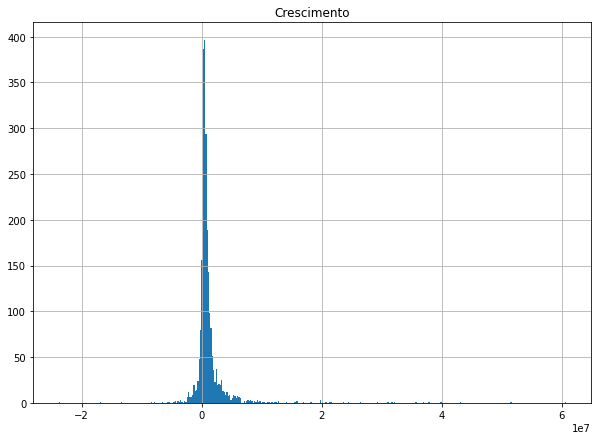

In [ ]:
# Histograma do crescimento do PIB
hist = Modelo.hist(column=['Crescimento'],figsize=(10,7),bins=384)

Observa-se que há uma pequena quantidade de valores de crescimento do PIB bem
distantes da média, que merecem ser investigados

In [ ]:
# verifica as cidades que têm valores fora de 2x desvio padrão
media = descricao['Crescimento']['mean']
desv = descricao['Crescimento']['std'] * 2
# linhas do modelo fora de 2x desvio padrão
ForaDesv = Modelo.loc[(Modelo.Crescimento>=(media+desv))|(Modelo.Crescimento<=(media-desv))]
# totalização
ForaDesvCount = ForaDesv[['Município','Nome','Crescimento']].\
  groupby(['Município','Nome'],as_index=False).aggregate(np.count_nonzero)
ForaDesvCount.Crescimento = pd.to_numeric(ForaDesvCount.Crescimento,downcast='integer')
print(ForaDesvCount)

    Município                        Nome  Crescimento
0      150553            PARAUAPEBAS (PA)            1
1      310620         BELO HORIZONTE (MG)            1
2      330070              CABO FRIO (RJ)            1
3      330100  CAMPOS DOS GOYTACAZES (RJ)            7
4      330170        DUQUE DE CAXIAS (RJ)            1
5      330270                 MARICA (RJ)            1
6      330330                NITEROI (RJ)            1
7      330455         RIO DE JANEIRO (RJ)           11
8      353080             MOGI MIRIM (SP)            2
9      353440                 OSASCO (SP)            1
10     353650               PAULINIA (SP)            2
11     355030              SAO PAULO (SP)           12
12     410690               CURITIBA (PR)            1
13     530010               BRASILIA (DF)           12


In [ ]:
# Carrega a tabela com as medias dos PIB municipais
PIBMunicipiosSomaAnos = pd.read_excel('PIBMunicipiosSomaAnos.xlsx')
PIBMunicipiosSomaAnos['Código do Município'] =\
  np.int64(PIBMunicipiosSomaAnos['Código do Município']/10)
# separa só os municipios fora do desvio
PIBForaDesv = PIBMunicipiosSomaAnos.loc[PIBMunicipiosSomaAnos['Código do Município'].isin(ForaDesvCount.Município)]
PIBForaDesv[['Código do Município','PIB Médio']].join(ForaDesvCount.set_index('Município'),on='Código do Município')

Código do Município   PIB Médio                        Nome  Crescimento
0                 355030  5.2271e+08              SAO PAULO (SP)           12
1                 330455  2.5026e+08         RIO DE JANEIRO (RJ)           11
2                 530010  1.6920e+08               BRASILIA (DF)           12
3                 310620  6.9736e+07         BELO HORIZONTE (MG)            1
4                 410690  6.6815e+07               CURITIBA (PR)            1
7                 353440  5.1330e+07                 OSASCO (SP)            1
13                330100  3.9483e+07  CAMPOS DOS GOYTACAZES (RJ)            7
19                330170  2.7460e+07        DUQUE DE CAXIAS (RJ)            1
31                330330  1.8801e+07                NITEROI (RJ)            1
33                353650  1.8008e+07               PAULINIA (SP)            2
51                150553  1.2818e+07            PARAUAPEBAS (PA)            1
60                330070  1.1359e+07              CABO FRIO (RJ)            1
98                330270  6.6314e+06                 MARICA (RJ)            1
179               353080  3.9310e+06             MOGI MIRIM (SP)            2

Parte dos municípios estão entre os 10 maiores, logo espera-se valores de maior variação. Já os demais, com os códigos [330100,330170,330330,353650,150553,330070,330270,353080] inspiram alguma análise

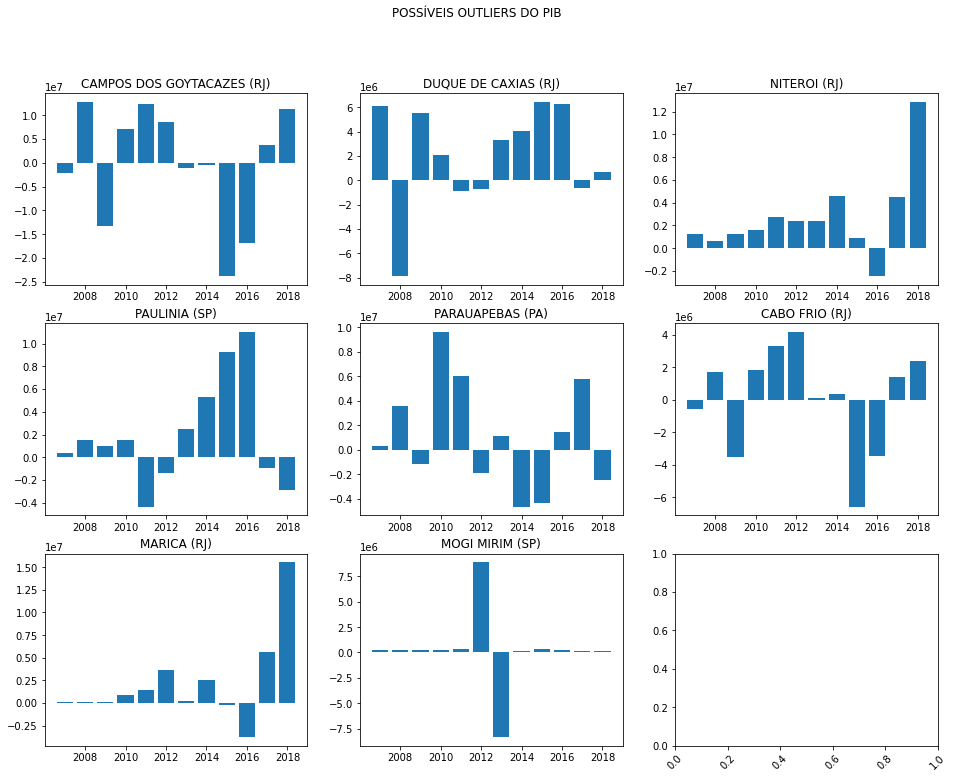

In [ ]:
# Extrai do modelo todas as linhas com dados dos municipios com suspeitos
# de serem outliers, para comparação dos dados em todos os anos
Analise = [330100,330170,330330,353650,150553,330070,330270,353080]
PIBForaDesvBar = Modelo.loc[Modelo['Município'].isin(Analise)].sort_values(['Município','Ano'])[['Município','Nome','Ano','Crescimento']]
# plotagem dos dados
figure, axis = plt.subplots(3,3,figsize=(16, 12))
plt.suptitle('POSSÍVEIS OUTLIERS DO PIB')
plt.xticks(rotation=45)
offset = 0
for i in range(0,3):
  for j in range(0,3):
    if ((i==2)and(j==2)):
      break
    z = PIBForaDesvBar.loc[PIBForaDesvBar.Município==Analise[i+j+offset]]
    axis[i,j].bar(z['Ano'],z['Crescimento'])
    axis[i,j].set_title(z.Nome.iloc[0])
  offset = offset+2
plt.show()

Analisando o gráfico, verifica-se que há grandes variações ano a ano, exceto para o município de MOGI MIRIM. Inclusive vários municípios do estado do Rio de janeiro, que sofreu grandes impactos econômicos devido à mudança ocorrida na área do petróleo. Assim, concluímos pelos outliers os dados de 2012 e 2013 de MOGI MIRIM (SP), a serem excluídos.

In [ ]:
# exclui os outliers
index = []
index.append(Modelo.loc[(Modelo.Município==353080)&(Modelo.Ano==2012)].index[0])
index.append(Modelo.loc[(Modelo.Município==353080)&(Modelo.Ano==2013)].index[0])
Modelo.drop(index,inplace=True)
# reseta o indice em sequencia contínua
Modelo.reset_index(drop=True,inplace=True)

Verificando o histograma dos dados mais próximos à media, conforme abaixo,
verifica-se que a distribuição tem uma conformação semelhante à distribuição normal



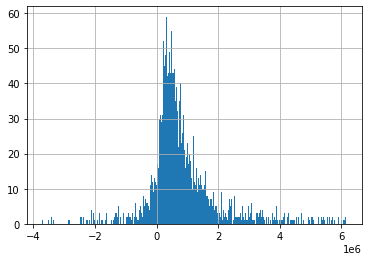

In [ ]:
# verifica a distribuição dos dados que estão dentro do desvio padrão
DentroDesv = Modelo.loc[~((Modelo.Crescimento>=(media+5e6))|
                          (Modelo.Crescimento<=(media-5e6)))]
hist = DentroDesv.Crescimento.hist(bins=384)

## Análise de dados Tabela 1685
Cadastro Central de Empresas, referente a tabela 1685

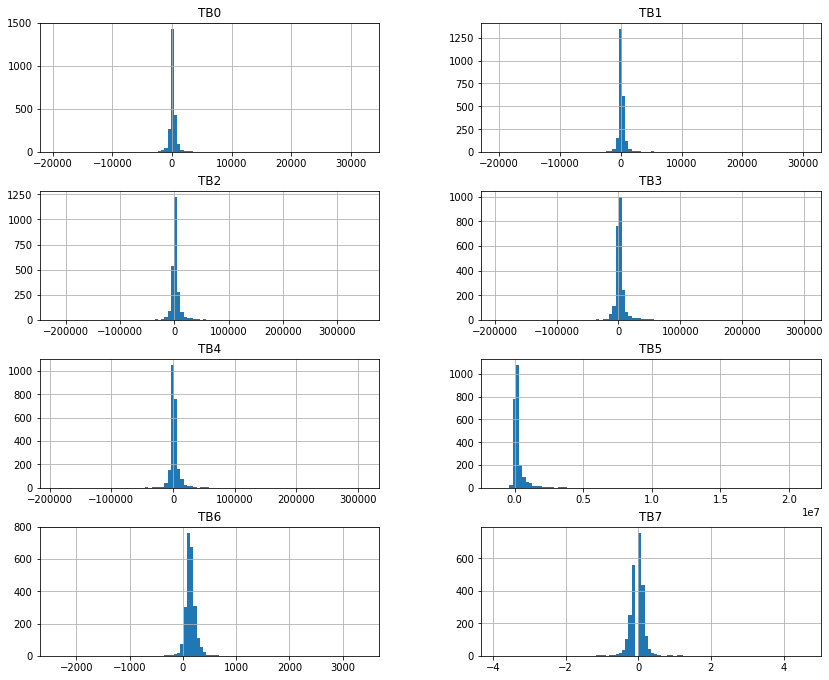

In [ ]:
# Histograma
atributosTB = fn.ListaPrefixo(list(Modelo),'TB')
hist = Modelo.hist(column=atributosTB,figsize=(14,24),
                   layout=(mt.ceil(len(atributosTB)),2),bins=96)

A coluna TB7 apresenta dados descontinuos.

Trata-se do Salário médio mensal, medido em quantidade de Salários mínimos.

In [ ]:
# Exclui a coluna de TB7
Modelo.drop(columns=['TB7'],inplace=True)
atributosTB = fn.ListaPrefixo(list(Modelo),'TB')
print(Modelo)

       Ano  Município              Nome   TB0   TB1    TB2    TB3       TB4  \
0     2007     110020  PORTO VELHO (RO)   633   641   8982   7381   3884.67   
1     2008     110020  PORTO VELHO (RO)   225   133  12099  12021  10369.06   
2     2009     110020  PORTO VELHO (RO)   914   867  25559  24298  15258.53   
3     2010     110020  PORTO VELHO (RO)   811   774  27643  27428  30332.58   
4     2011     110020  PORTO VELHO (RO)   325   247  10104   9041  15191.44   
...    ...        ...               ...   ...   ...    ...    ...       ...   
2393  2014     530010     BRASILIA (DF) -4093 -4076  27762  32611  37829.15   
2394  2015     530010     BRASILIA (DF) -4123 -3750 -76622 -72733 -40831.33   
2395  2016     530010     BRASILIA (DF)  -928  -963   5505   6868   6336.61   
2396  2017     530010     BRASILIA (DF)   386   292  -9344  -8674 -33699.14   
2397  2018     530010     BRASILIA (DF) -2289 -2248  -5694  -4244  -3484.31   

      ...      RC8S      RC9S   SE1M  SE2M      SE1

In [ ]:
#verifica a correlação entre os dados da tabela1685 e o crescimento do PIB
temp = Modelo.loc[:,atributosTB+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

                TB0     TB1     TB2     TB3     TB4     TB5     TB6  \
TB0          1.0000  0.9987  0.6779  0.6367  0.6223  0.4105 -0.0199   
TB1          0.9987  1.0000  0.6654  0.6230  0.6058  0.3854 -0.0206   
TB2          0.6779  0.6654  1.0000  0.9967  0.9018  0.4598 -0.0453   
TB3          0.6367  0.6230  0.9967  1.0000  0.9035  0.4622 -0.0454   
TB4          0.6223  0.6058  0.9018  0.9035  1.0000  0.5464 -0.0577   
TB5          0.4105  0.3854  0.4598  0.4622  0.5464  1.0000  0.1116   
TB6         -0.0199 -0.0206 -0.0453 -0.0454 -0.0577  0.1116  1.0000   
Crescimento  0.4355  0.4150  0.3973  0.3900  0.4452  0.8542  0.0609   

             Crescimento  
TB0               0.4355  
TB1               0.4150  
TB2               0.3973  
TB3               0.3900  
TB4               0.4452  
TB5               0.8542  
TB6               0.0609  
Crescimento       1.0000  


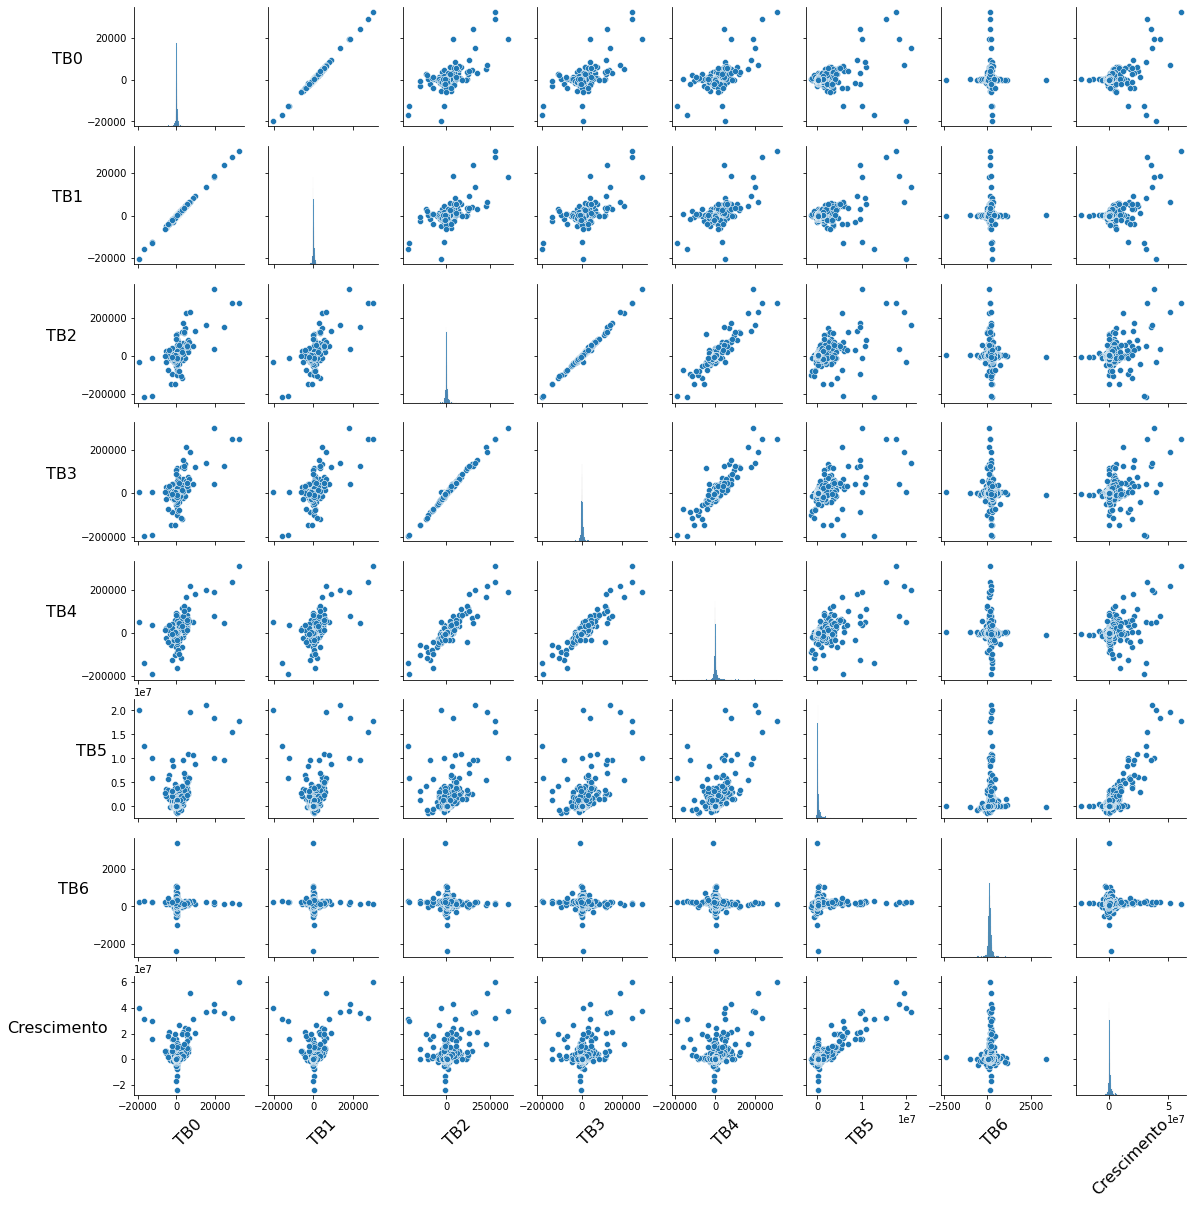

In [ ]:
# gráficos de dispersão para comparação das variáveis aos pares
fn.DispersaoPares(Modelo[atributosTB+['Crescimento']])

Observa-se que TB0 e TB1, bem como TB2 e TB3, estão bastante correlacionados,

daí optou-se por marter o atributo com maior correlação com CRESCIMENTO.

Excluímos também o atributo TB6, por apresentar uma relação disforme, em forma

de cruz.

In [ ]:
#Exclui atributos que não serão usados
Modelo.drop(columns=['TB1','TB3','TB6'],inplace=True)

## Análise de dados Grande Grupo CBO

Código Brasileiro de Ocupação

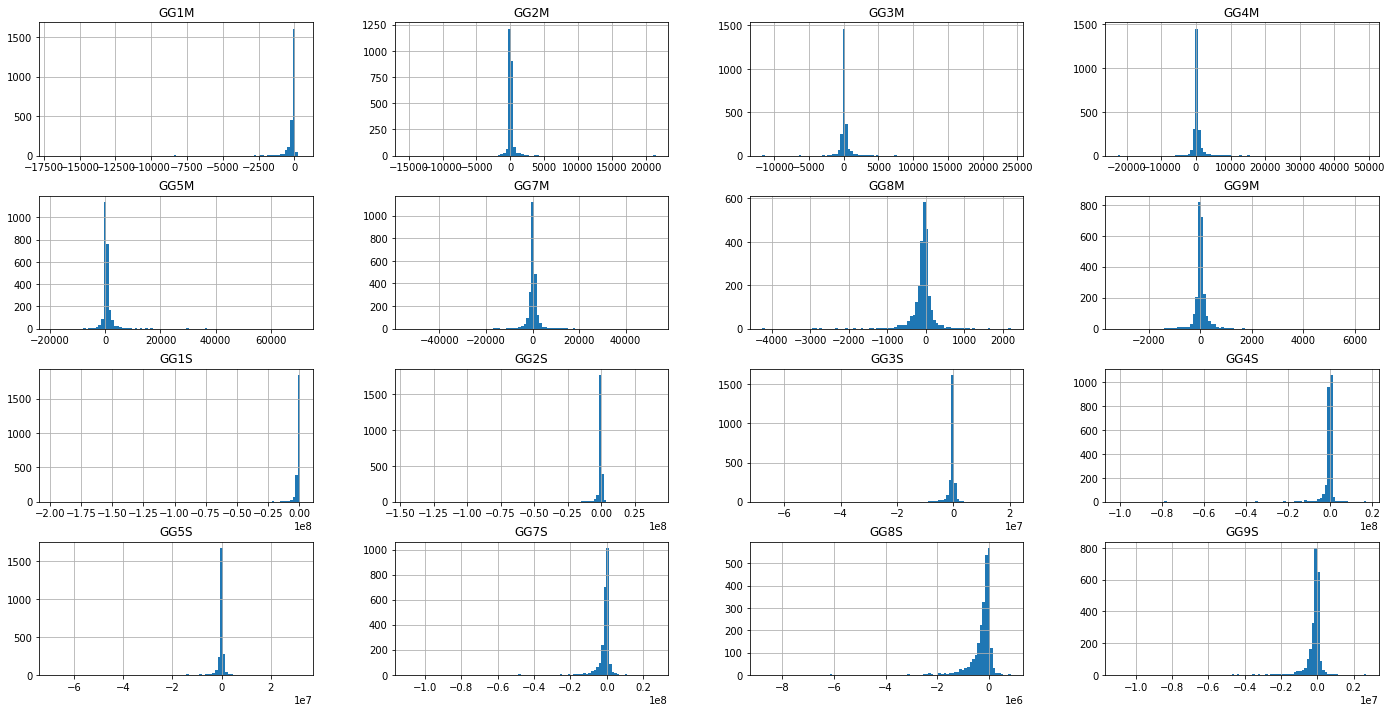

In [ ]:
# Lista de atributos de Grande Grupo (GG)
atributosGG = fn.ListaPrefixo(list(Modelo),'GG')

hist = Modelo.hist(column=atributosGG,figsize=(24,12),bins=96)     

In [ ]:
#verifica a correlação entre os Grandes Grupos e o crescimento do PIB
temp = Modelo.loc[:,atributosGG+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

               GG0M    GG1M    GG2M    GG3M    GG4M    GG5M    GG6M    GG7M  \
GG0M         1.0000 -0.0545 -0.0023 -0.0365 -0.0221 -0.0221  0.0216 -0.0561   
GG1M        -0.0545  1.0000  0.0736  0.0308  0.0790 -0.1557  0.0670  0.4399   
GG2M        -0.0023  0.0736  1.0000  0.8919  0.9097  0.9052  0.1468  0.6837   
GG3M        -0.0365  0.0308  0.8919  1.0000  0.8706  0.8756  0.1373  0.6872   
GG4M        -0.0221  0.0790  0.9097  0.8706  1.0000  0.8867  0.1313  0.7057   
GG5M        -0.0221 -0.1557  0.9052  0.8756  0.8867  1.0000  0.1206  0.6209   
GG6M         0.0216  0.0670  0.1468  0.1373  0.1313  0.1206  1.0000  0.1224   
GG7M        -0.0561  0.4399  0.6837  0.6872  0.7057  0.6209  0.1224  1.0000   
GG8M        -0.0794  0.5871  0.2038  0.2238  0.2152  0.0967  0.0695  0.5425   
GG9M        -0.0137  0.2845  0.6265  0.6494  0.6411  0.6100  0.1464  0.7453   
GG0S         0.6507 -0.0474  0.0657  0.0223  0.0175  0.0208  0.0067 -0.0433   
GG1S        -0.0402  0.9679  0.0472  0.0082  0.0528 

In [ ]:
# verifica as quantidades de registros de GG0M e GG0S
Modelo.loc[(Modelo.GG0M!=0)&(Modelo.GG0S!=0)].shape[0]

30

Considerando que há apenas 30 linhas com dados diferentes de zero e a baixa correlação, optamos por excluir essas colunas

In [ ]:
# Exclui as colunas 'GG0M' e 'GG0S'
Modelo.drop(columns=['GG0M','GG0S'],inplace=True)
# atualiza Lista de atributos de Grande Grupo (GG)
atributosGG = fn.ListaPrefixo(list(Modelo),'GG')

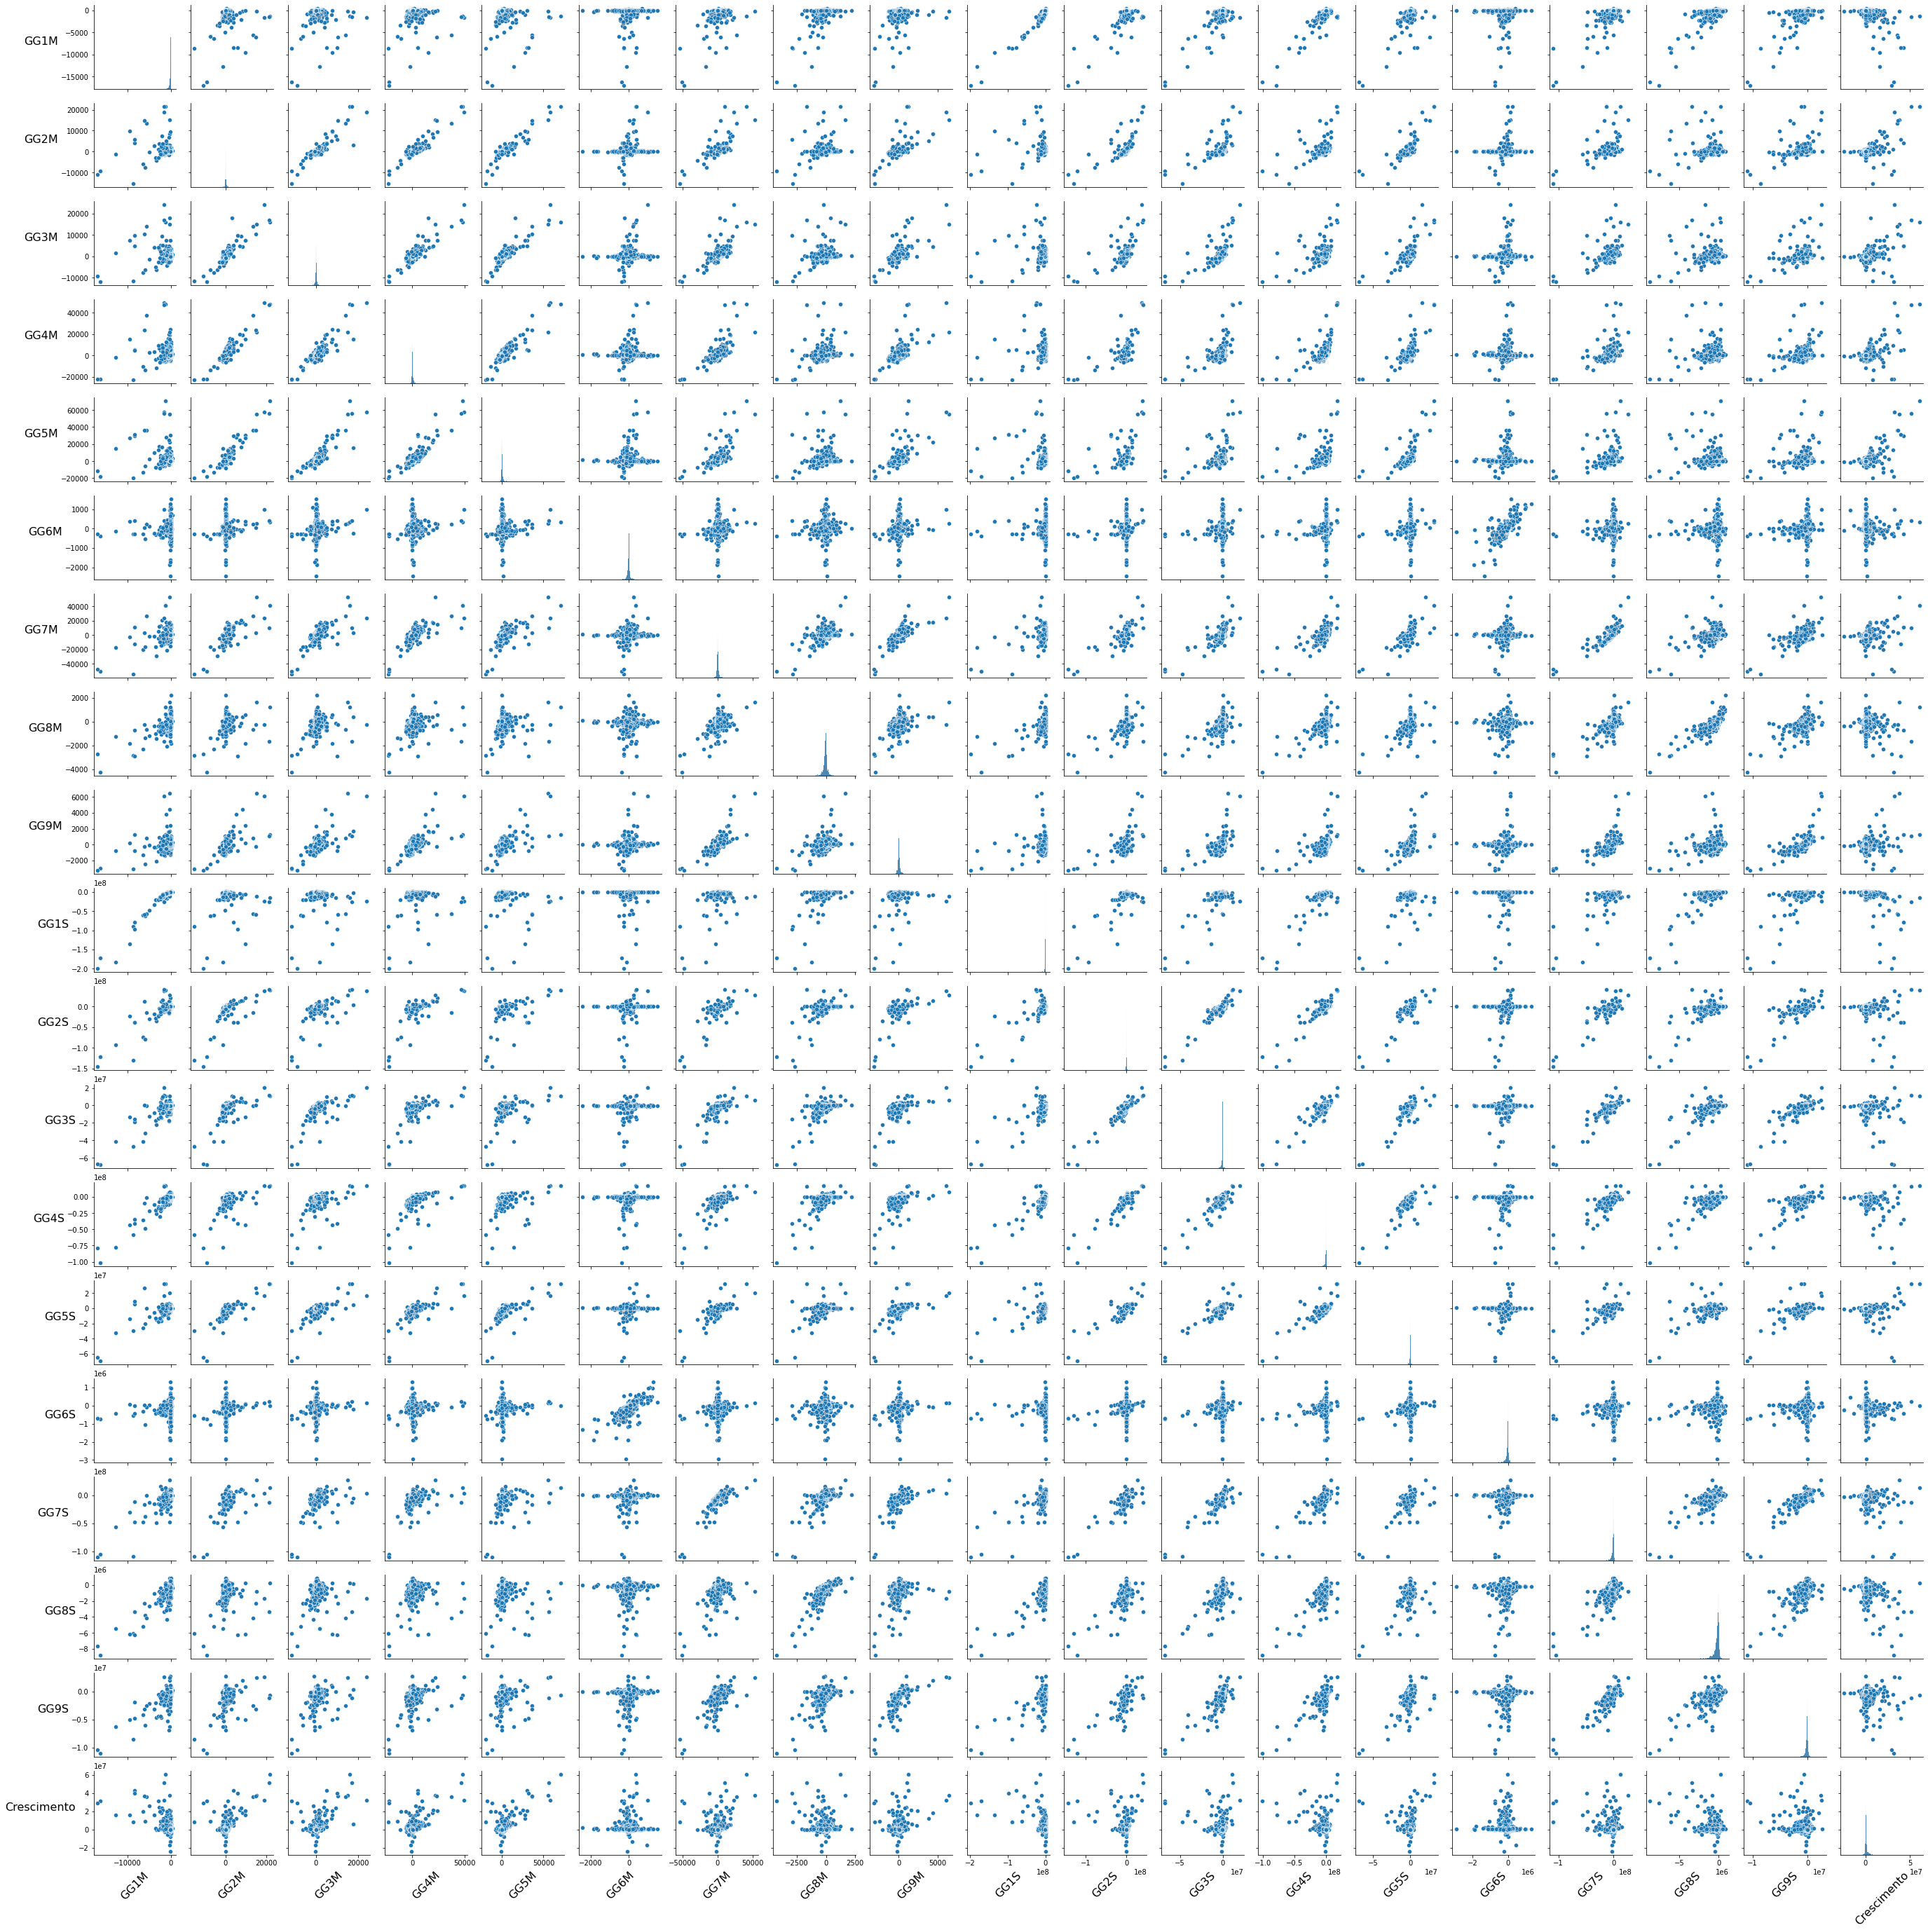

In [ ]:
# gráficos de dispersão para comparação das variáveis aos pares
fn.DispersaoPares(Modelo[atributosGG+['Crescimento']])

Os atributos GG6M e GG6S apresentam relações em cruz com os demais atributos, bem como tem baixa correlação com Crescimento, daí também optamos por excluí-los

In [ ]:
# Exclui as colunas 'GG6M' e 'GG6S'
Modelo.drop(columns=['GG6M','GG6S'],inplace=True)

print(Modelo)

       Ano  Município              Nome   TB0    TB2       TB4      TB5  GG1M  \
0     2007     110020  PORTO VELHO (RO)   633   8982   3884.67   139710   -34   
1     2008     110020  PORTO VELHO (RO)   225  12099  10369.06   330474   -59   
2     2009     110020  PORTO VELHO (RO)   914  25559  15258.53   742466    36   
3     2010     110020  PORTO VELHO (RO)   811  27643  30332.58  1076697  -104   
4     2011     110020  PORTO VELHO (RO)   325  10104  15191.44   839994  -193   
...    ...        ...               ...   ...    ...       ...      ...   ...   
2393  2014     530010     BRASILIA (DF) -4093  27762  37829.15  6582026 -1934   
2394  2015     530010     BRASILIA (DF) -4123 -76622 -40831.33  5605800 -2170   
2395  2016     530010     BRASILIA (DF)  -928   5505   6336.61  3766656 -2584   
2396  2017     530010     BRASILIA (DF)   386  -9344 -33699.14  3914937 -2379   
2397  2018     530010     BRASILIA (DF) -2289  -5694  -3484.31  3225761 -1836   

      ...      RC8S      RC

##Análise de SubGrupo Principal do CBO

In [ ]:
# Exclui as colunas começadas em 'SP0' e 'SP6', conforme informações
# já apuradas para Grande Grupo
Modelo.drop(columns=[
  'SP01M','SP02M','SP03M','SP01S','SP02S','SP03S','SP61M','SP62M','SP63M',
  'SP64M', 'SP61S', 'SP62S', 'SP63S', 'SP64S'],inplace=True)

In [ ]:
# Lista de atributos de SubGrupo Principal do CBO (SP)
atributosSPM = fn.ListaPrefixo(list(Modelo),'SP','M')
atributosSPS = fn.ListaPrefixo(list(Modelo),'SP','S')
atributosSP = atributosSPM + atributosSPS
print(atributosSP)

['SP11M', 'SP12M', 'SP13M', 'SP14M', 'SP20M', 'SP21M', 'SP22M', 'SP23M', 'SP24M', 'SP25M', 'SP26M', 'SP27M', 'SP30M', 'SP31M', 'SP32M', 'SP33M', 'SP34M', 'SP35M', 'SP37M', 'SP39M', 'SP41M', 'SP42M', 'SP51M', 'SP52M', 'SP71M', 'SP72M', 'SP73M', 'SP74M', 'SP75M', 'SP76M', 'SP77M', 'SP78M', 'SP79M', 'SP81M', 'SP82M', 'SP83M', 'SP84M', 'SP86M', 'SP91M', 'SP95M', 'SP99M', 'SP11S', 'SP12S', 'SP13S', 'SP14S', 'SP20S', 'SP21S', 'SP22S', 'SP23S', 'SP24S', 'SP25S', 'SP26S', 'SP27S', 'SP30S', 'SP31S', 'SP32S', 'SP33S', 'SP34S', 'SP35S', 'SP37S', 'SP39S', 'SP41S', 'SP42S', 'SP51S', 'SP52S', 'SP71S', 'SP72S', 'SP73S', 'SP74S', 'SP75S', 'SP76S', 'SP77S', 'SP78S', 'SP79S', 'SP81S', 'SP82S', 'SP83S', 'SP84S', 'SP86S', 'SP91S', 'SP95S', 'SP99S']


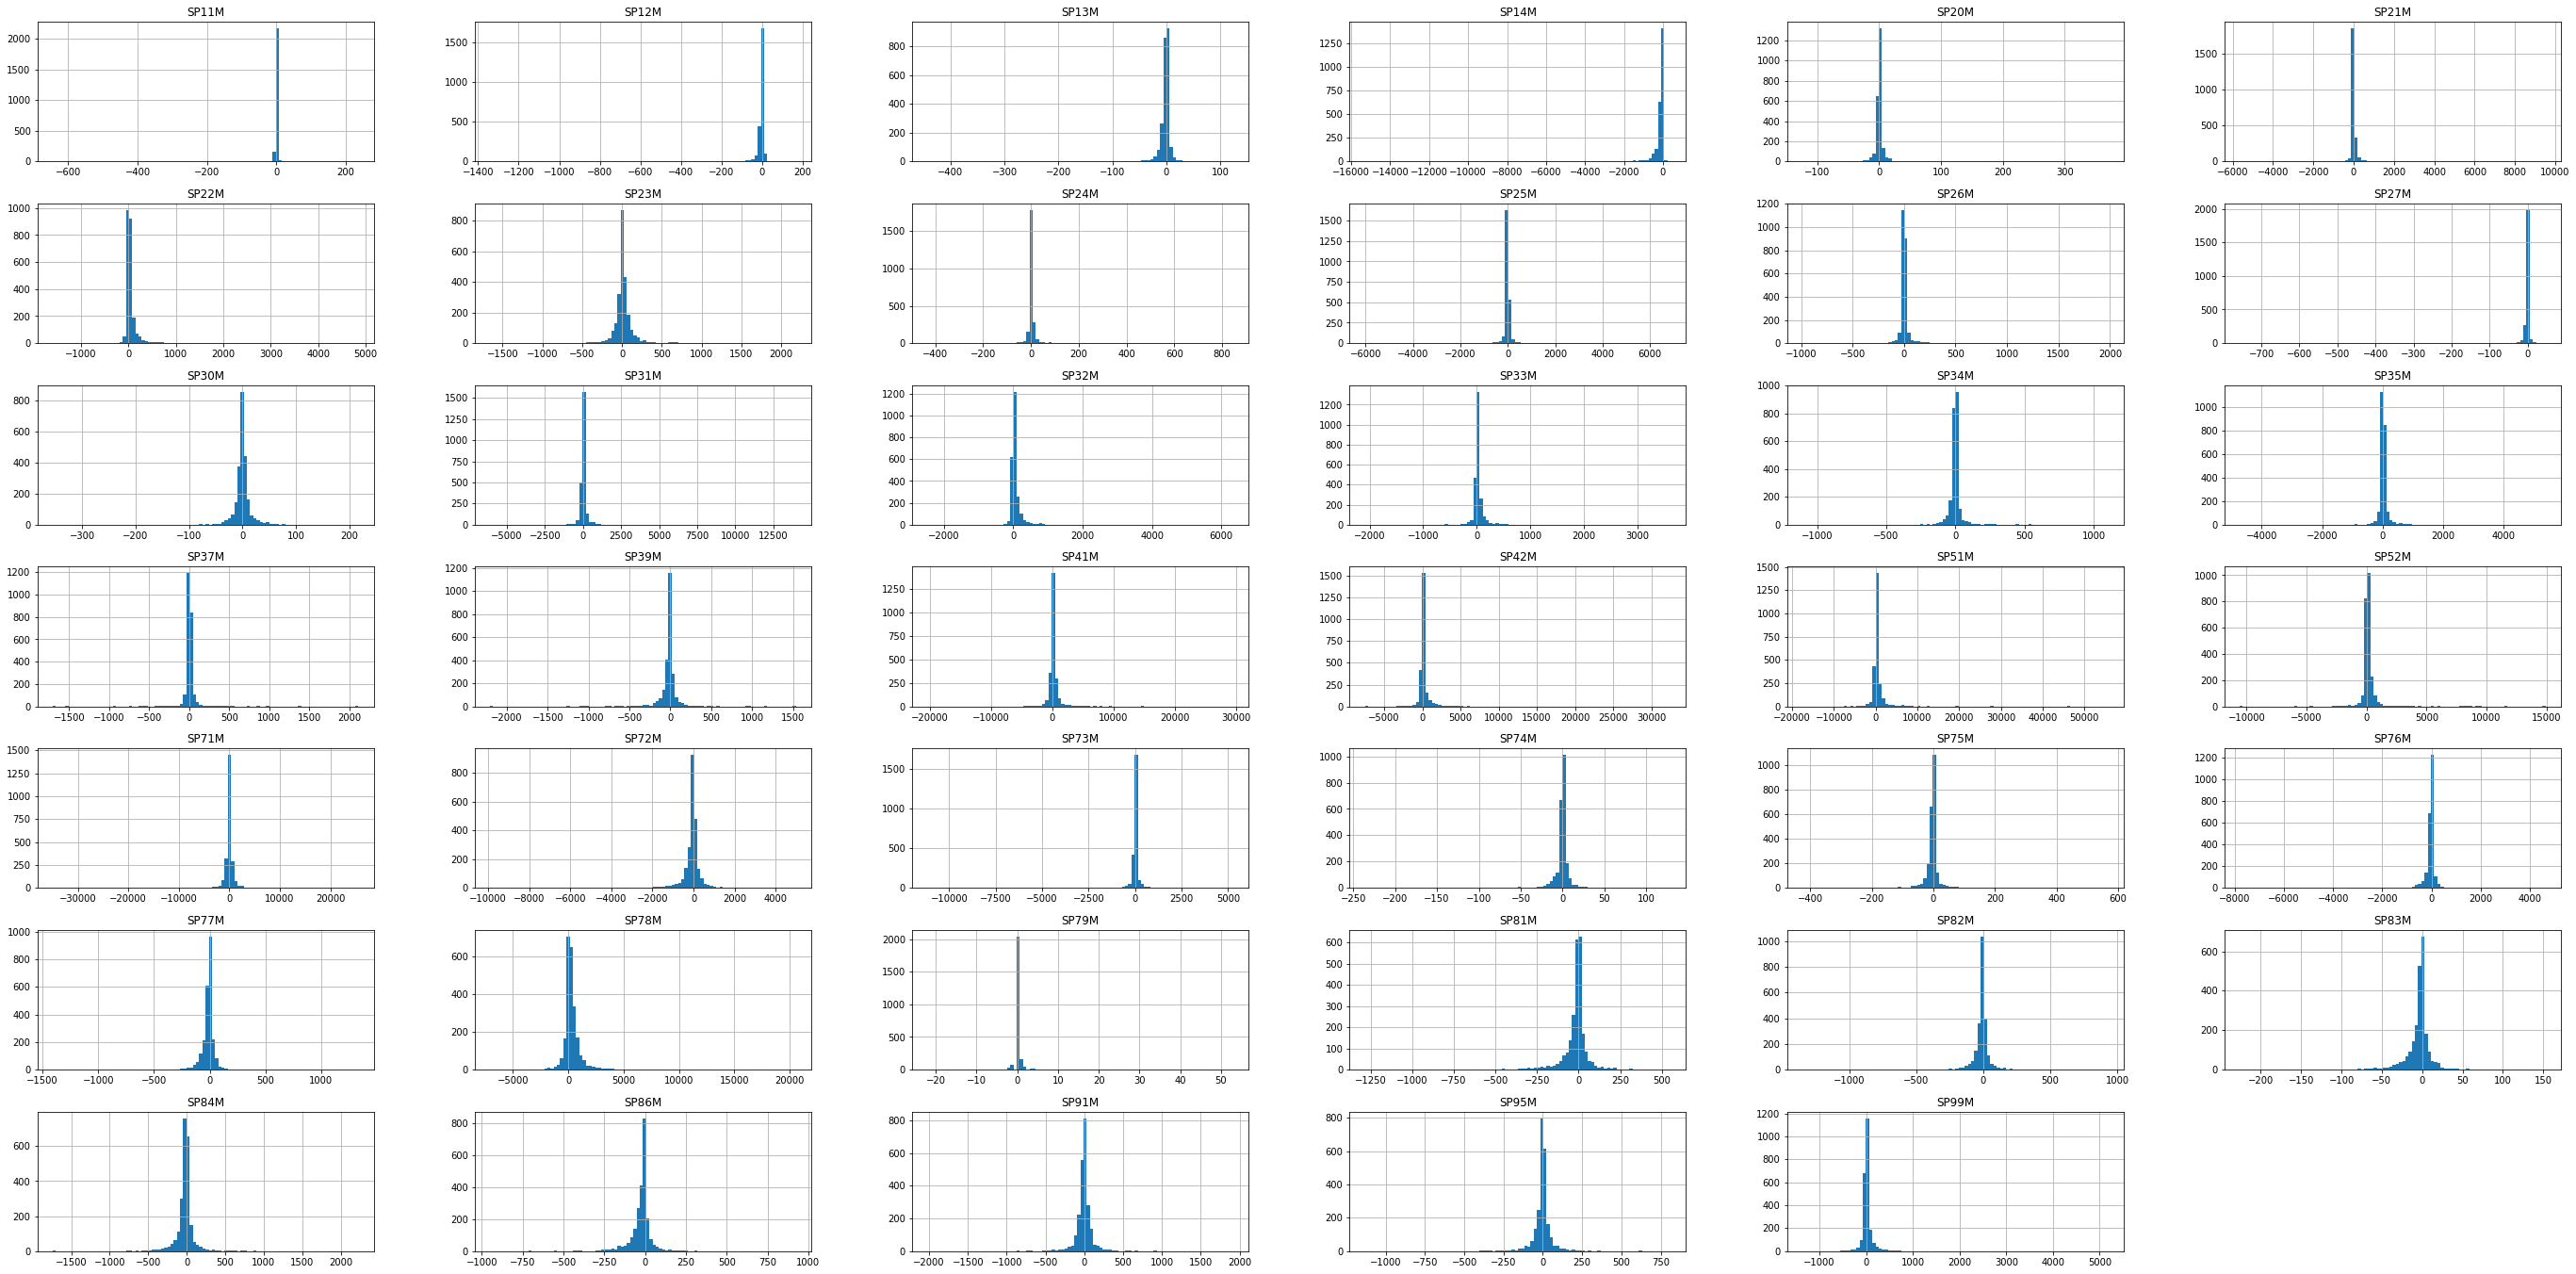

In [ ]:
hist = Modelo.hist(column=atributosSPM,figsize=(48,24),bins=96)

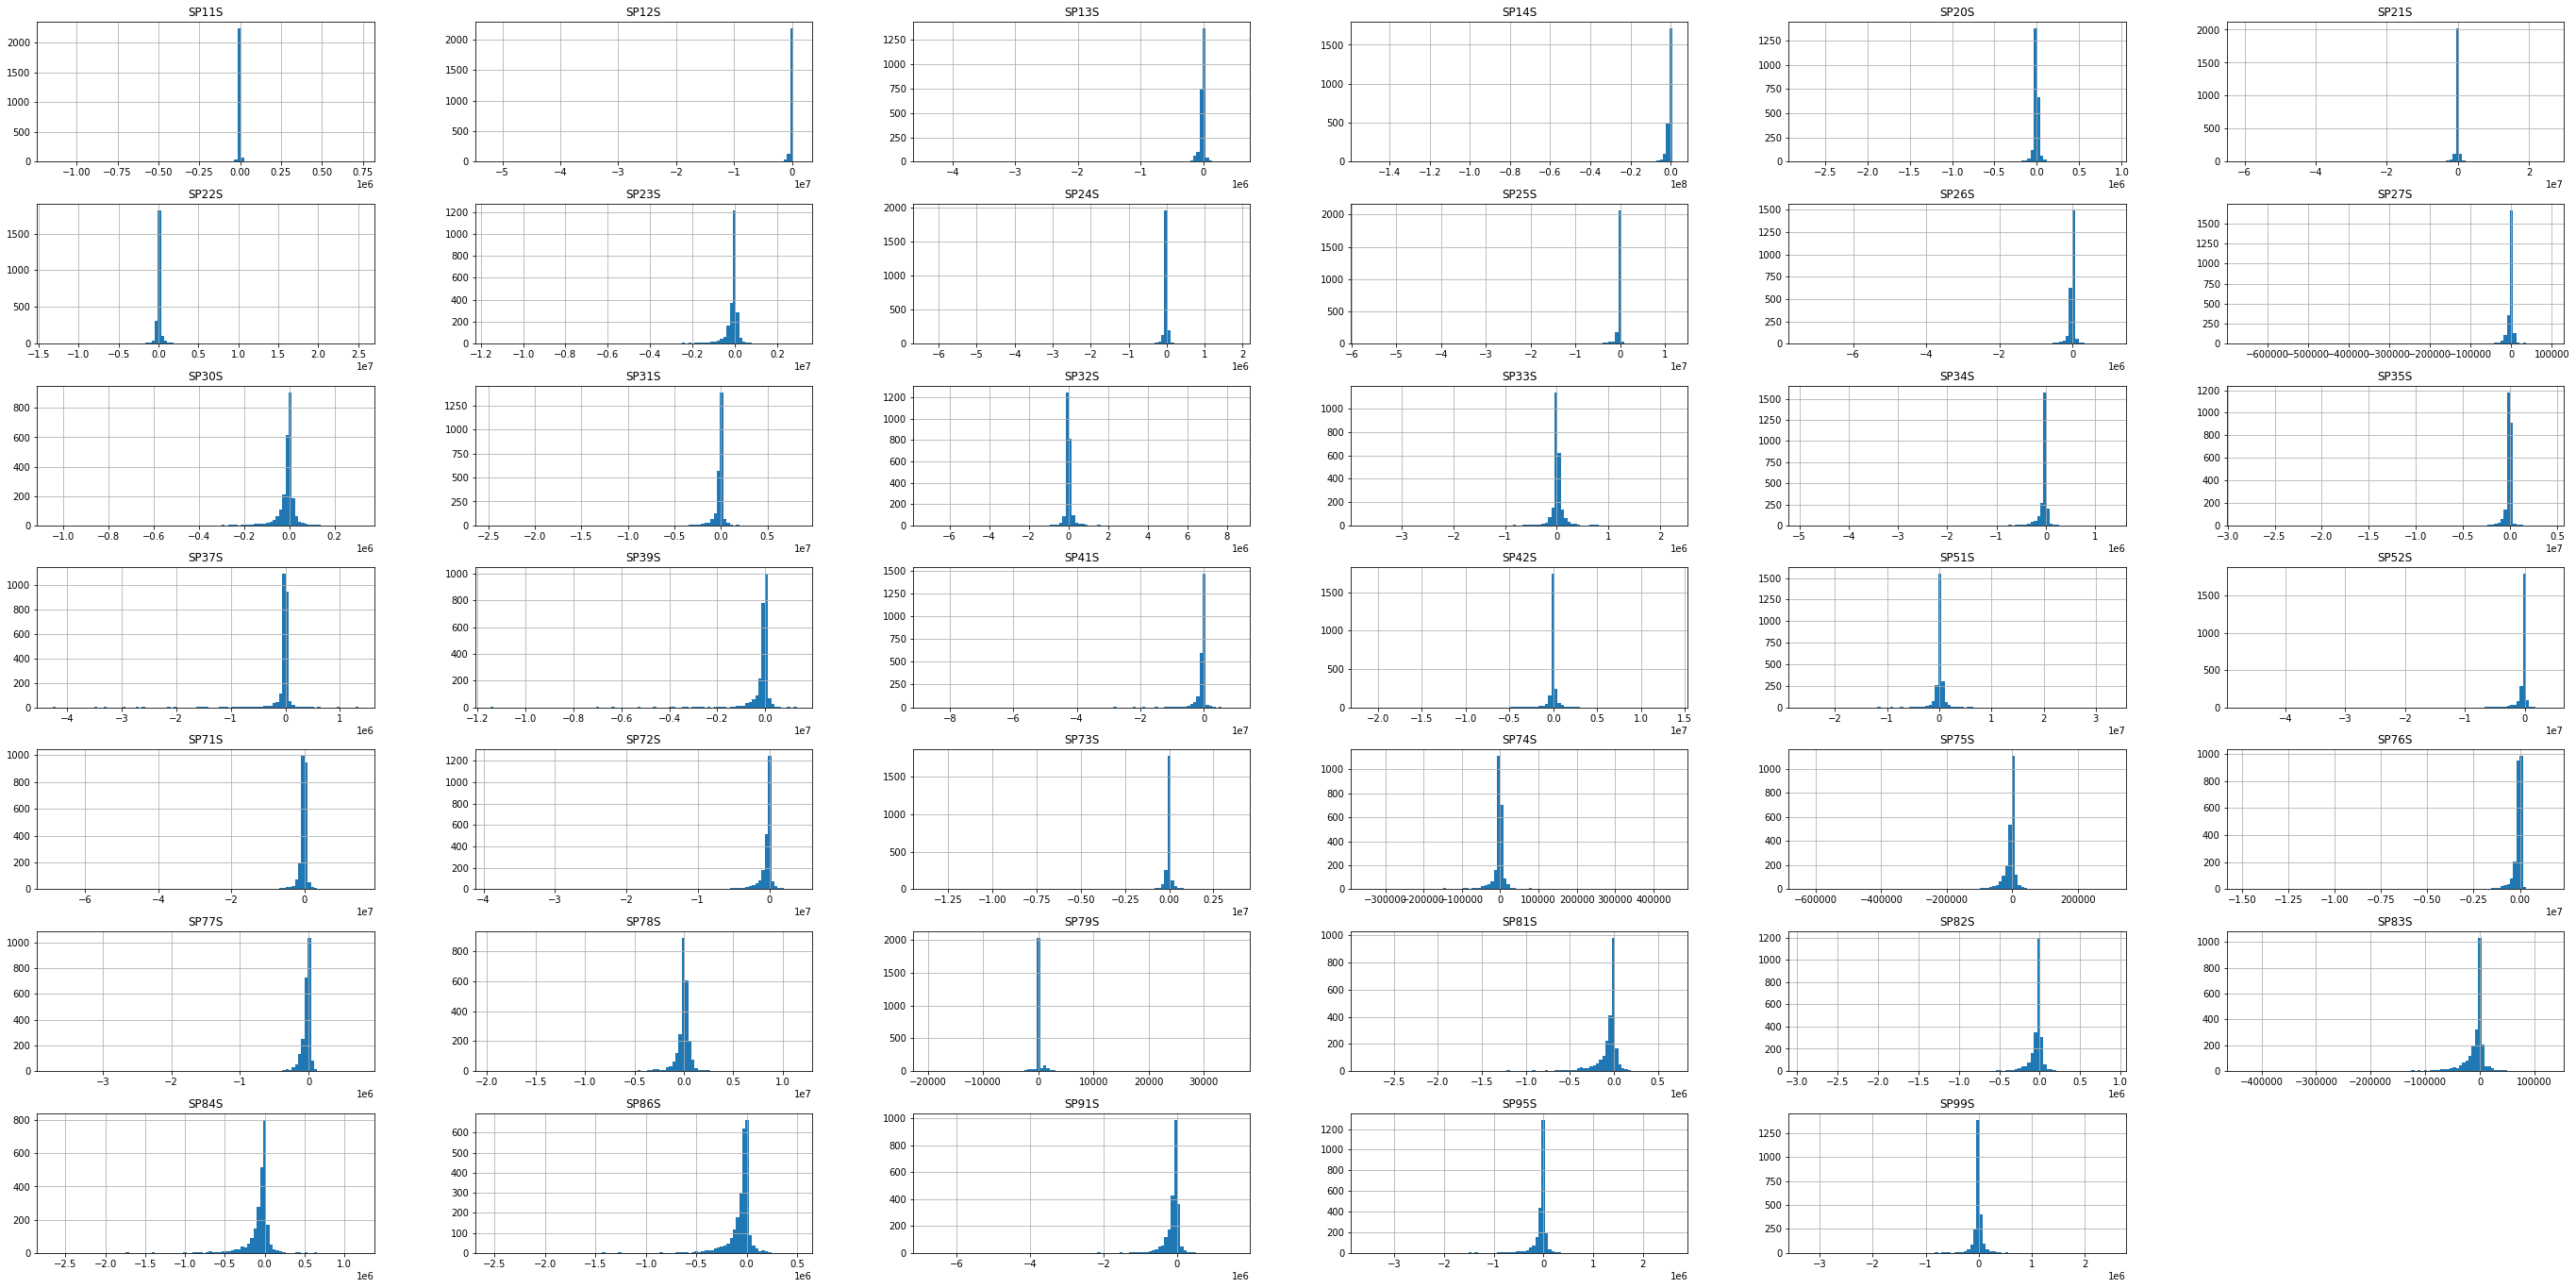

In [ ]:
hist = Modelo.hist(column=atributosSPS,figsize=(48,24),bins=96)

In [ ]:
# correlação entre os parâmetros
temp = Modelo.loc[:,atributosSP+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

              SP11M   SP12M   SP13M   SP14M   SP20M   SP21M   SP22M   SP23M  \
SP11M        1.0000  0.0126  0.0071  0.0187 -0.0709 -0.0548 -0.0271 -0.0485   
SP12M        0.0126  1.0000  0.8238  0.9049 -0.2414  0.0299 -0.4769  0.1145   
SP13M        0.0071  0.8238  1.0000  0.8280 -0.1284  0.1425 -0.3270  0.2096   
SP14M        0.0187  0.9049  0.8280  1.0000 -0.1309  0.0951 -0.5305  0.1613   
SP20M       -0.0709 -0.2414 -0.1284 -0.1309  1.0000  0.6529  0.4730  0.4086   
...             ...     ...     ...     ...     ...     ...     ...     ...   
SP86S        0.0088  0.5117  0.4616  0.6016 -0.0708 -0.0141 -0.3850  0.0335   
SP91S        0.0078  0.6511  0.6275  0.7434  0.0306  0.1948 -0.2808  0.2274   
SP95S       -0.0102  0.5037  0.5085  0.5512 -0.0221  0.1437 -0.2488  0.1266   
SP99S       -0.0318  0.3090  0.3668  0.4374  0.3027  0.4719  0.0593  0.3521   
Crescimento -0.0507 -0.4796 -0.3801 -0.5612  0.4301  0.5299  0.7299  0.3174   

             ...   SP82S   SP83S   SP84S   SP86S   

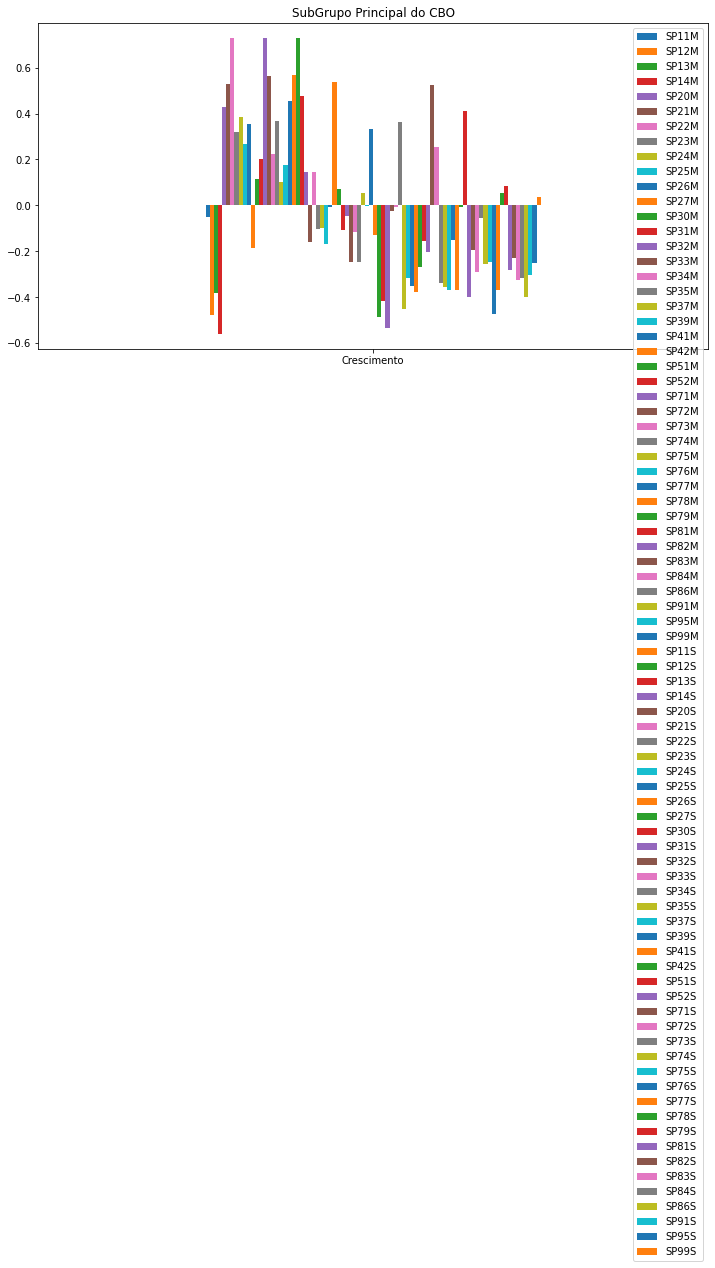

In [ ]:
bar = correlacao.loc[['Crescimento'],atributosSP].plot(
    kind="bar", figsize=(12,6),title='SubGrupo Principal do CBO',rot=0)

In [ ]:
# Divide os atributos de movimentações em grupos para as movimentações
array_atribSPM = np.array_split(atributosSPM,4);
array_atribSPM

[array(['SP11M', 'SP12M', 'SP13M', 'SP14M', 'SP20M', 'SP21M', 'SP22M',
        'SP23M', 'SP24M', 'SP25M', 'SP26M'], dtype='<U5'),
 array(['SP27M', 'SP30M', 'SP31M', 'SP32M', 'SP33M', 'SP34M', 'SP35M',
        'SP37M', 'SP39M', 'SP41M'], dtype='<U5'),
 array(['SP42M', 'SP51M', 'SP52M', 'SP71M', 'SP72M', 'SP73M', 'SP74M',
        'SP75M', 'SP76M', 'SP77M'], dtype='<U5'),
 array(['SP78M', 'SP79M', 'SP81M', 'SP82M', 'SP83M', 'SP84M', 'SP86M',
        'SP91M', 'SP95M', 'SP99M'], dtype='<U5')]

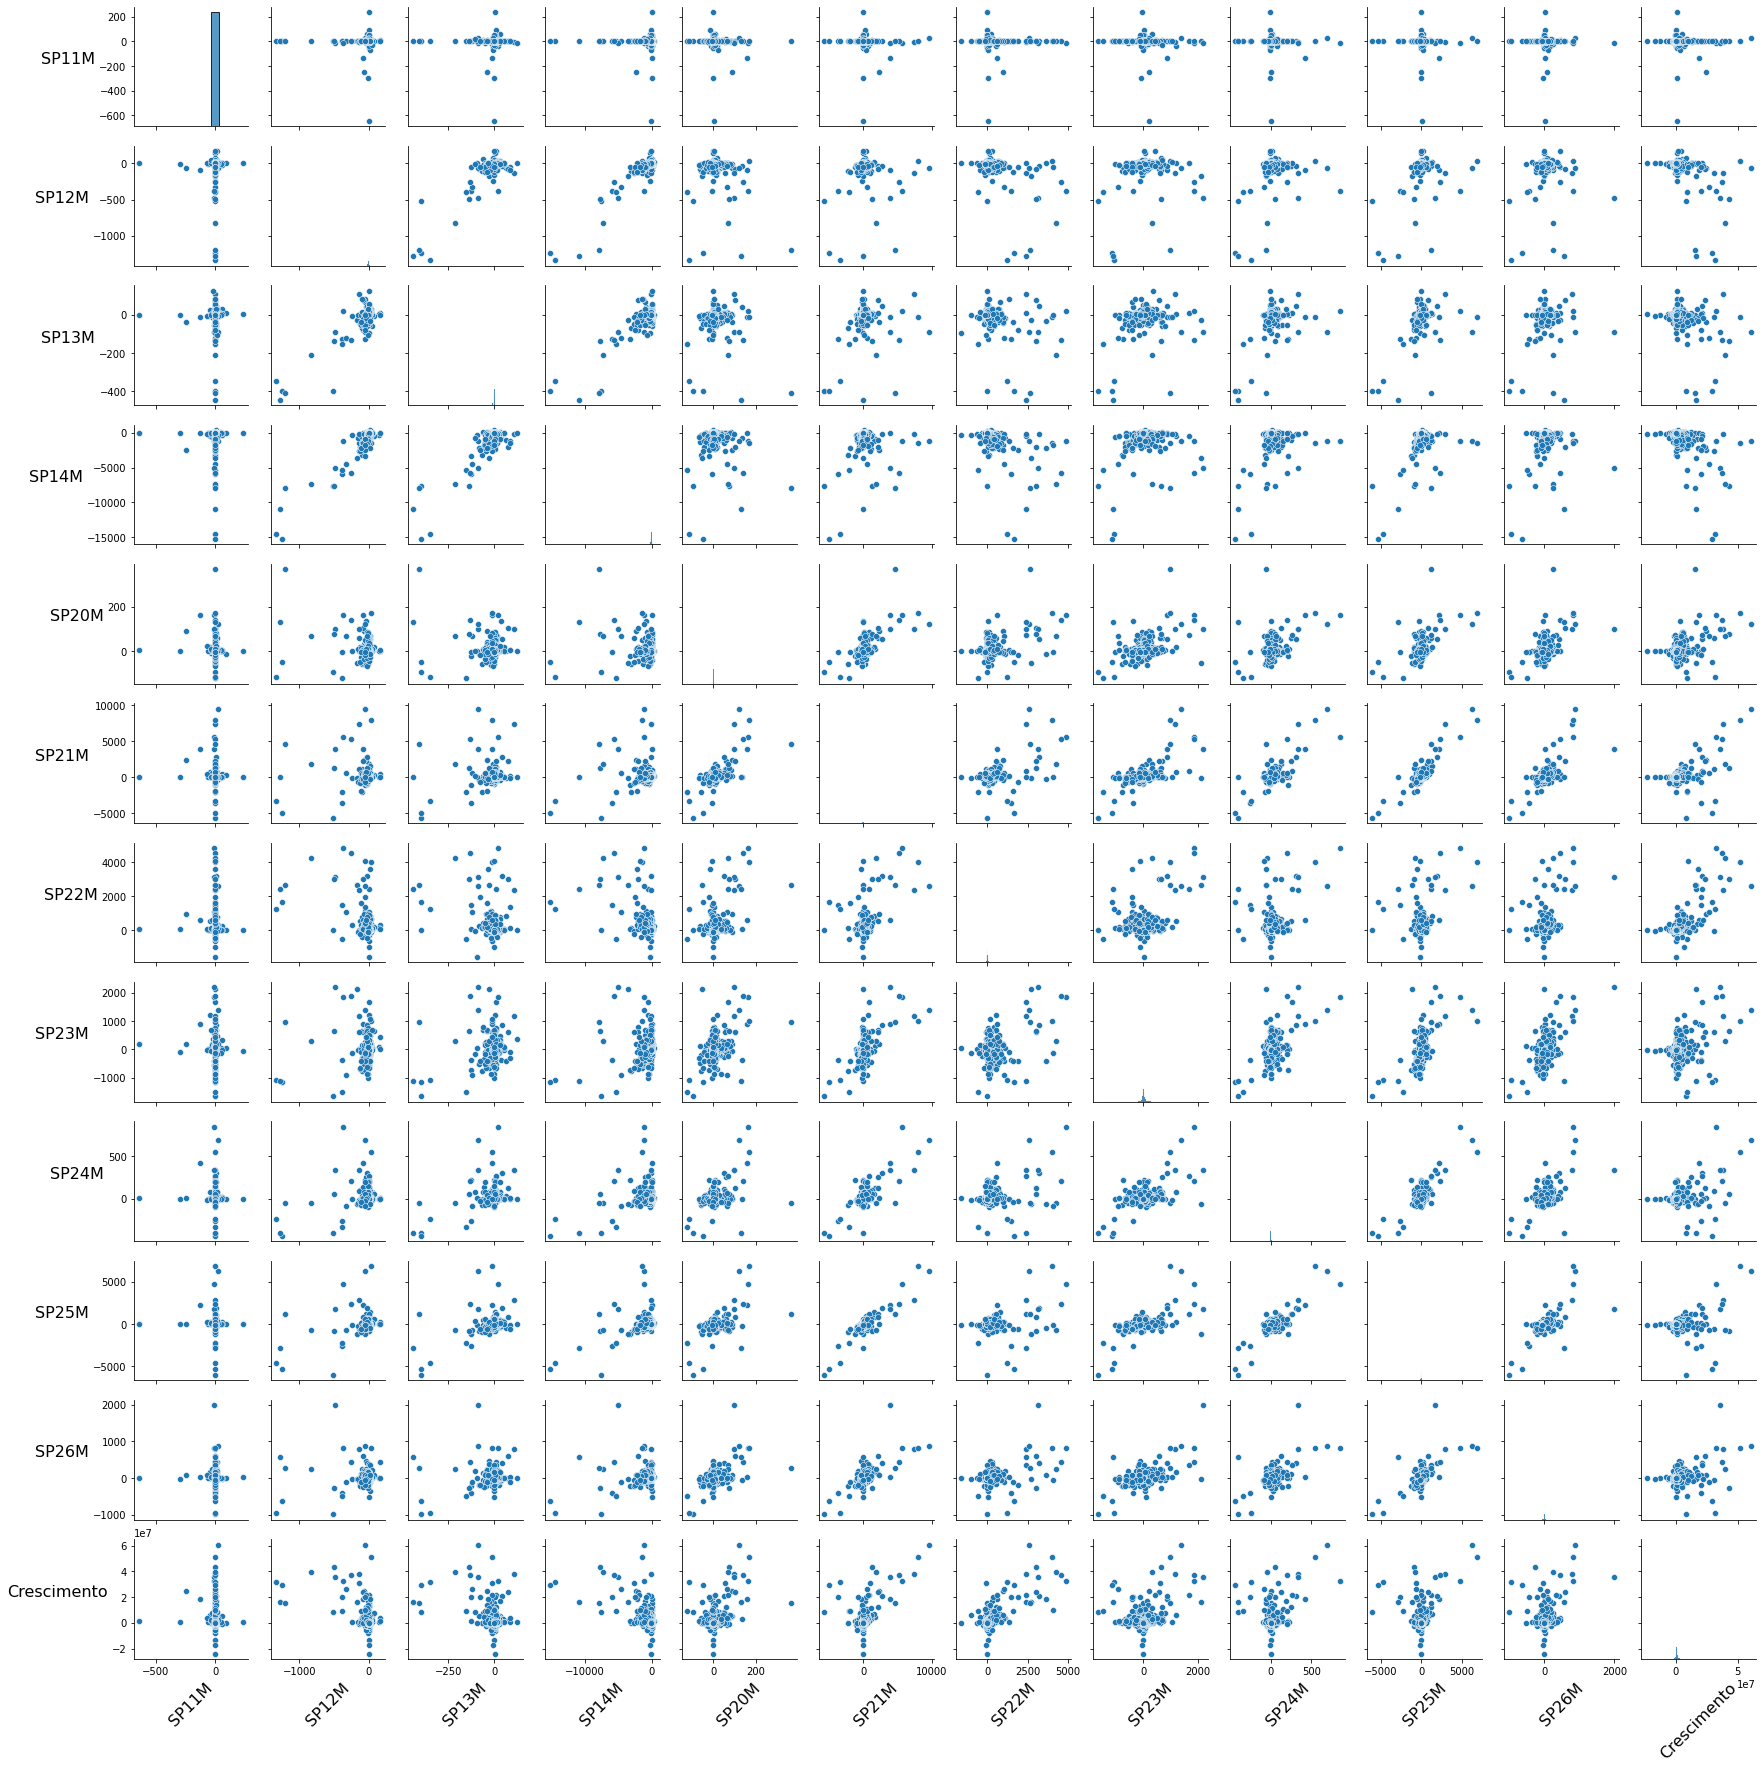

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPM[0].tolist()+['Crescimento']])

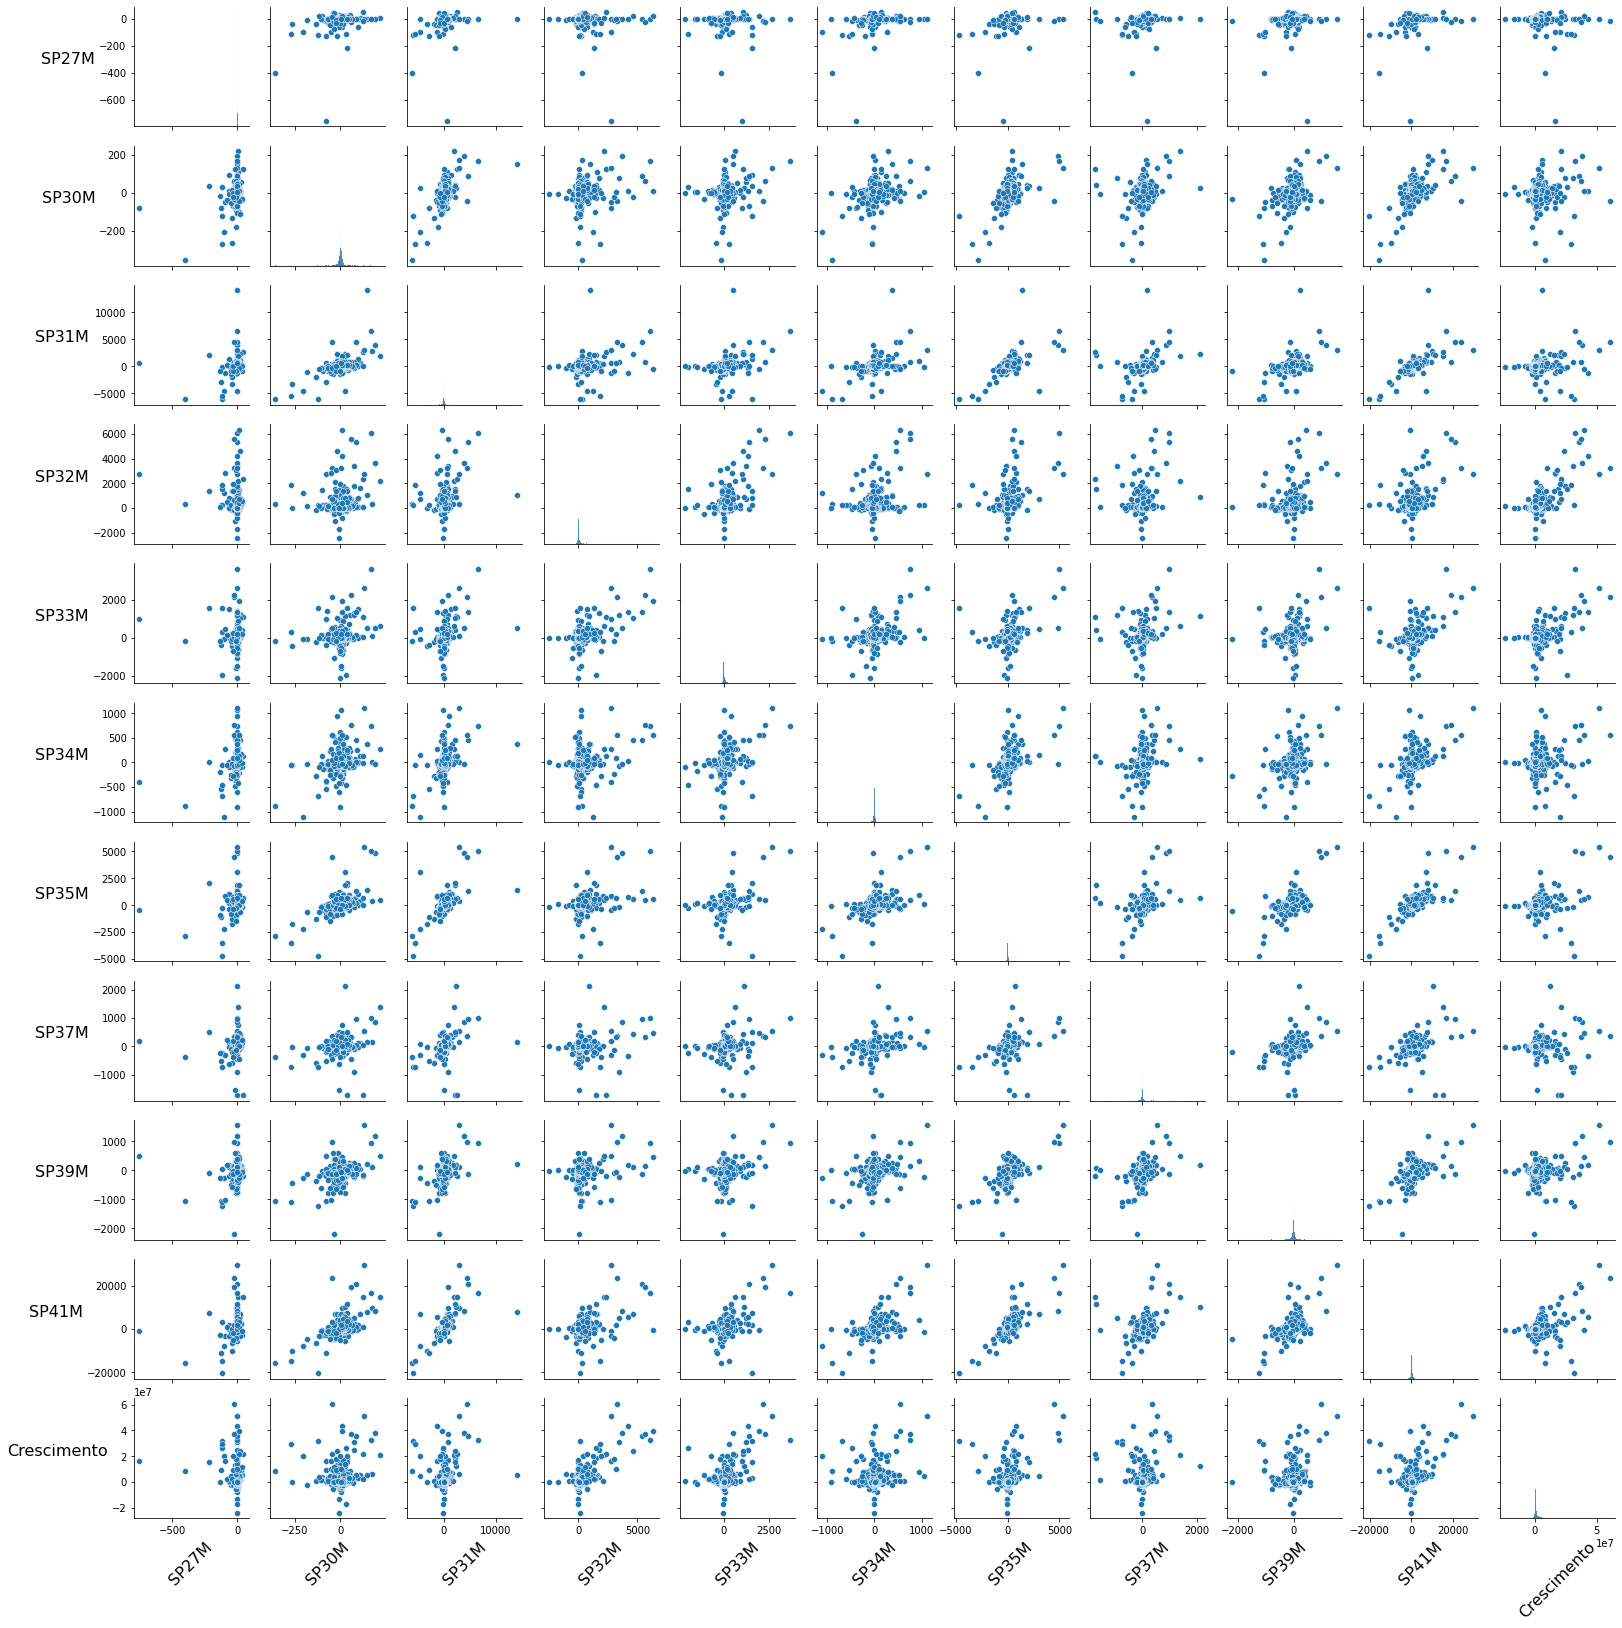

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPM[1].tolist()+['Crescimento']])

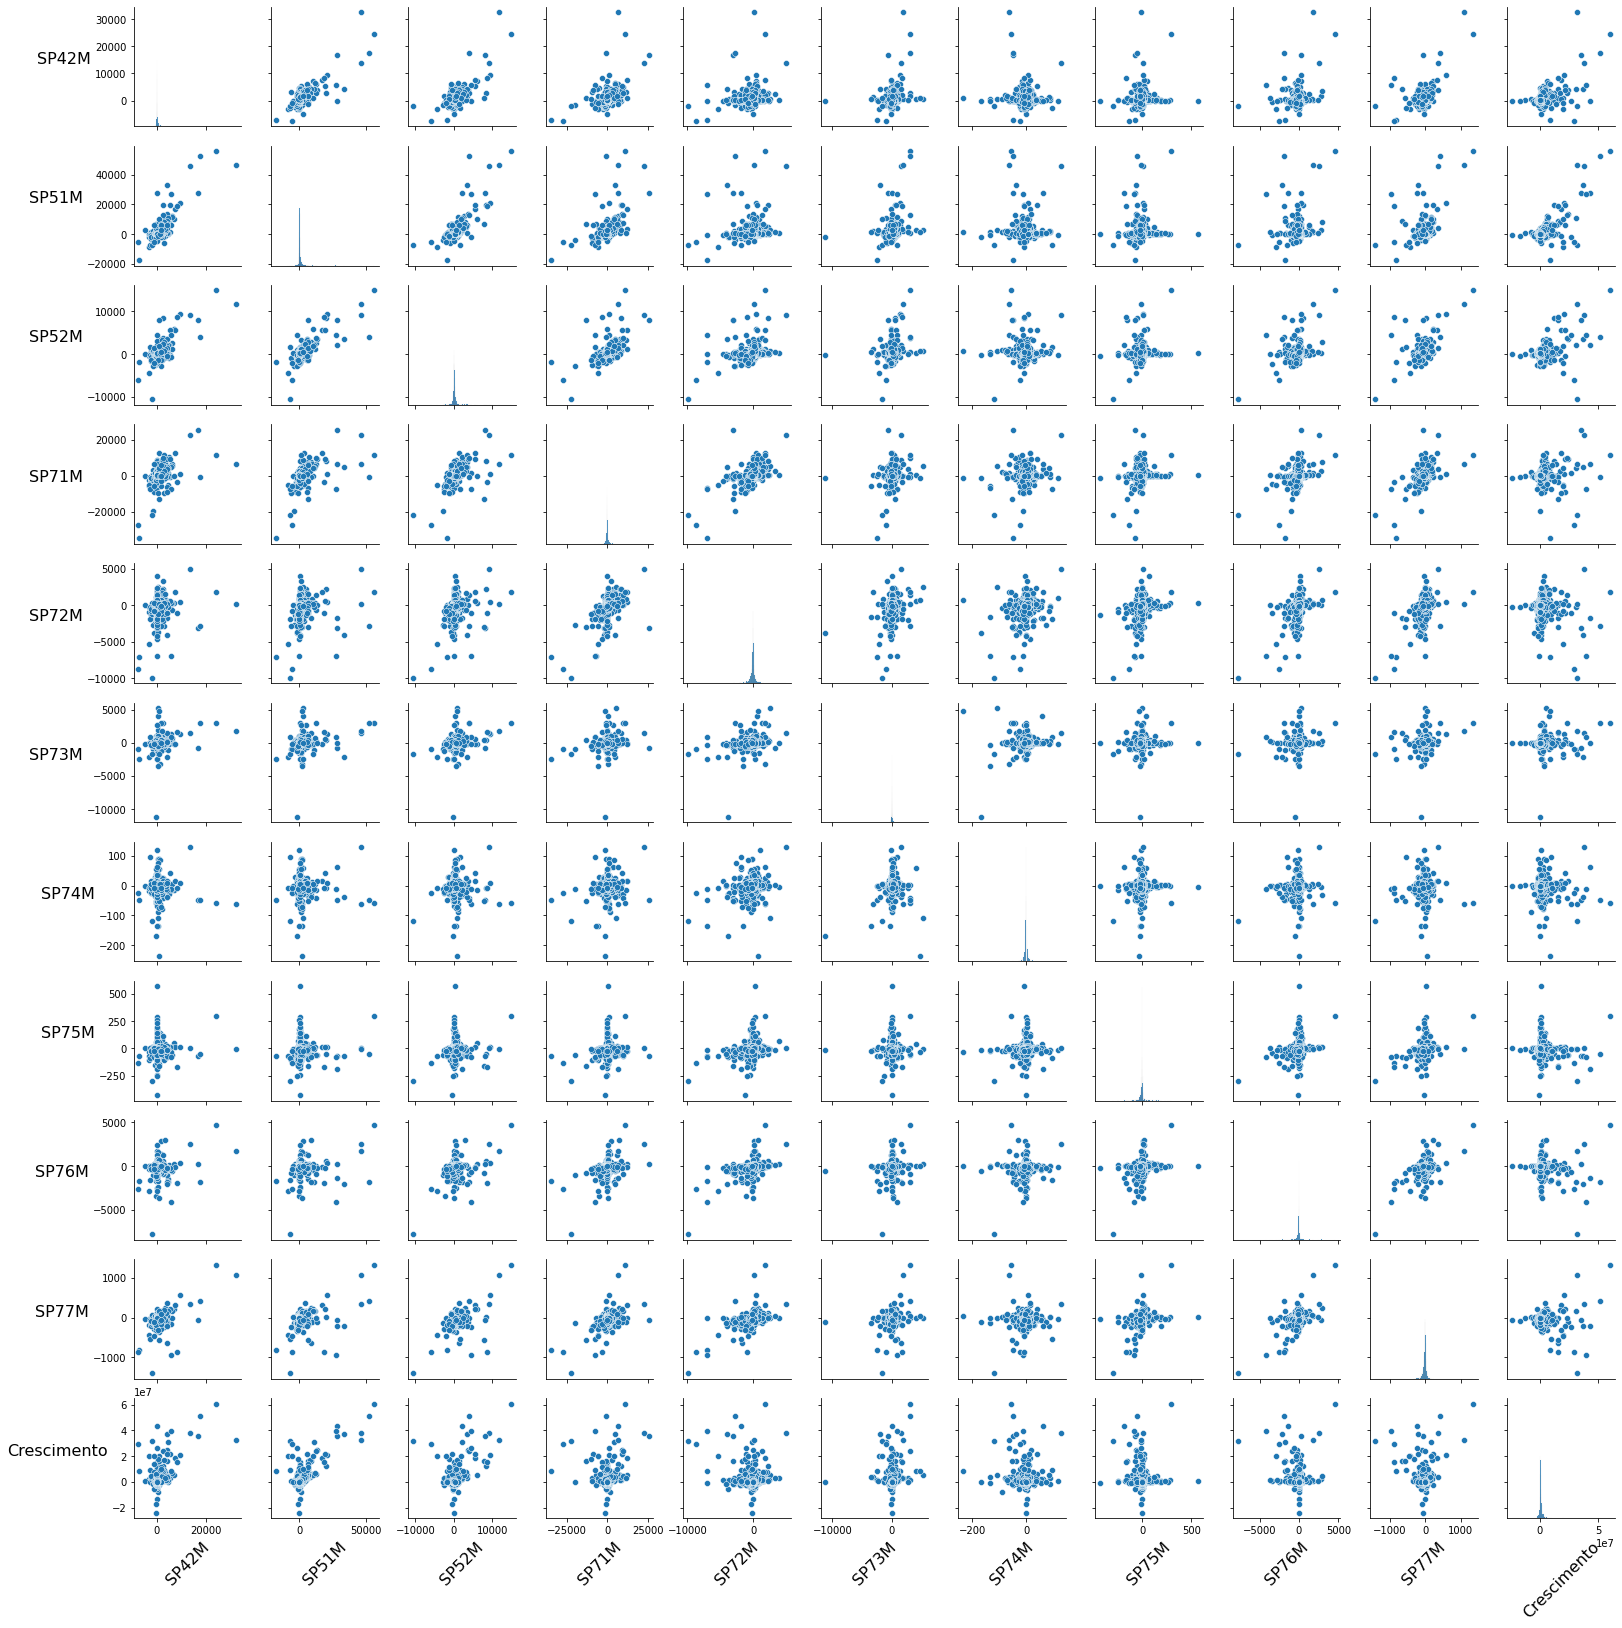

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPM[2].tolist()+['Crescimento']])

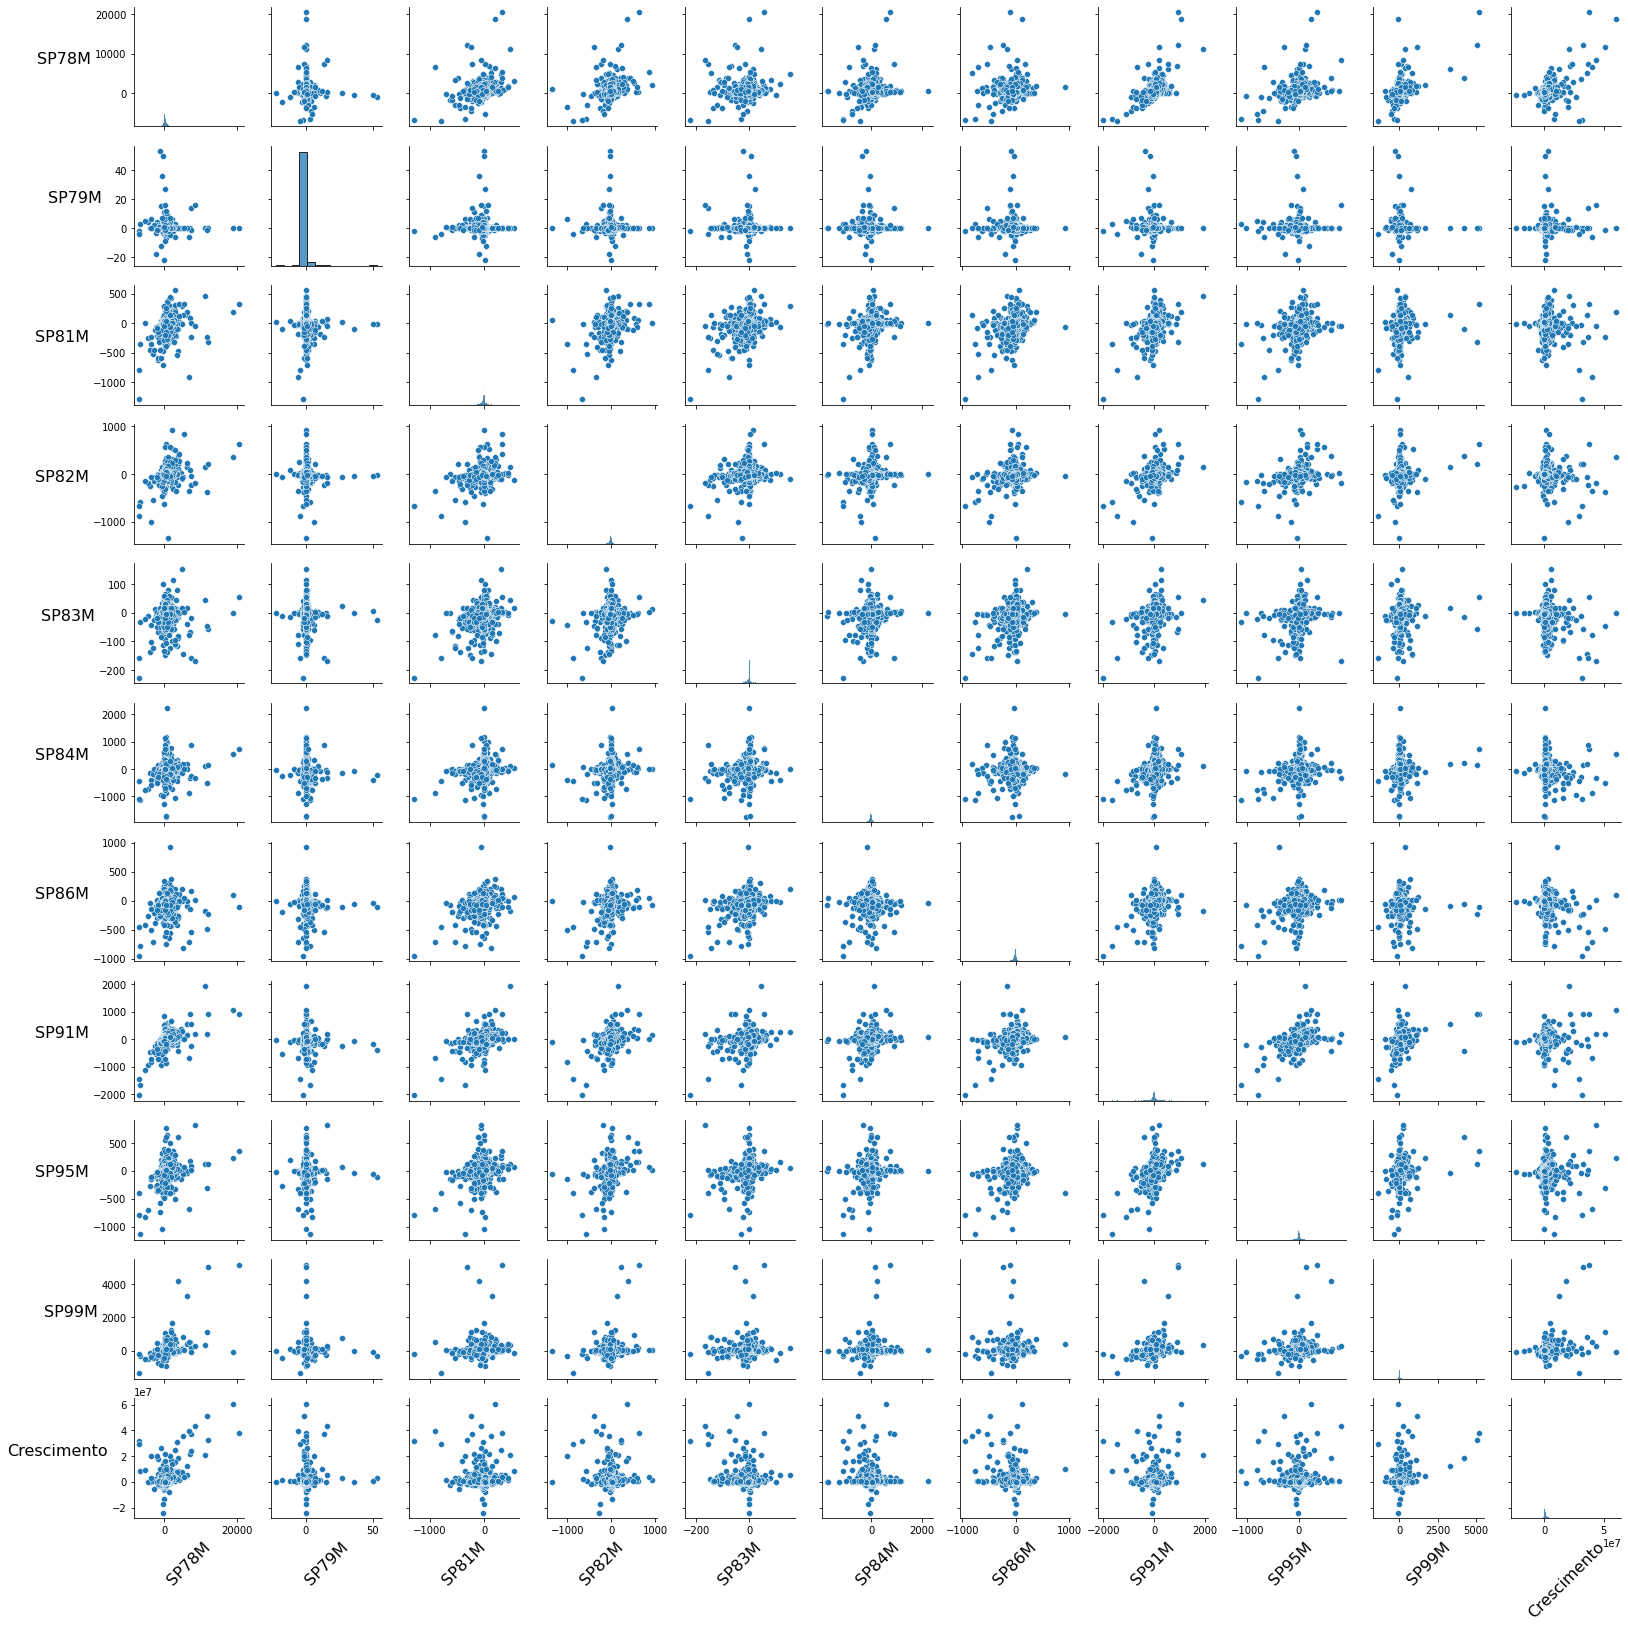

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPM[3].tolist()+['Crescimento']])

In [ ]:
# Exclui mais algumas colunas conforme os dados obtidos, muito concentrados
# ou distribuídos em cruz
Modelo.drop(columns=['SP11M','SP27M','SP79M'],inplace=True)
atributosSPM = fn.ListaPrefixo(list(Modelo),'SP','M')

In [ ]:
# Divide os atributos de salário em grupos para as movimentações
array_atribSPS = np.array_split(atributosSPS,4);
array_atribSPS

[array(['SP11S', 'SP12S', 'SP13S', 'SP14S', 'SP20S', 'SP21S', 'SP22S',
        'SP23S', 'SP24S', 'SP25S', 'SP26S'], dtype='<U5'),
 array(['SP27S', 'SP30S', 'SP31S', 'SP32S', 'SP33S', 'SP34S', 'SP35S',
        'SP37S', 'SP39S', 'SP41S'], dtype='<U5'),
 array(['SP42S', 'SP51S', 'SP52S', 'SP71S', 'SP72S', 'SP73S', 'SP74S',
        'SP75S', 'SP76S', 'SP77S'], dtype='<U5'),
 array(['SP78S', 'SP79S', 'SP81S', 'SP82S', 'SP83S', 'SP84S', 'SP86S',
        'SP91S', 'SP95S', 'SP99S'], dtype='<U5')]

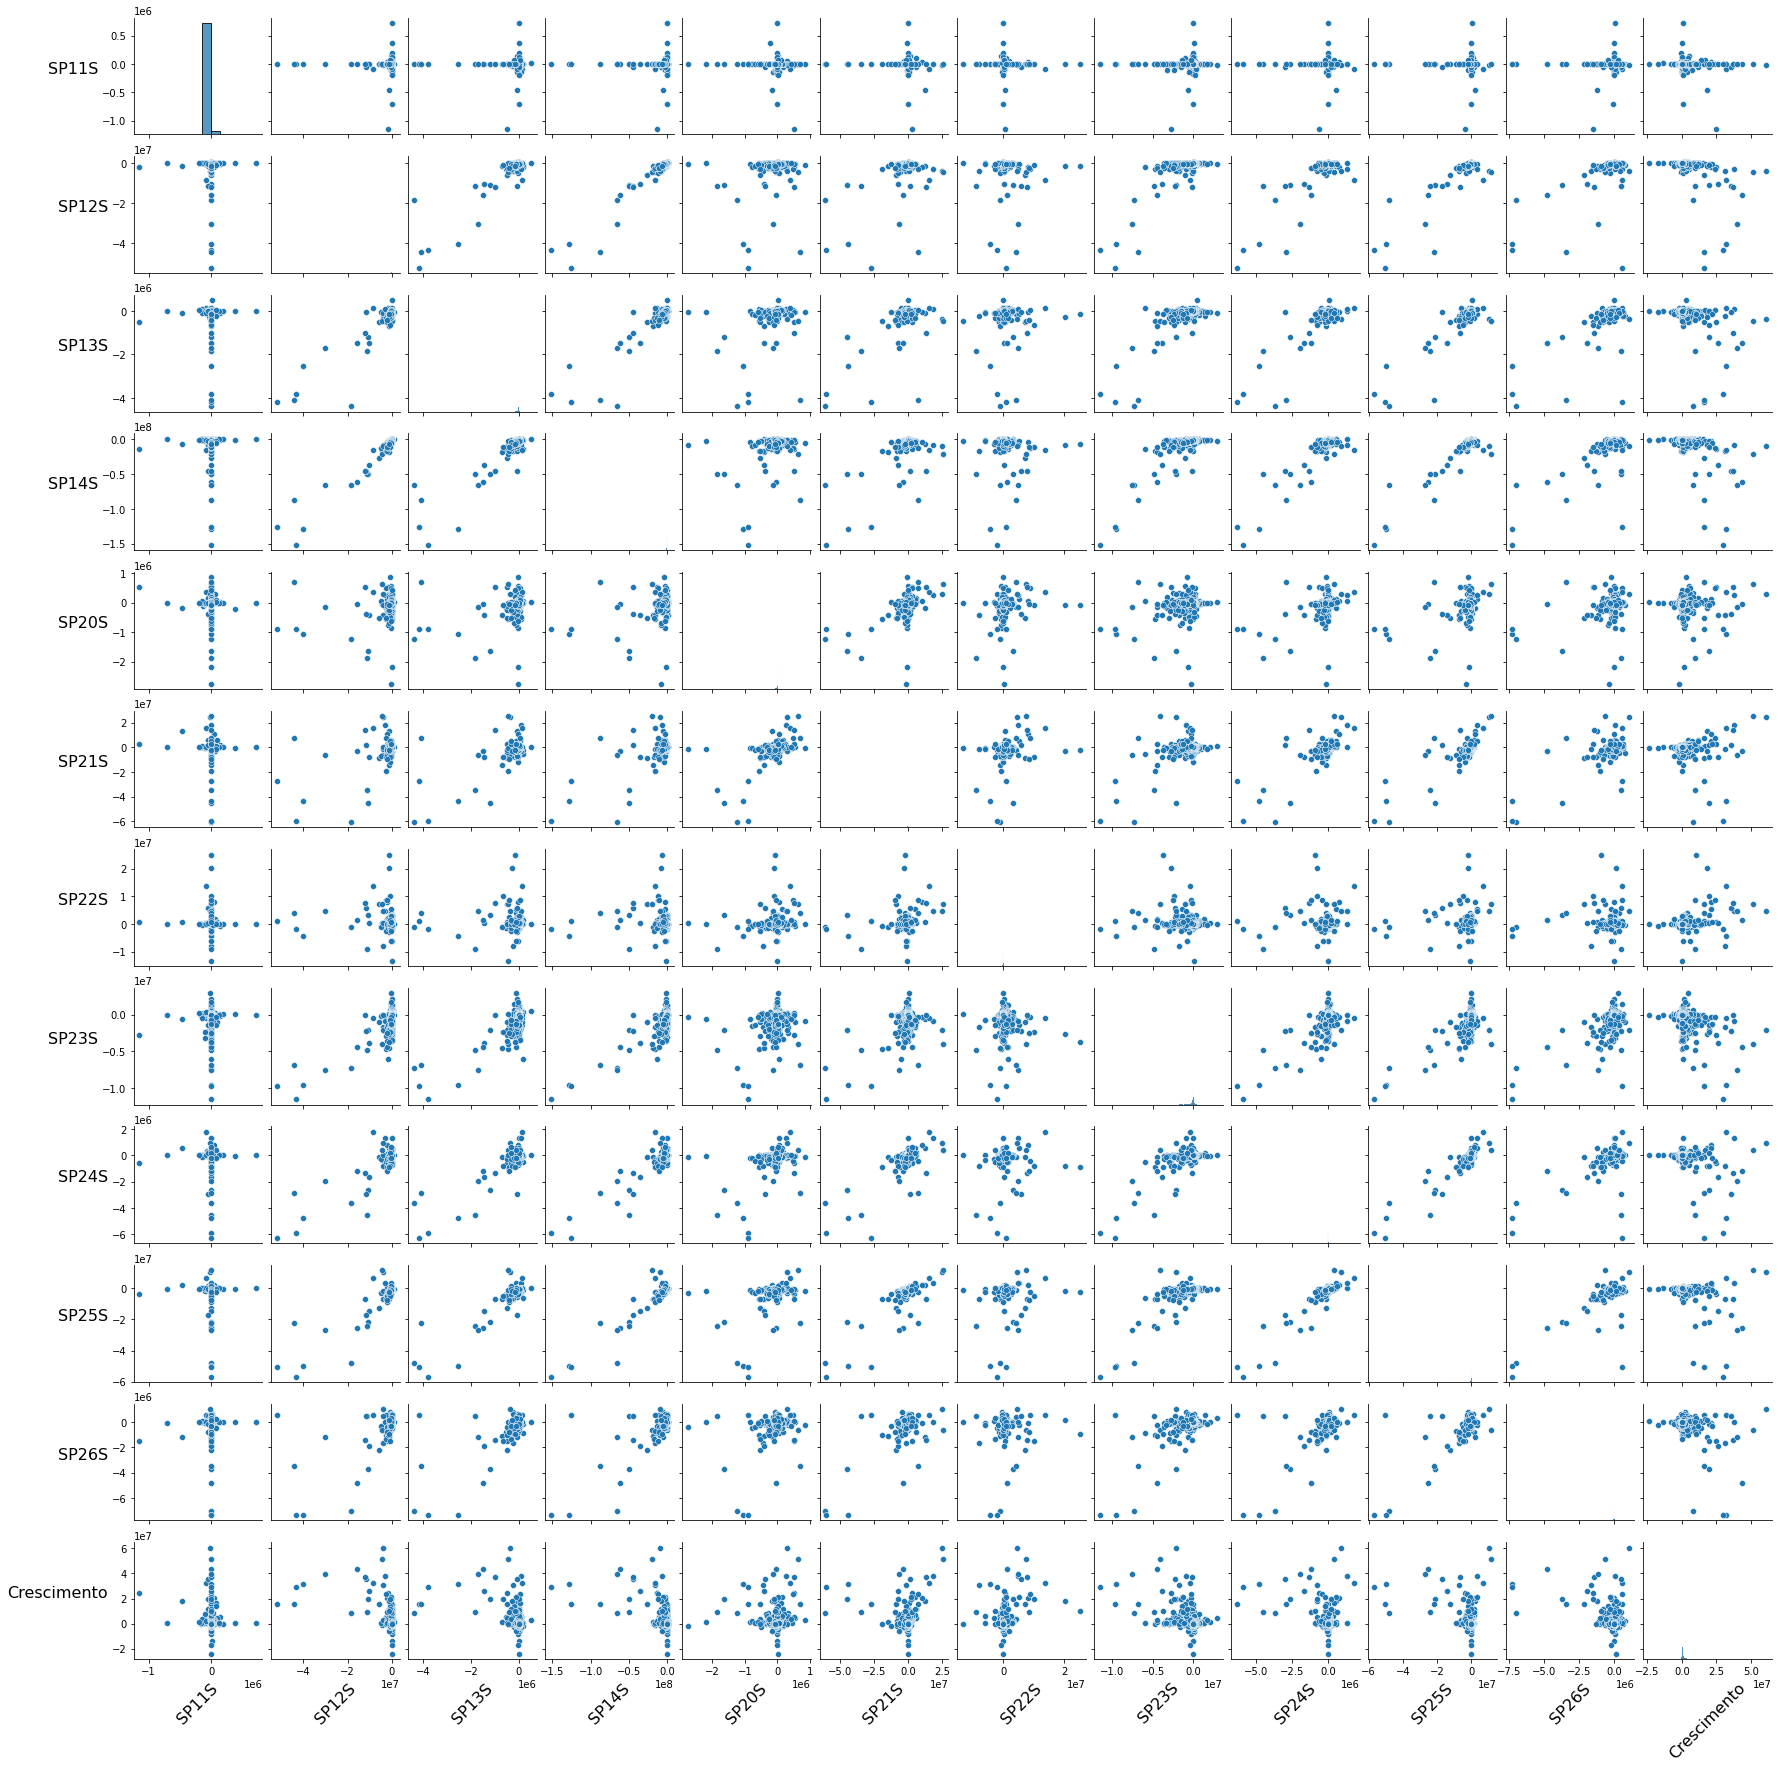

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPS[0].tolist()+['Crescimento']])

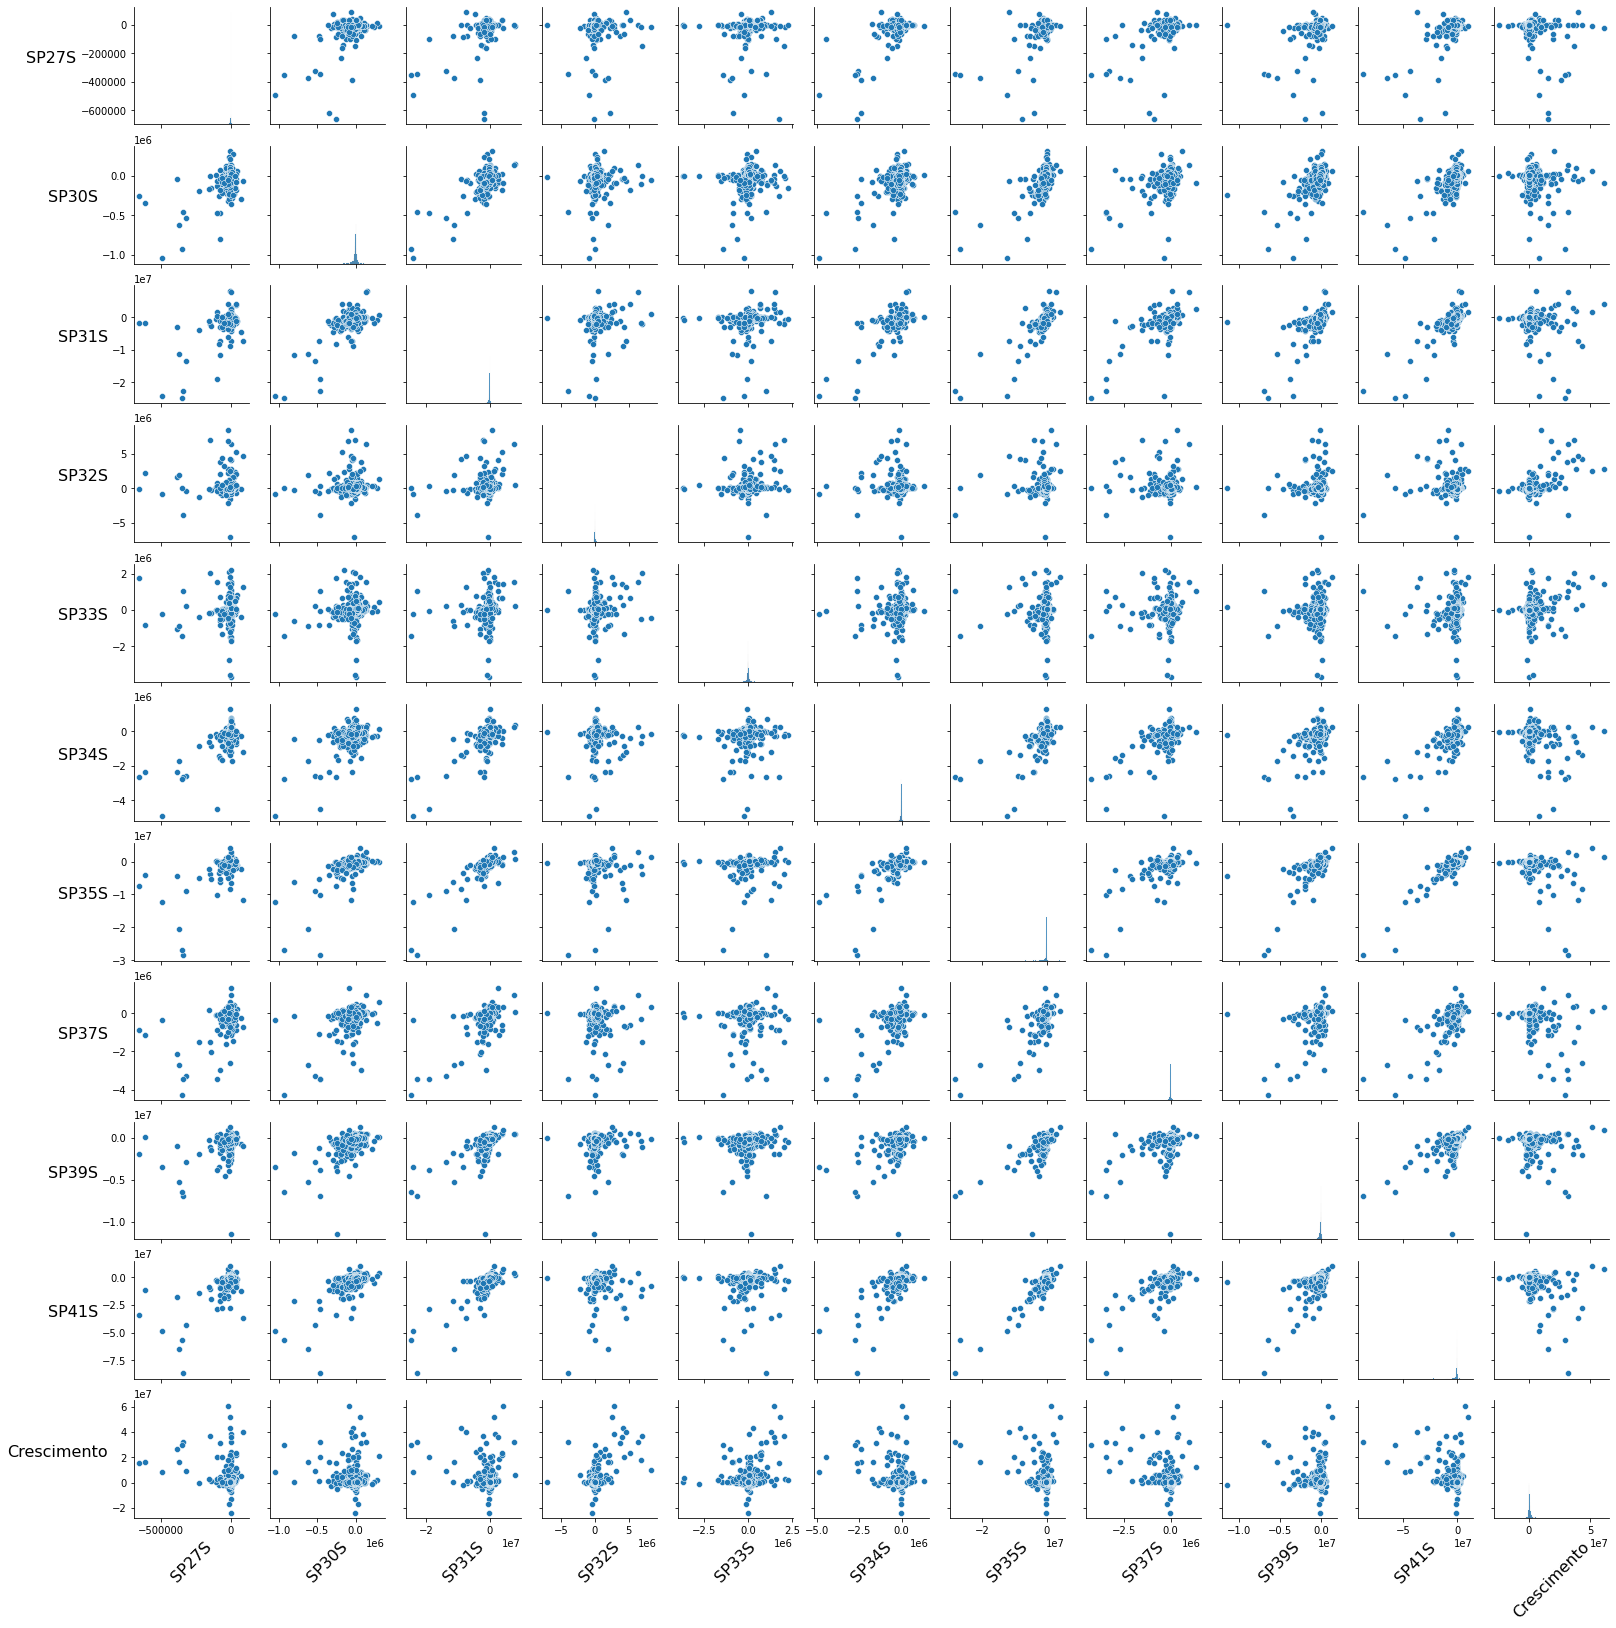

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPS[1].tolist()+['Crescimento']])

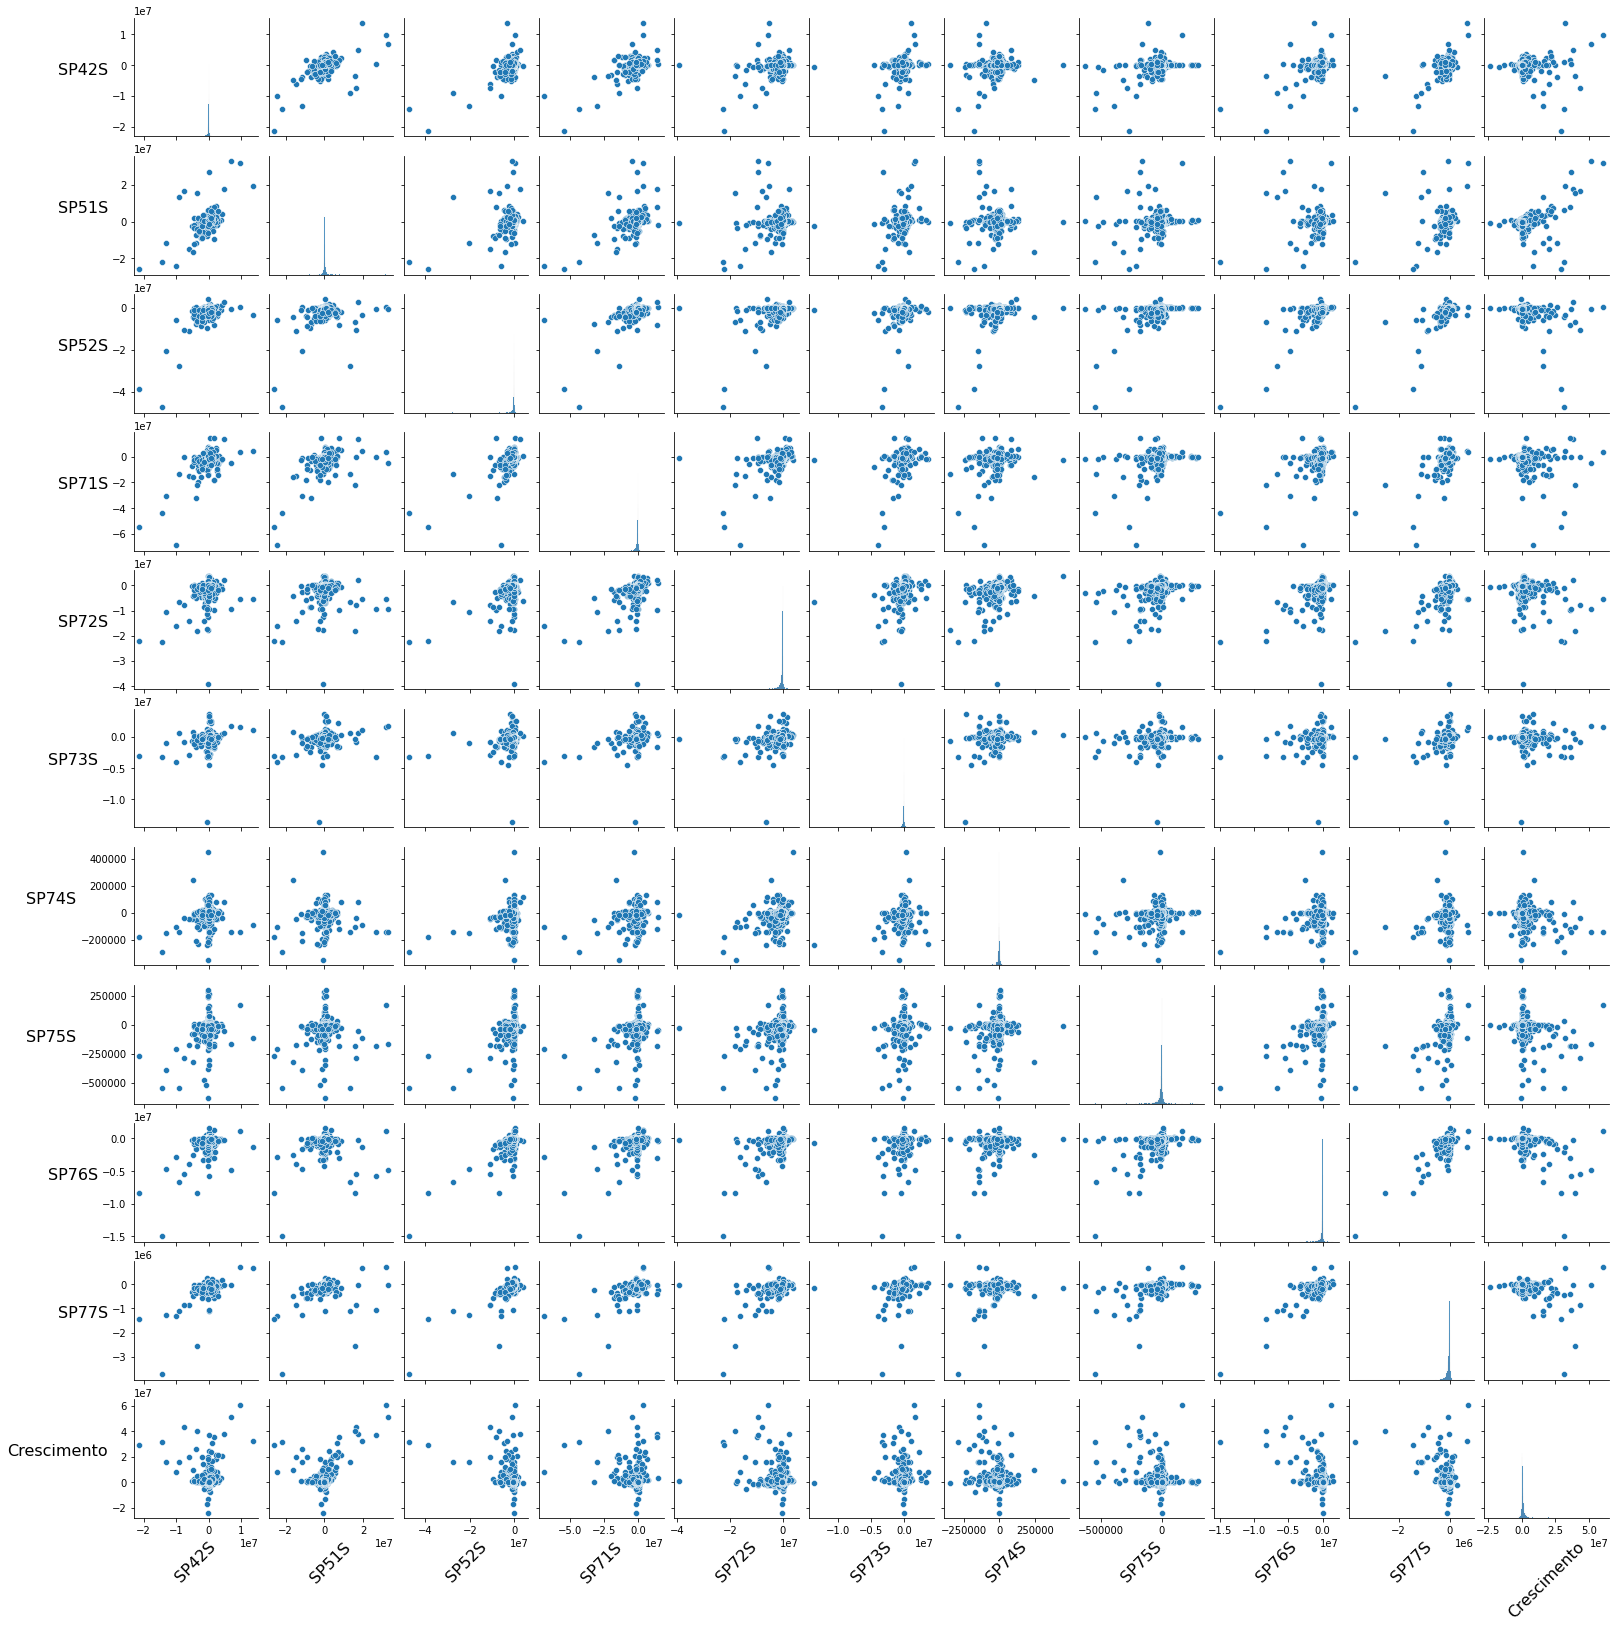

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPS[2].tolist()+['Crescimento']])

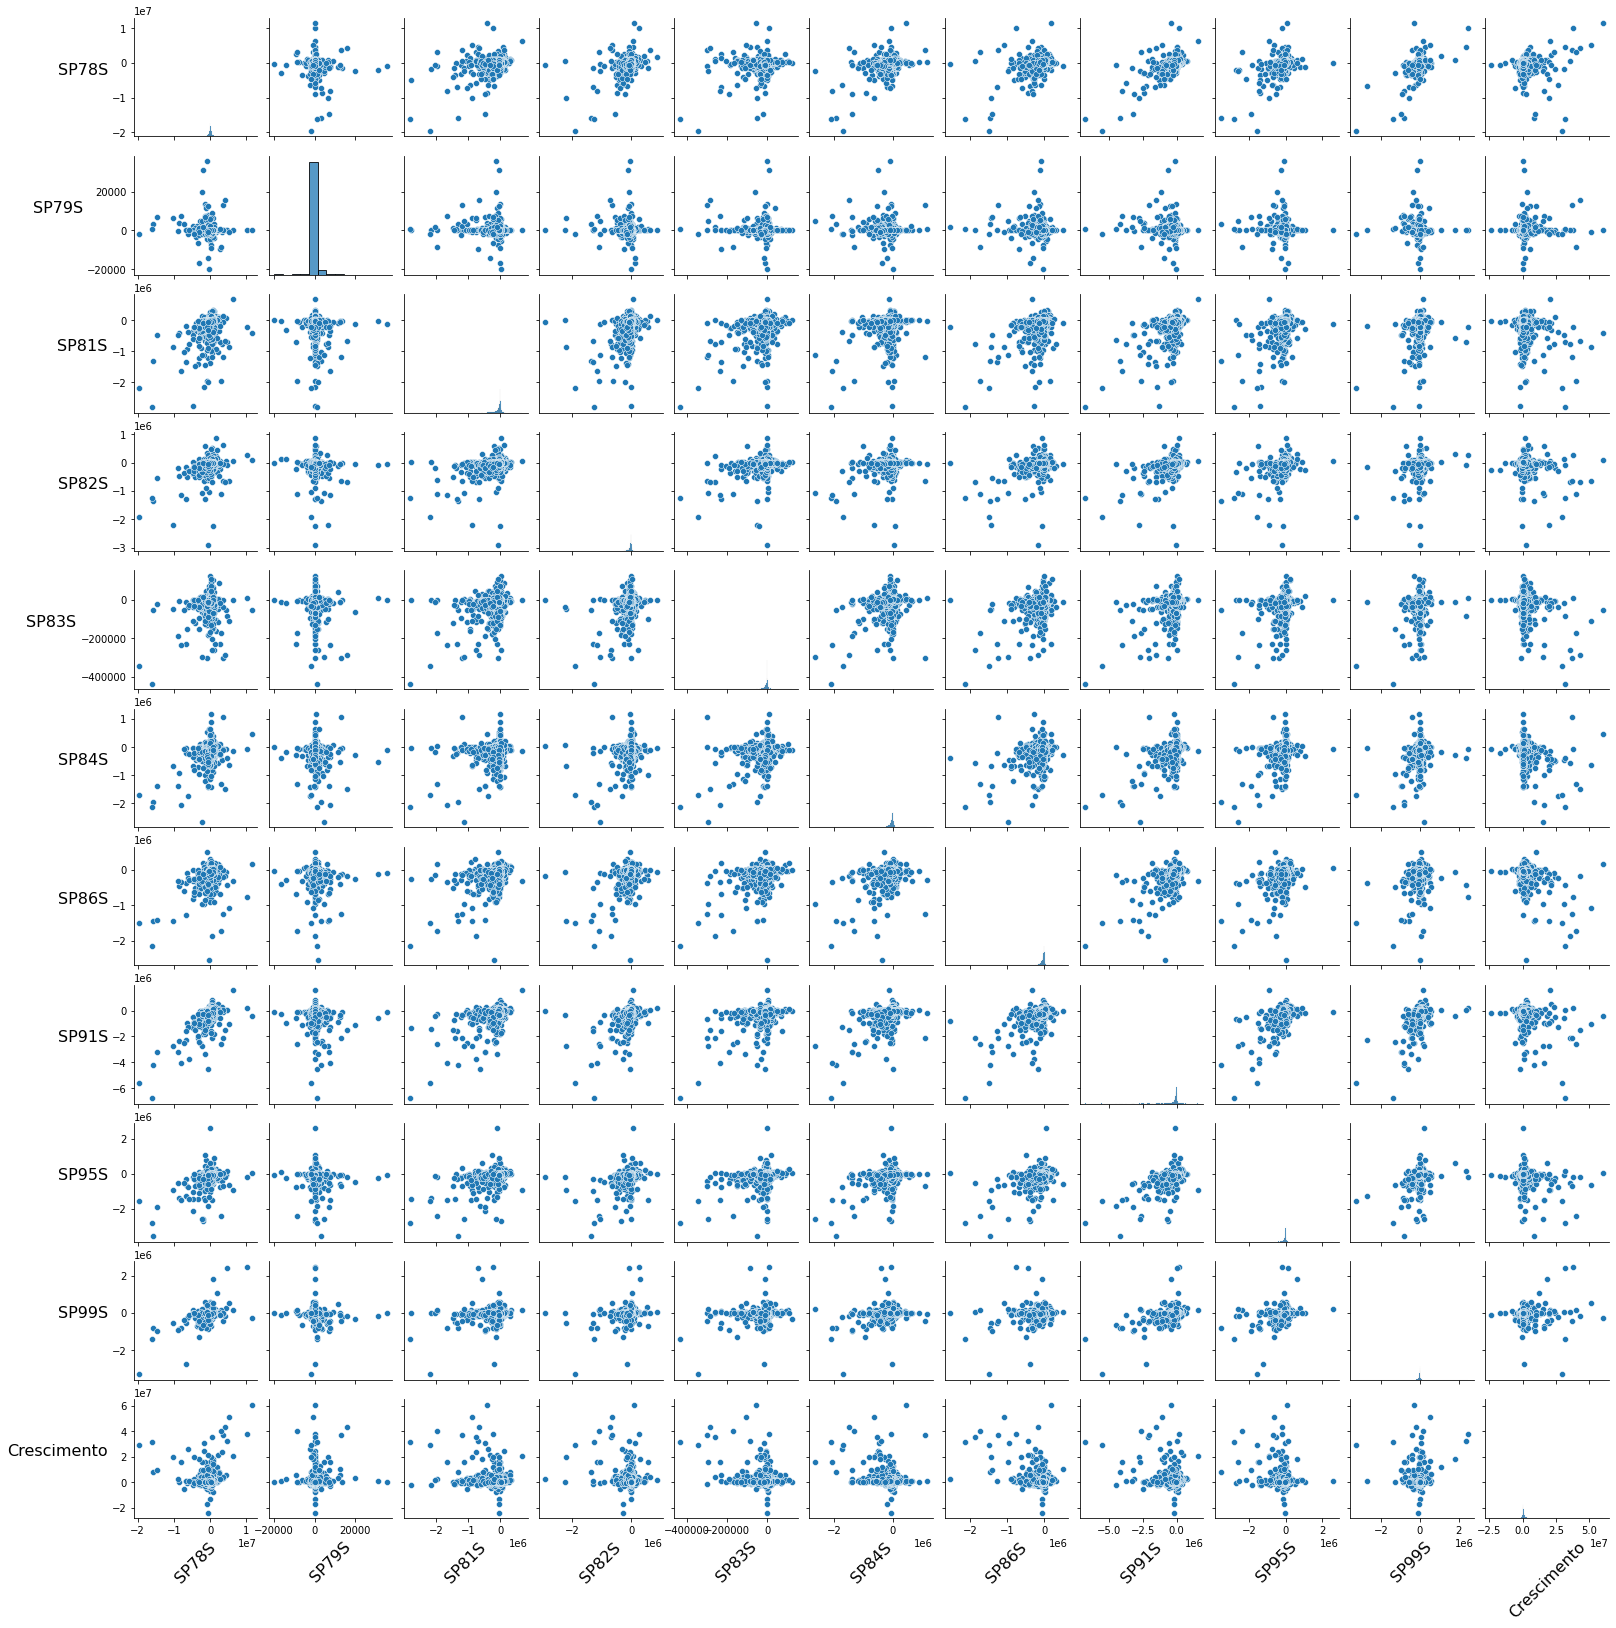

In [ ]:
fn.DispersaoPares(Modelo[array_atribSPS[3].tolist()+['Crescimento']])

In [ ]:
# Exclui mais algumas colunas conforme os dados obtidos, muito concentrados
# ou distribuídos em cruz
Modelo.drop(columns=['SP11S', 'SP79S'],inplace=True)

## Análise de dados IBGE subsetor

In [ ]:
# Lista de atributos de IBGE Subsetor (IS)
atributosISM = fn.ListaPrefixo(list(Modelo),'IS','M')
atributosISS = fn.ListaPrefixo(list(Modelo),'IS','S')
atributosIS = atributosISM+atributosISS

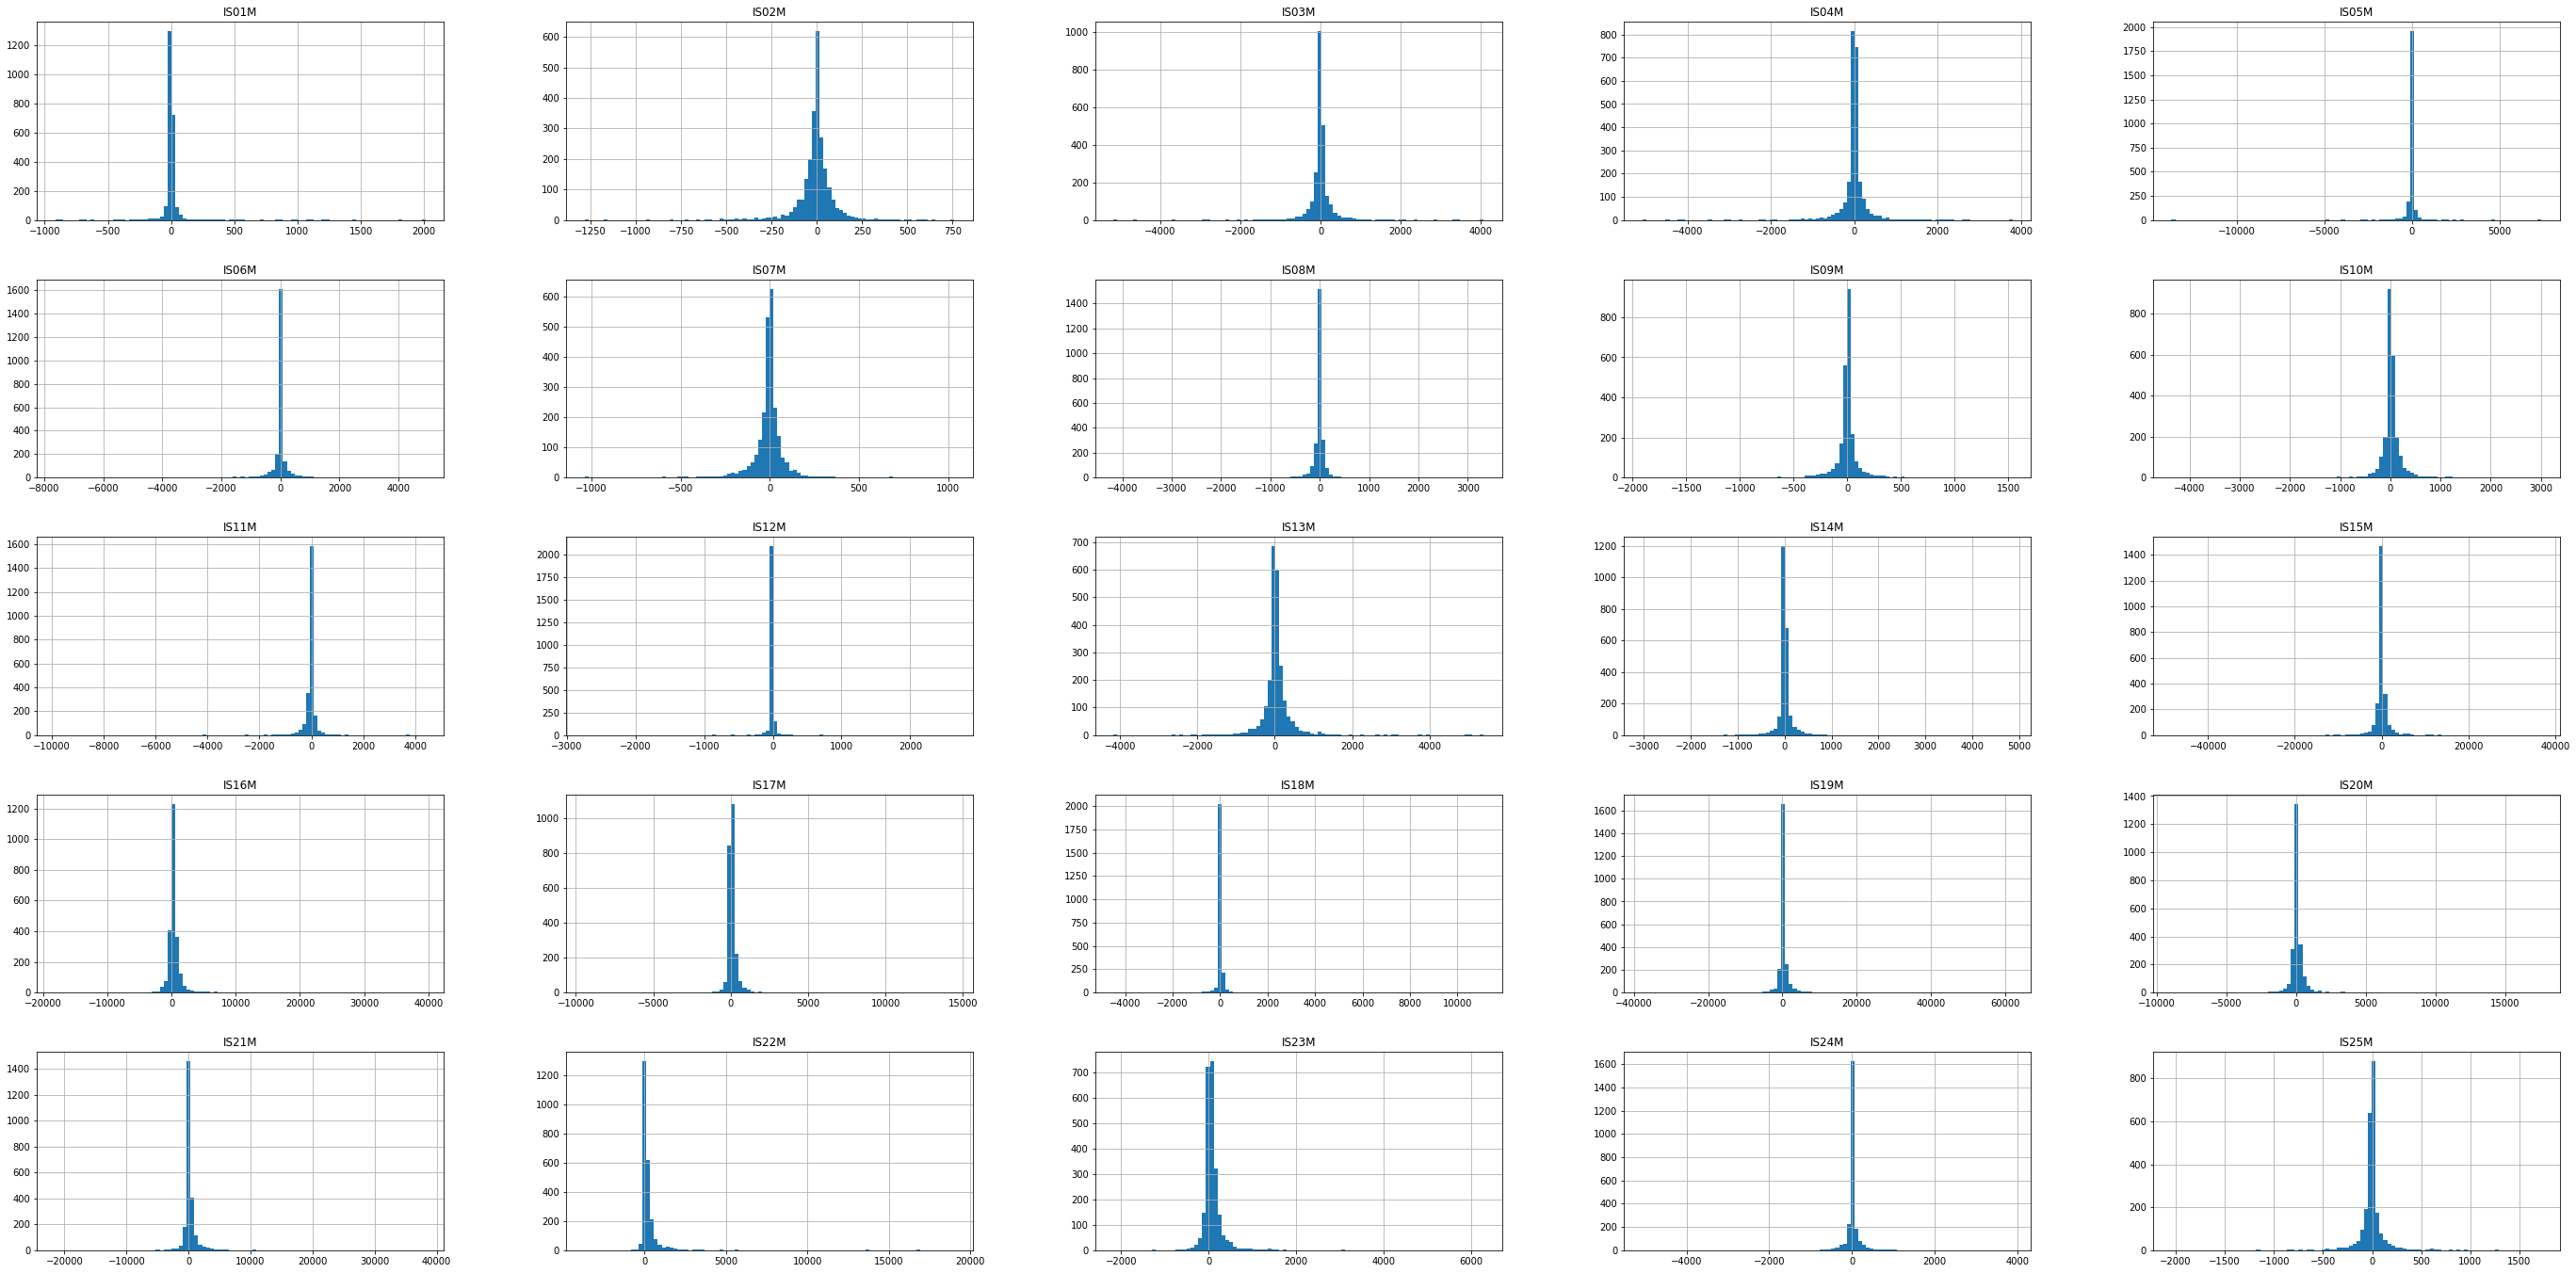

In [ ]:
# histórico da primeira metade dos atributos
hist = Modelo.hist(column=atributosISM,figsize=(48,24),bins=96)     

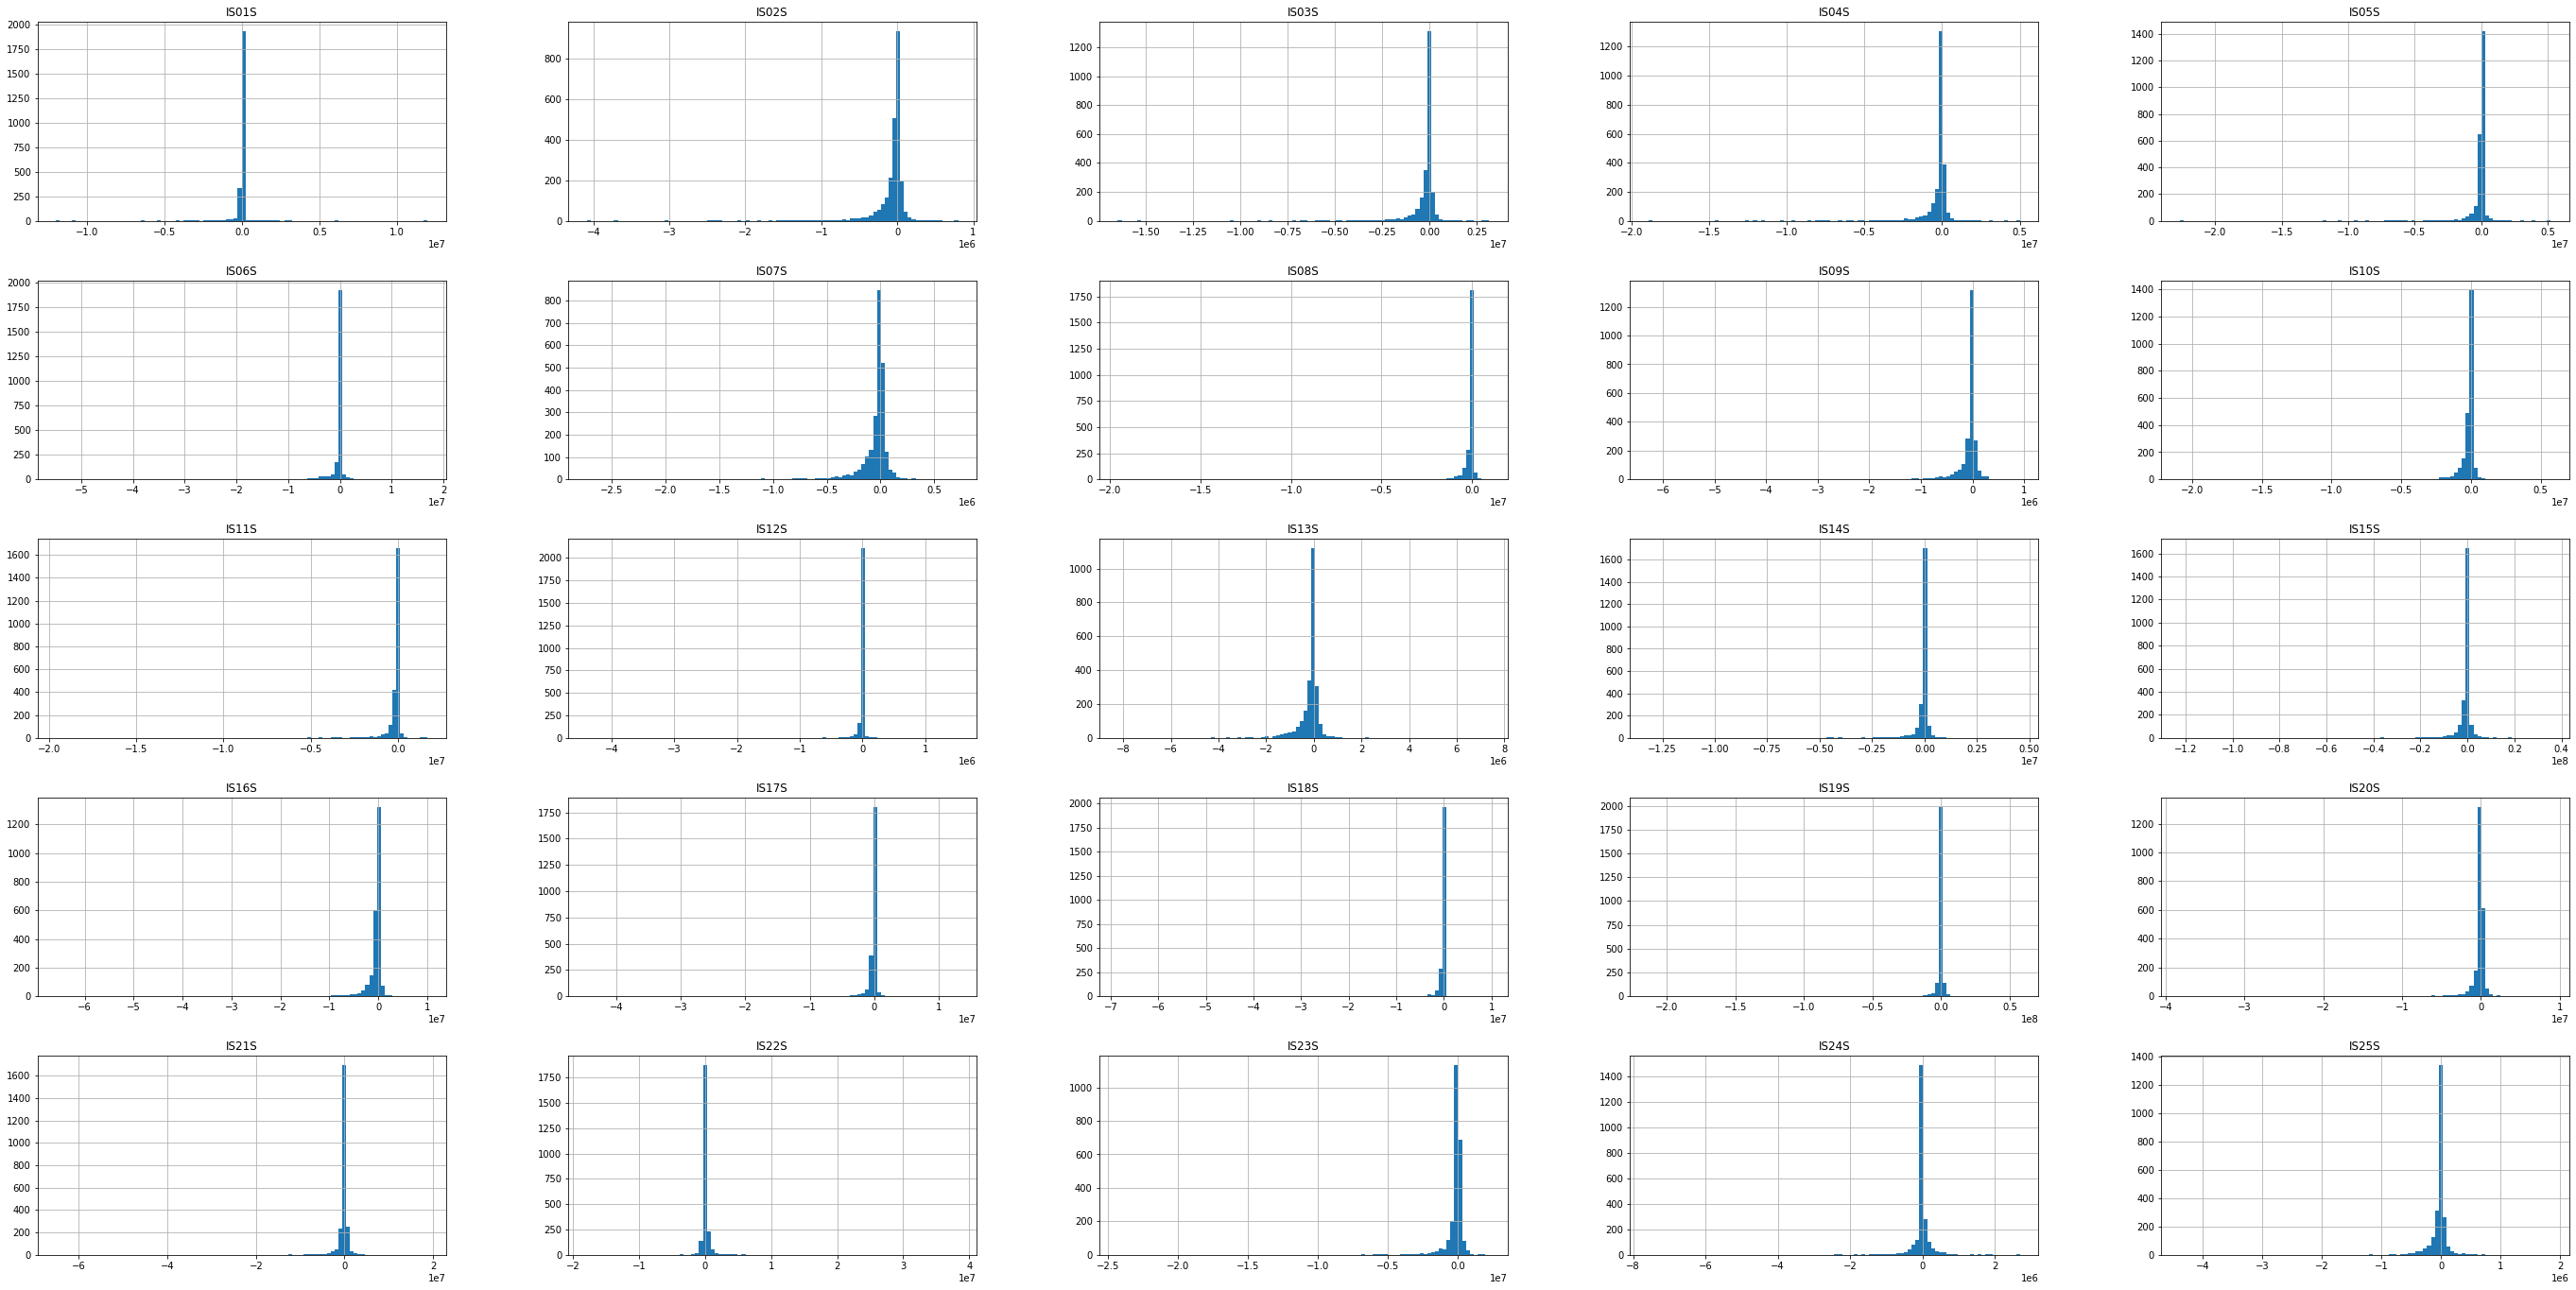

In [ ]:
# histórico da segunda metade dos atributos
hist = Modelo.hist(column=atributosISS,figsize=(48,24),bins=96)  

In [ ]:
# correlação entre os parâmetros
temp = Modelo.drop(columns='PIB').loc[:,atributosIS+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

              IS01M   IS02M   IS03M   IS04M   IS05M   IS06M   IS07M   IS08M  \
IS01M        1.0000  0.1303  0.1483  0.1181  0.0530  0.1119  0.1011  0.1444   
IS02M        0.1303  1.0000  0.4152  0.3309  0.1696  0.2600  0.3063  0.4739   
IS03M        0.1483  0.4152  1.0000  0.4598  0.3319  0.3498  0.3758  0.5892   
IS04M        0.1181  0.3309  0.4598  1.0000  0.4139  0.2723  0.2499  0.3900   
IS05M        0.0530  0.1696  0.3319  0.4139  1.0000  0.1865  0.1682  0.3315   
IS06M        0.1119  0.2600  0.3498  0.2723  0.1865  1.0000  0.1940  0.2849   
IS07M        0.1011  0.3063  0.3758  0.2499  0.1682  0.1940  1.0000  0.4381   
IS08M        0.1444  0.4739  0.5892  0.3900  0.3315  0.2849  0.4381  1.0000   
IS09M        0.1230  0.2928  0.3873  0.3453  0.2668  0.2379  0.2790  0.3791   
IS10M        0.1811  0.3841  0.5089  0.4556  0.3420  0.3666  0.3654  0.5288   
IS11M        0.1215  0.3362  0.4429  0.3189  0.1955  0.2216  0.3259  0.5896   
IS12M        0.0095  0.0368  0.0418  0.0303  0.0141 

In [ ]:
# comparação dos atributos aos pares
fn.DispersaoPares(Modelo[atributosISM])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fn.DispersaoPares(Modelo[atributosISS])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# exclui campos em cruz
Modelo.drop(columns=['IS01M','IS12M','IS24M','IS25M',
                     'IS01S','IS12S','IS24S', 'IS25S'],inplace=True)


## Análise dados FaixaEmpr

In [ ]:
# Lista de atributos de FaixaEmpr
atributosFEM = fn.ListaPrefixo(list(Modelo),'FE','M')
atributosFES = fn.ListaPrefixo(list(Modelo),'FE','S')
atributosFE = atributosFEM+atributosFES

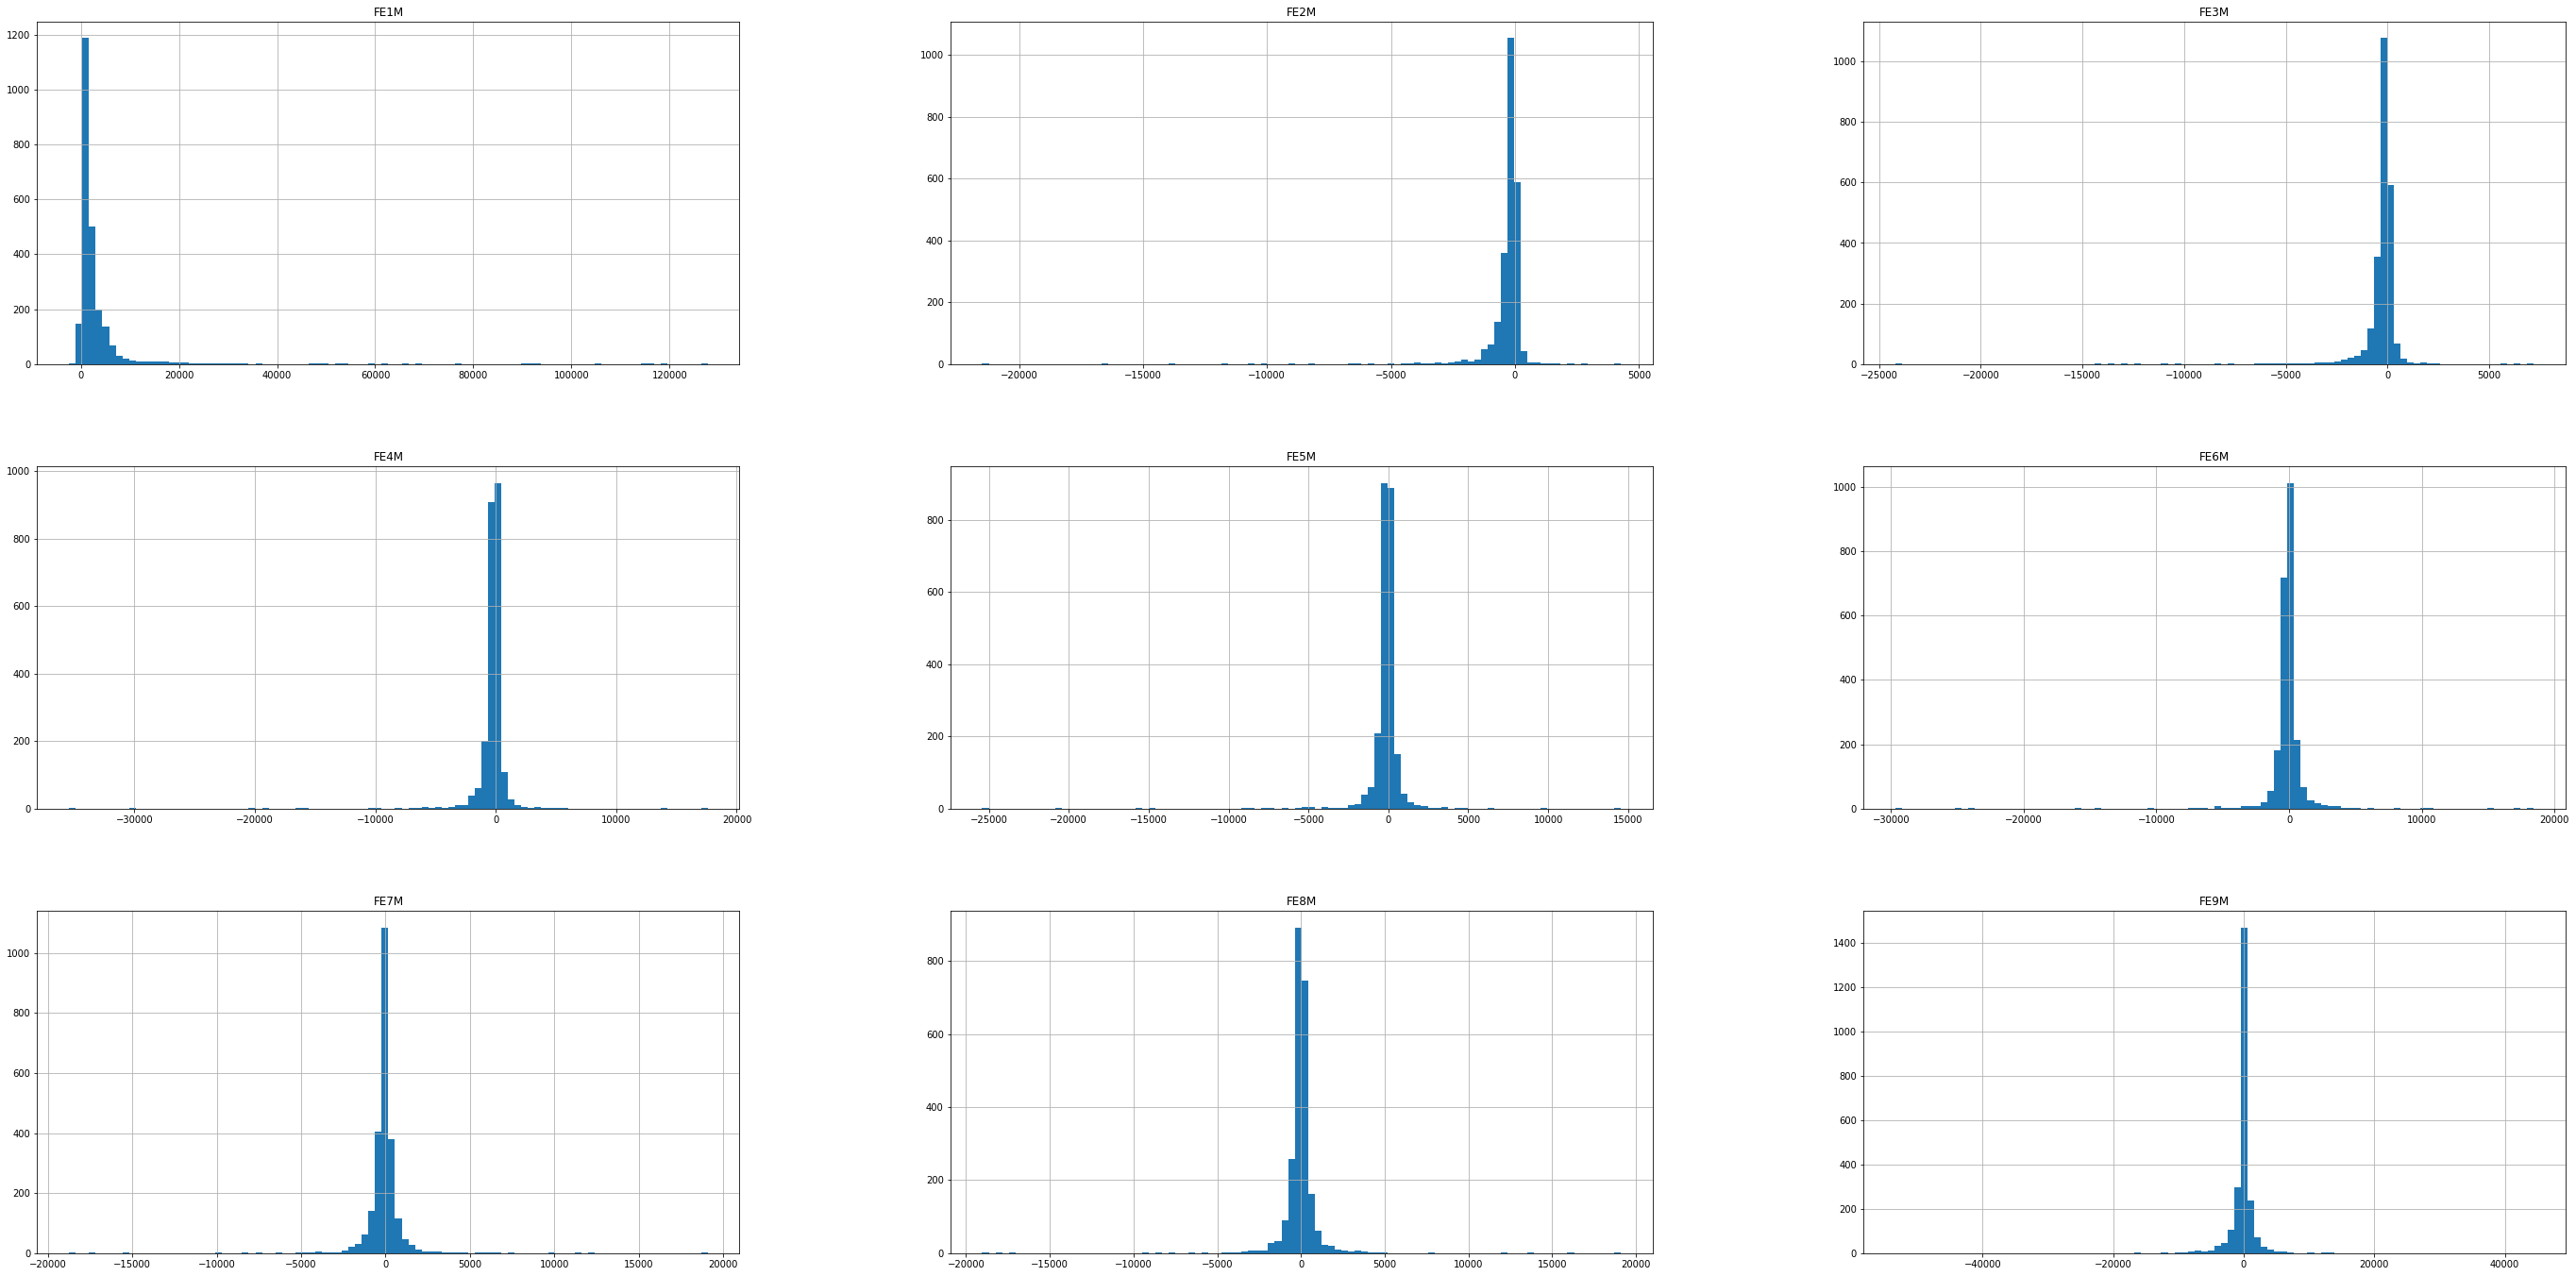

In [ ]:
# histórico da primeira metade dos atributos
hist = Modelo.hist(column=atributosFEM,figsize=(48,24),bins=96)     

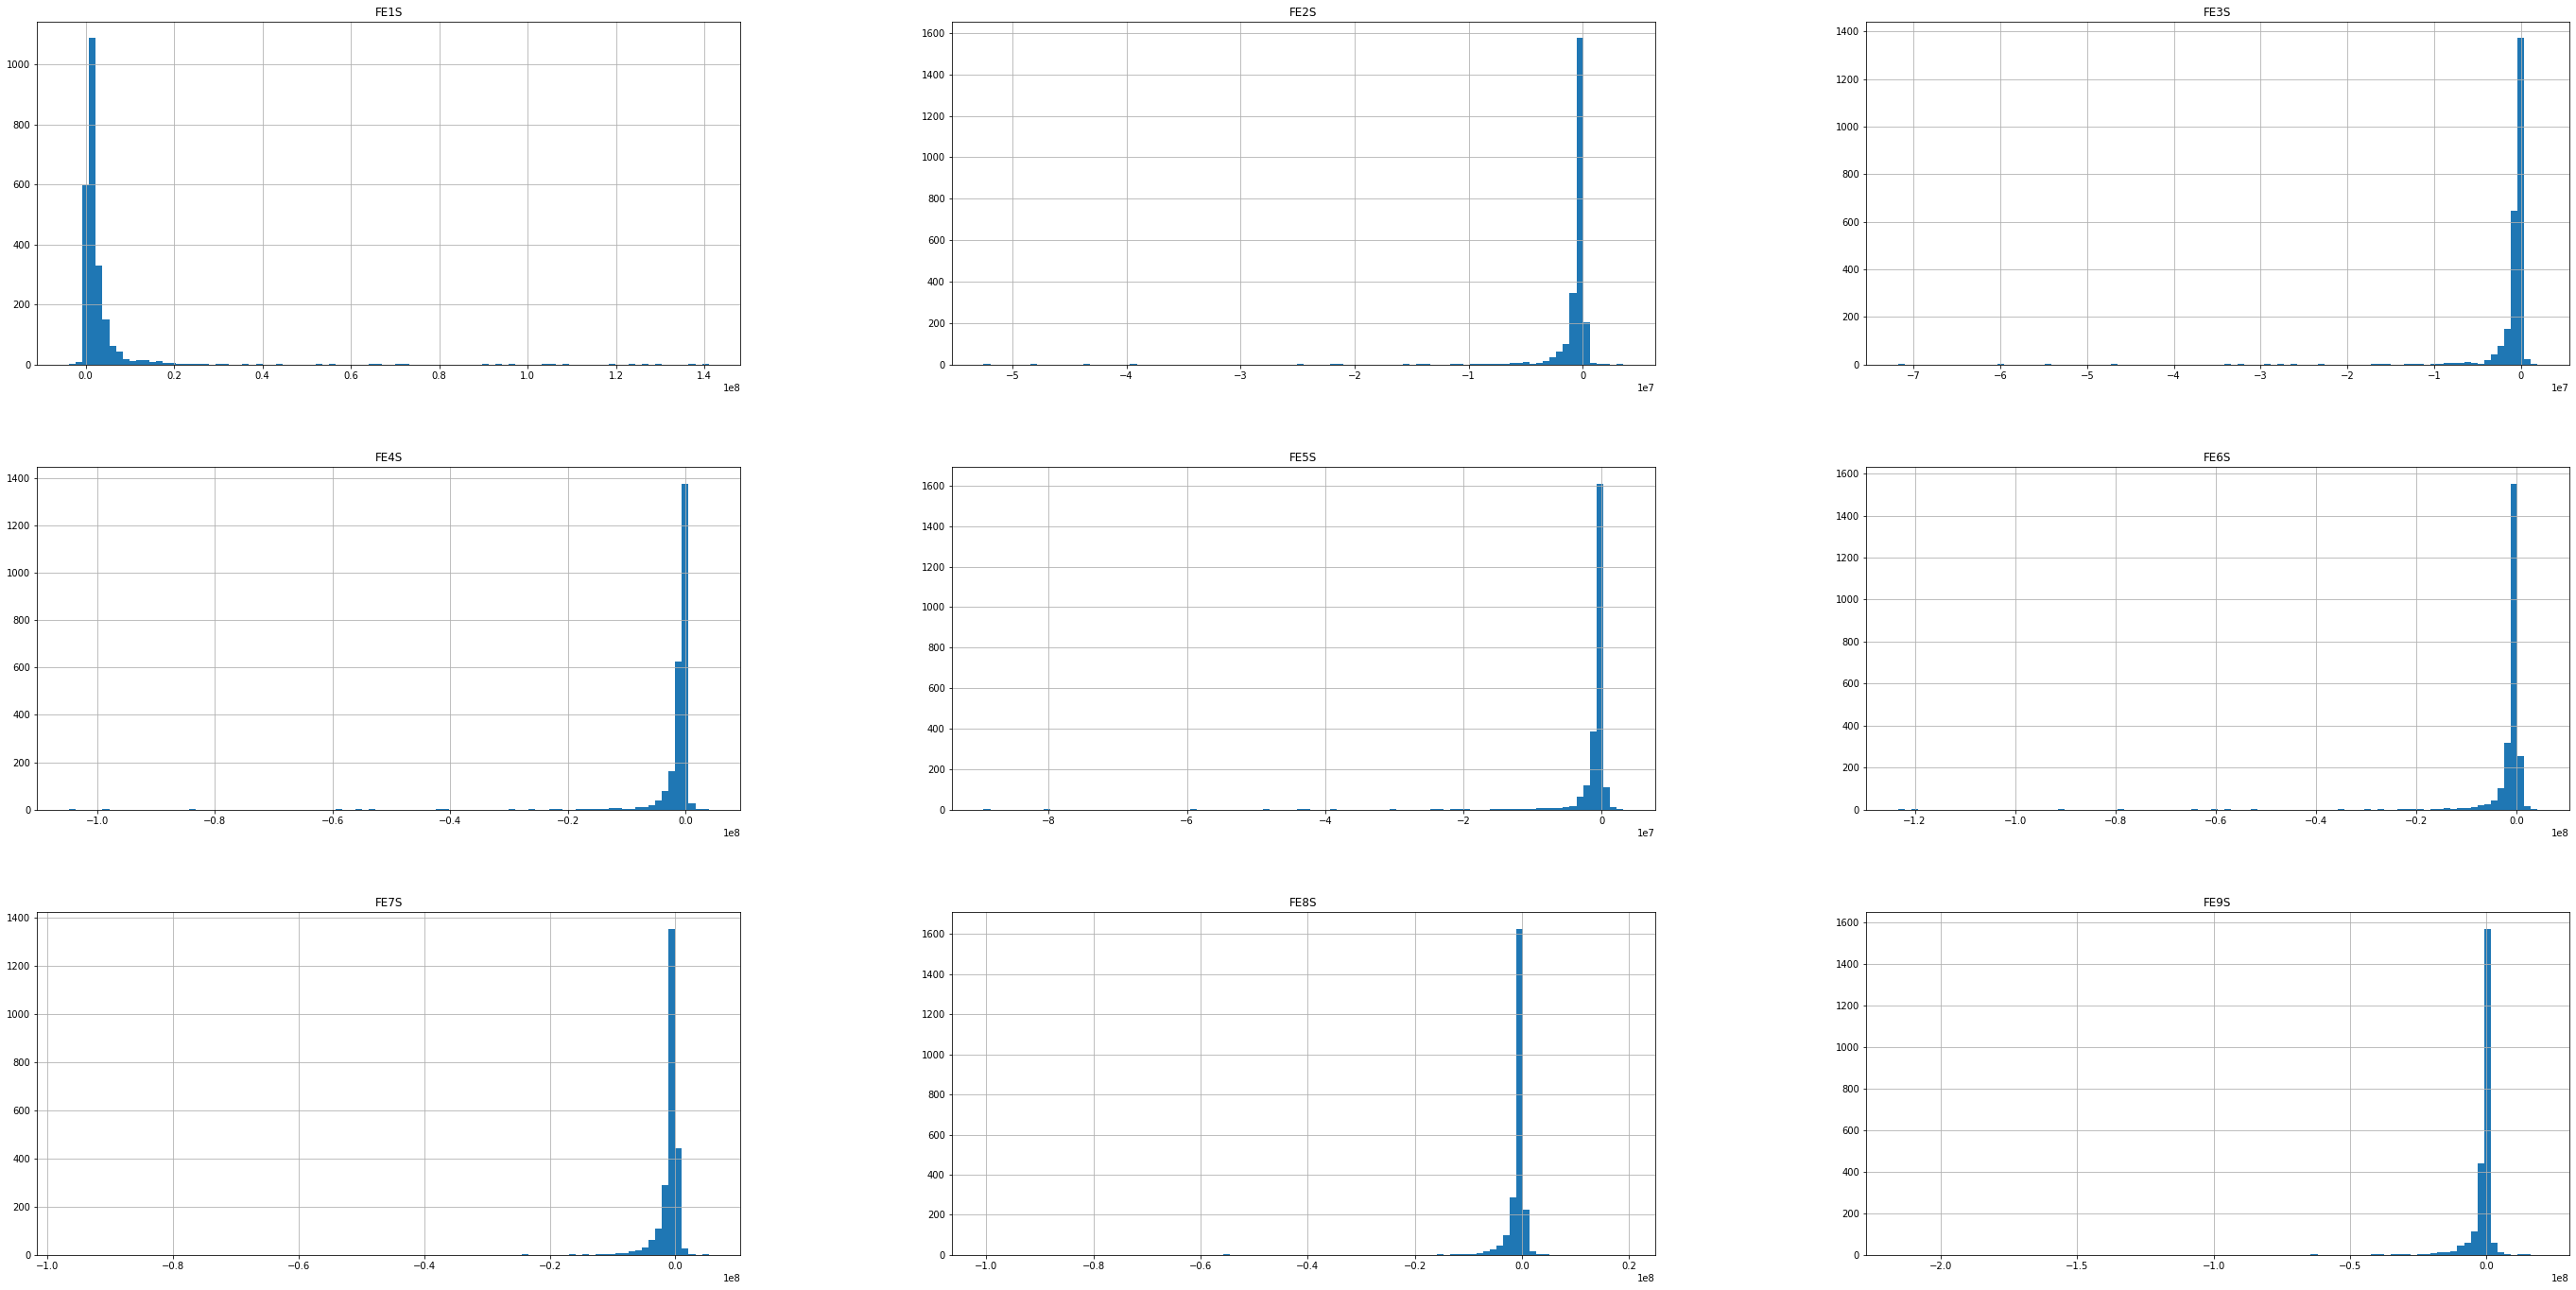

In [ ]:
# histórico da segunda metade dos atributos
hist = Modelo.hist(column=atributosFES,figsize=(48,24),bins=96)  

In [ ]:
# correlação entre os parâmetros
temp = Modelo.drop(columns='PIB').loc[:,atributosFE+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

               FE1M    FE2M    FE3M    FE4M    FE5M    FE6M    FE7M    FE8M  \
FE1M         1.0000 -0.4489 -0.3629 -0.1304  0.0540  0.1401  0.2194  0.2105   
FE2M        -0.4489  1.0000  0.9540  0.8722  0.7644  0.6830  0.5590  0.5228   
FE3M        -0.3629  0.9540  1.0000  0.9232  0.8295  0.7589  0.6232  0.5867   
FE4M        -0.1304  0.8722  0.9232  1.0000  0.9174  0.8746  0.7460  0.7127   
FE5M         0.0540  0.7644  0.8295  0.9174  1.0000  0.9025  0.7848  0.7592   
FE6M         0.1401  0.6830  0.7589  0.8746  0.9025  1.0000  0.7932  0.7609   
FE7M         0.2194  0.5590  0.6232  0.7460  0.7848  0.7932  1.0000  0.7190   
FE8M         0.2105  0.5228  0.5867  0.7127  0.7592  0.7609  0.7190  1.0000   
FE9M         0.1239  0.5270  0.6126  0.7090  0.7262  0.7398  0.6941  0.6674   
FE1S         0.9644 -0.5794 -0.5024 -0.2802 -0.0980  0.0060  0.1187  0.1030   
FE2S        -0.5401  0.9600  0.8949  0.7819  0.6544  0.5643  0.4697  0.4349   
FE3S        -0.5825  0.9525  0.9295  0.8006  0.6696 

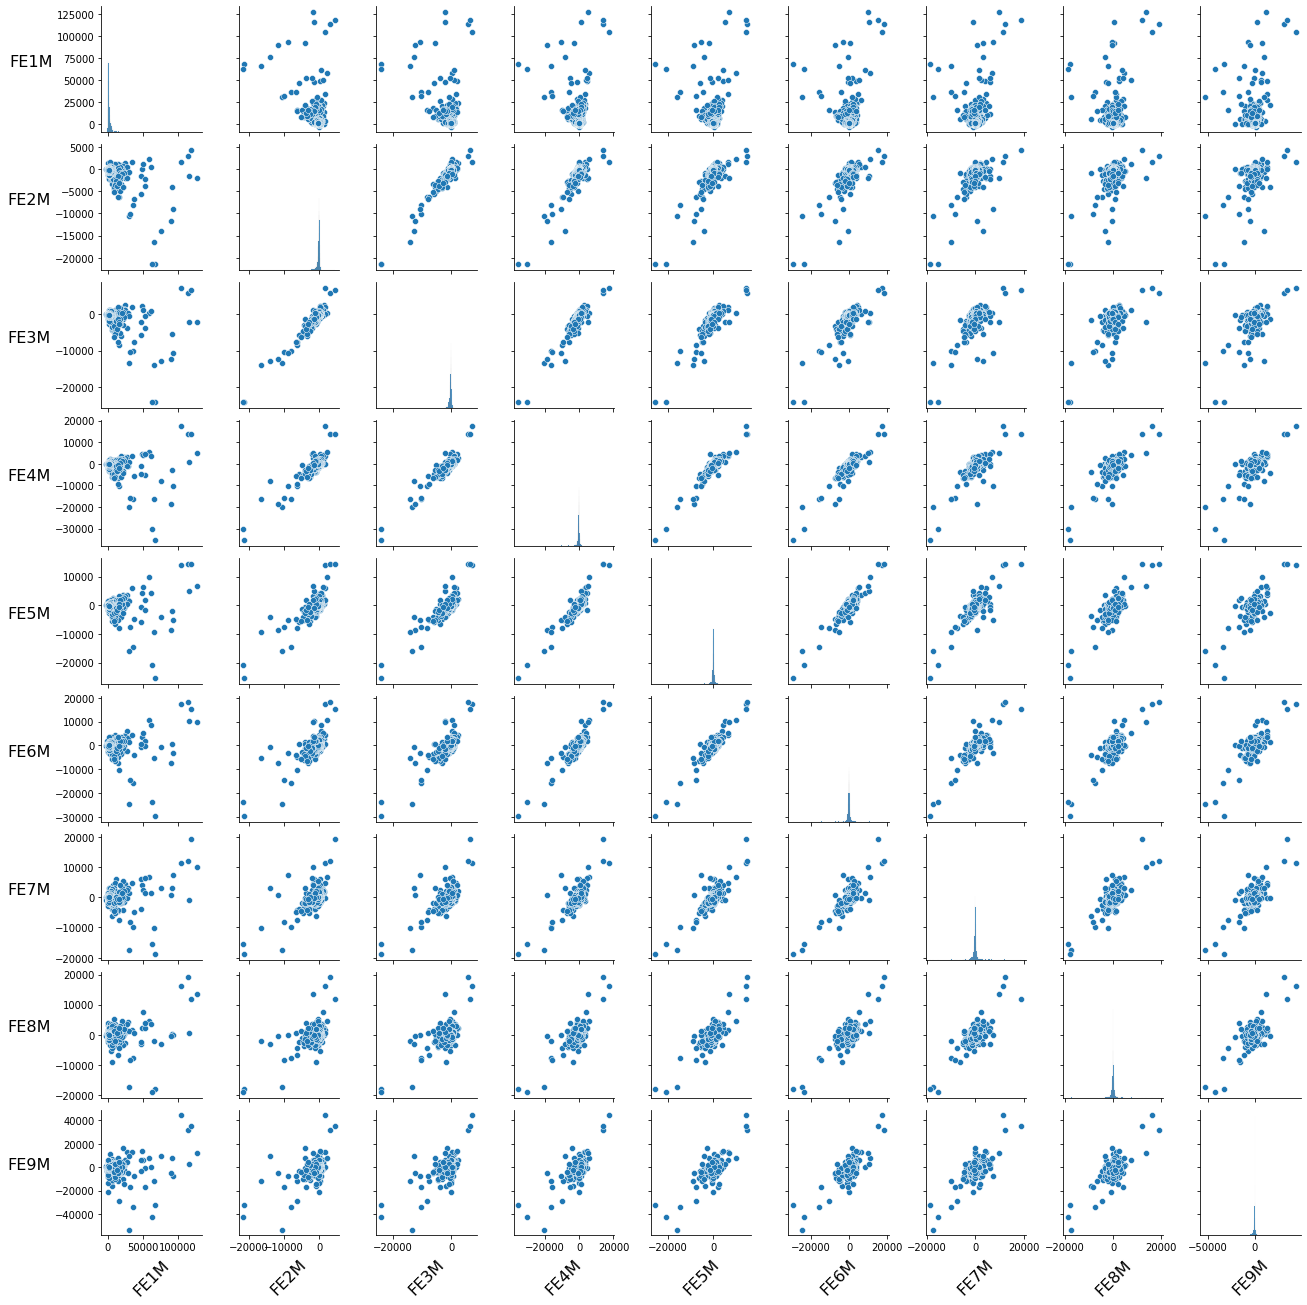

In [ ]:
# comparação dos atributos aos pares
fn.DispersaoPares(Modelo[atributosFEM])

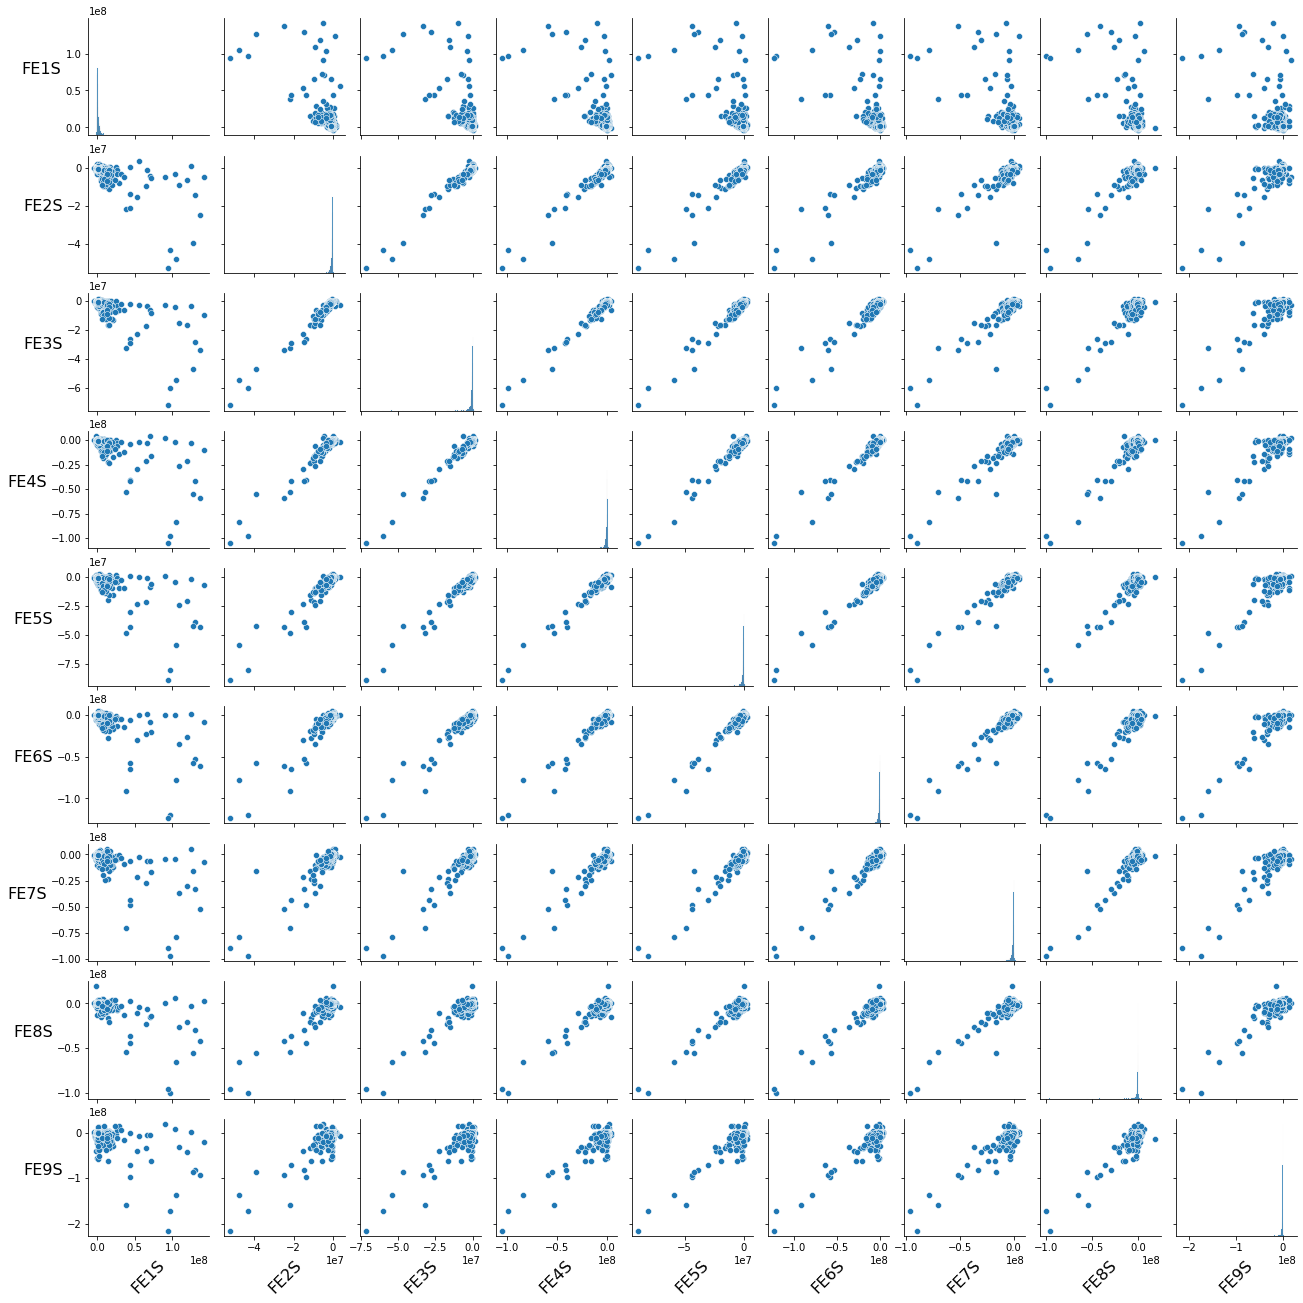

In [ ]:
fn.DispersaoPares(Modelo[atributosFES])

## Análise dados Grau Instrução

In [ ]:
# Lista de atributos de GrauInstrução
atributosGIM = fn.ListaPrefixo(list(Modelo),'GI','M')
atributosGIS = fn.ListaPrefixo(list(Modelo),'GI','S')
atributosGI = atributosGIM+atributosGIS

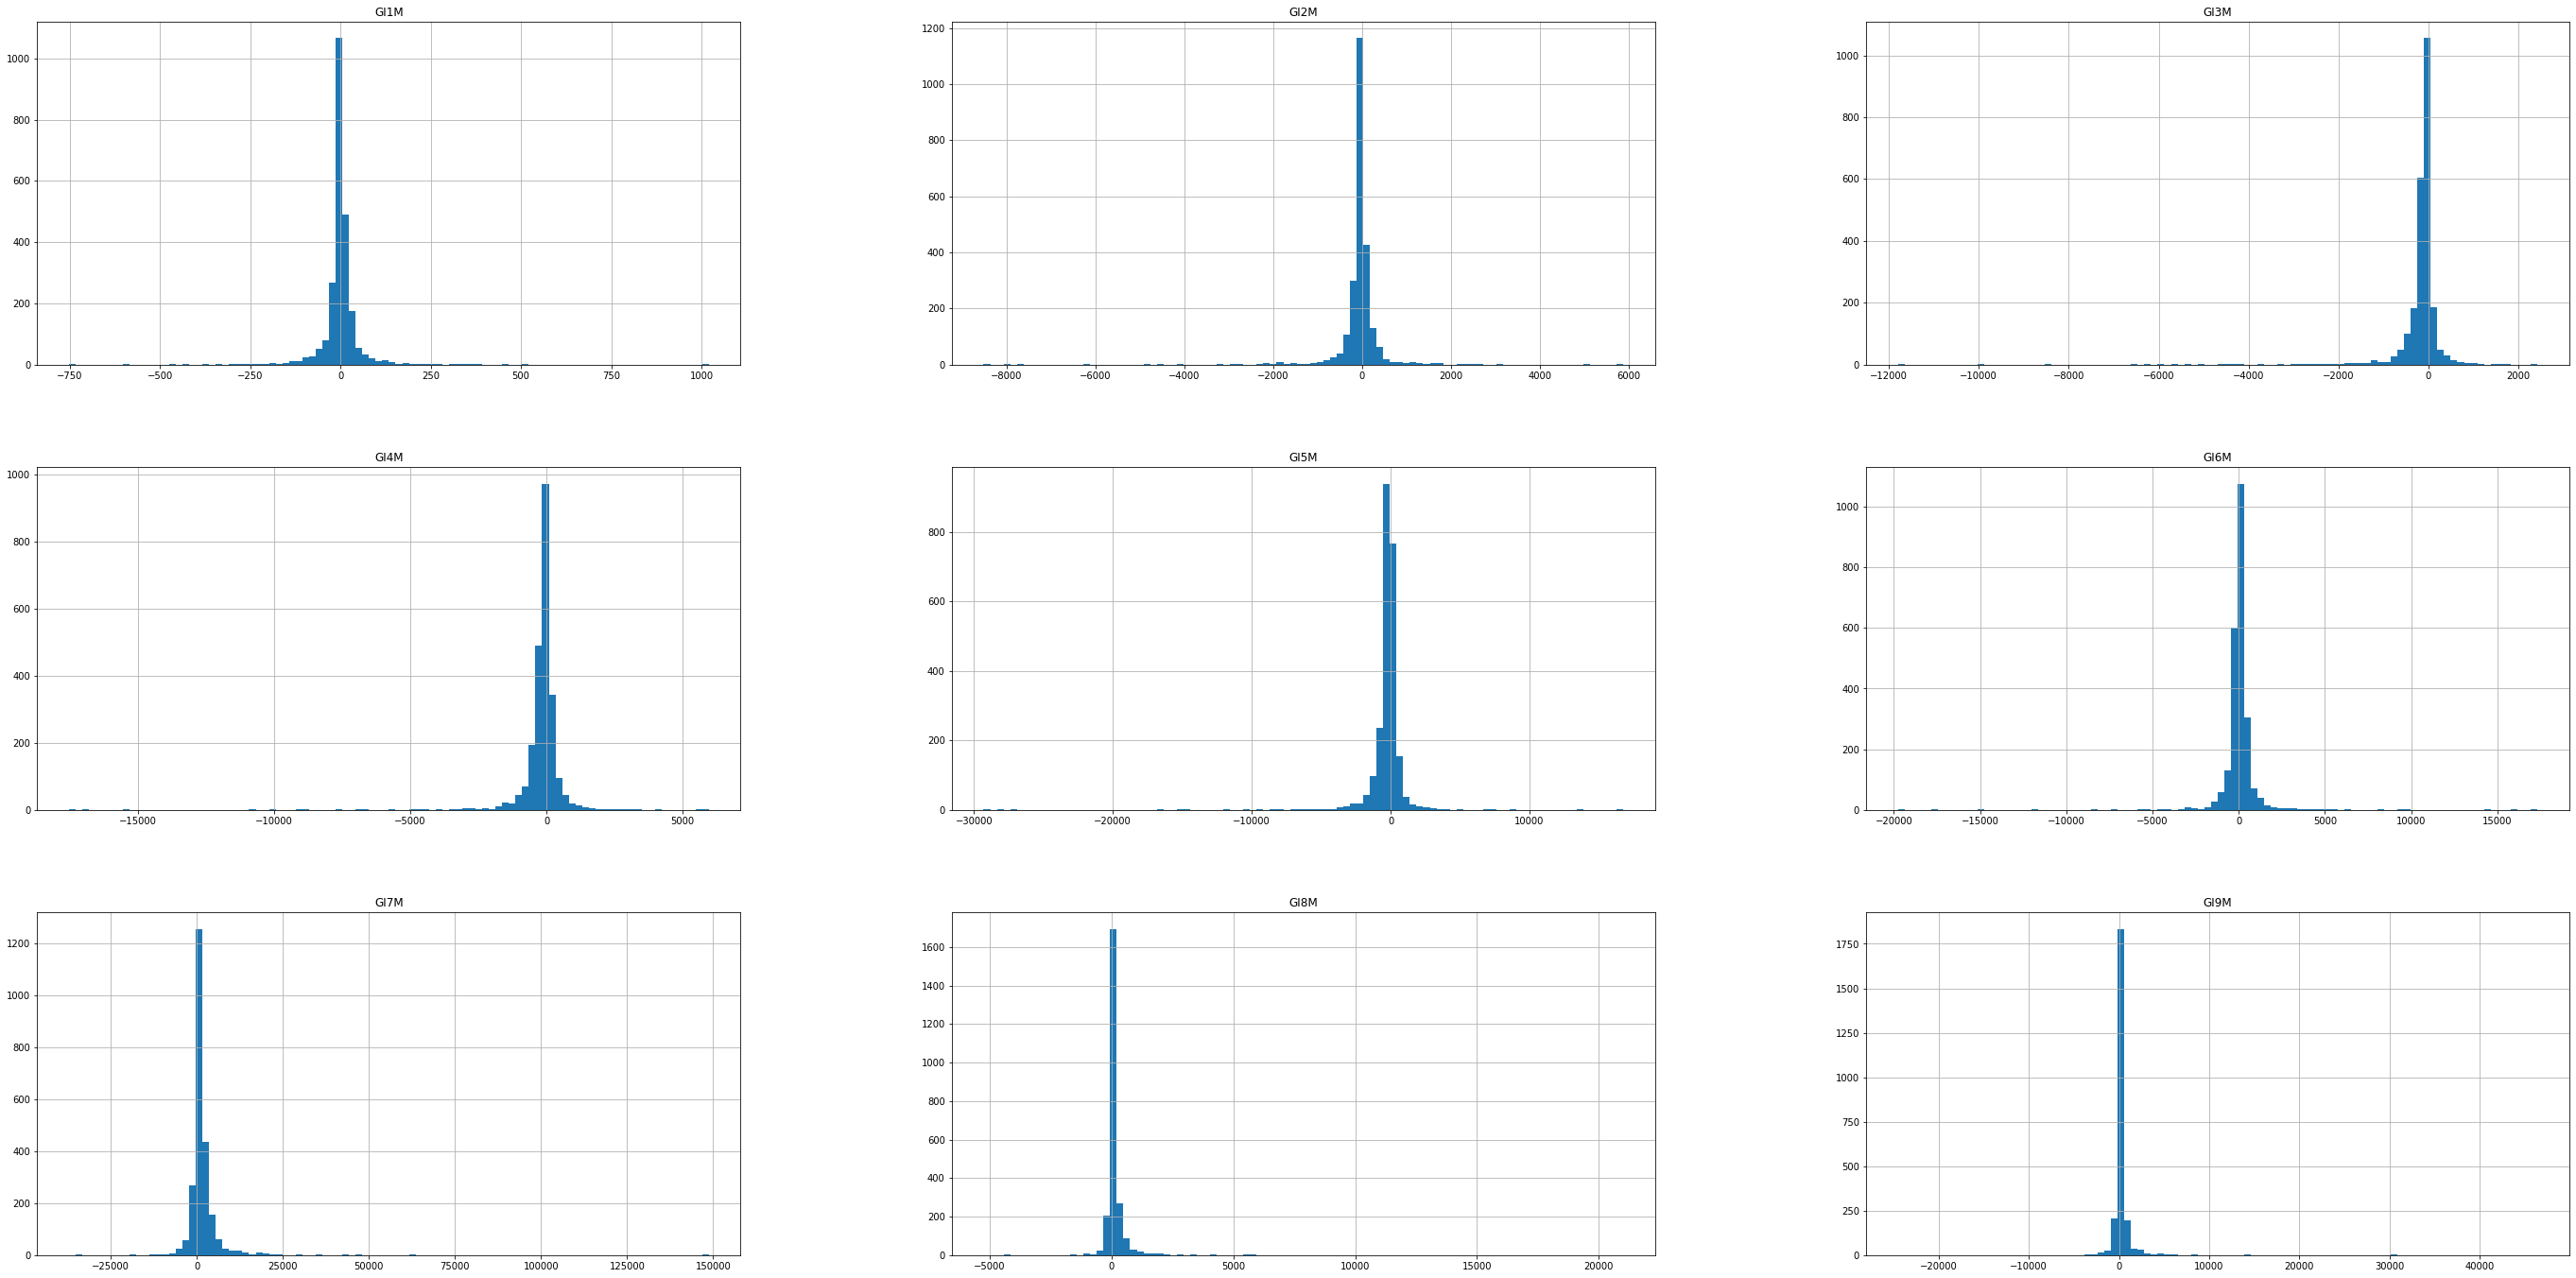

In [ ]:
# histórico da primeira metade dos atributos
hist = Modelo.hist(column=atributosGIM,figsize=(48,24),bins=96)     

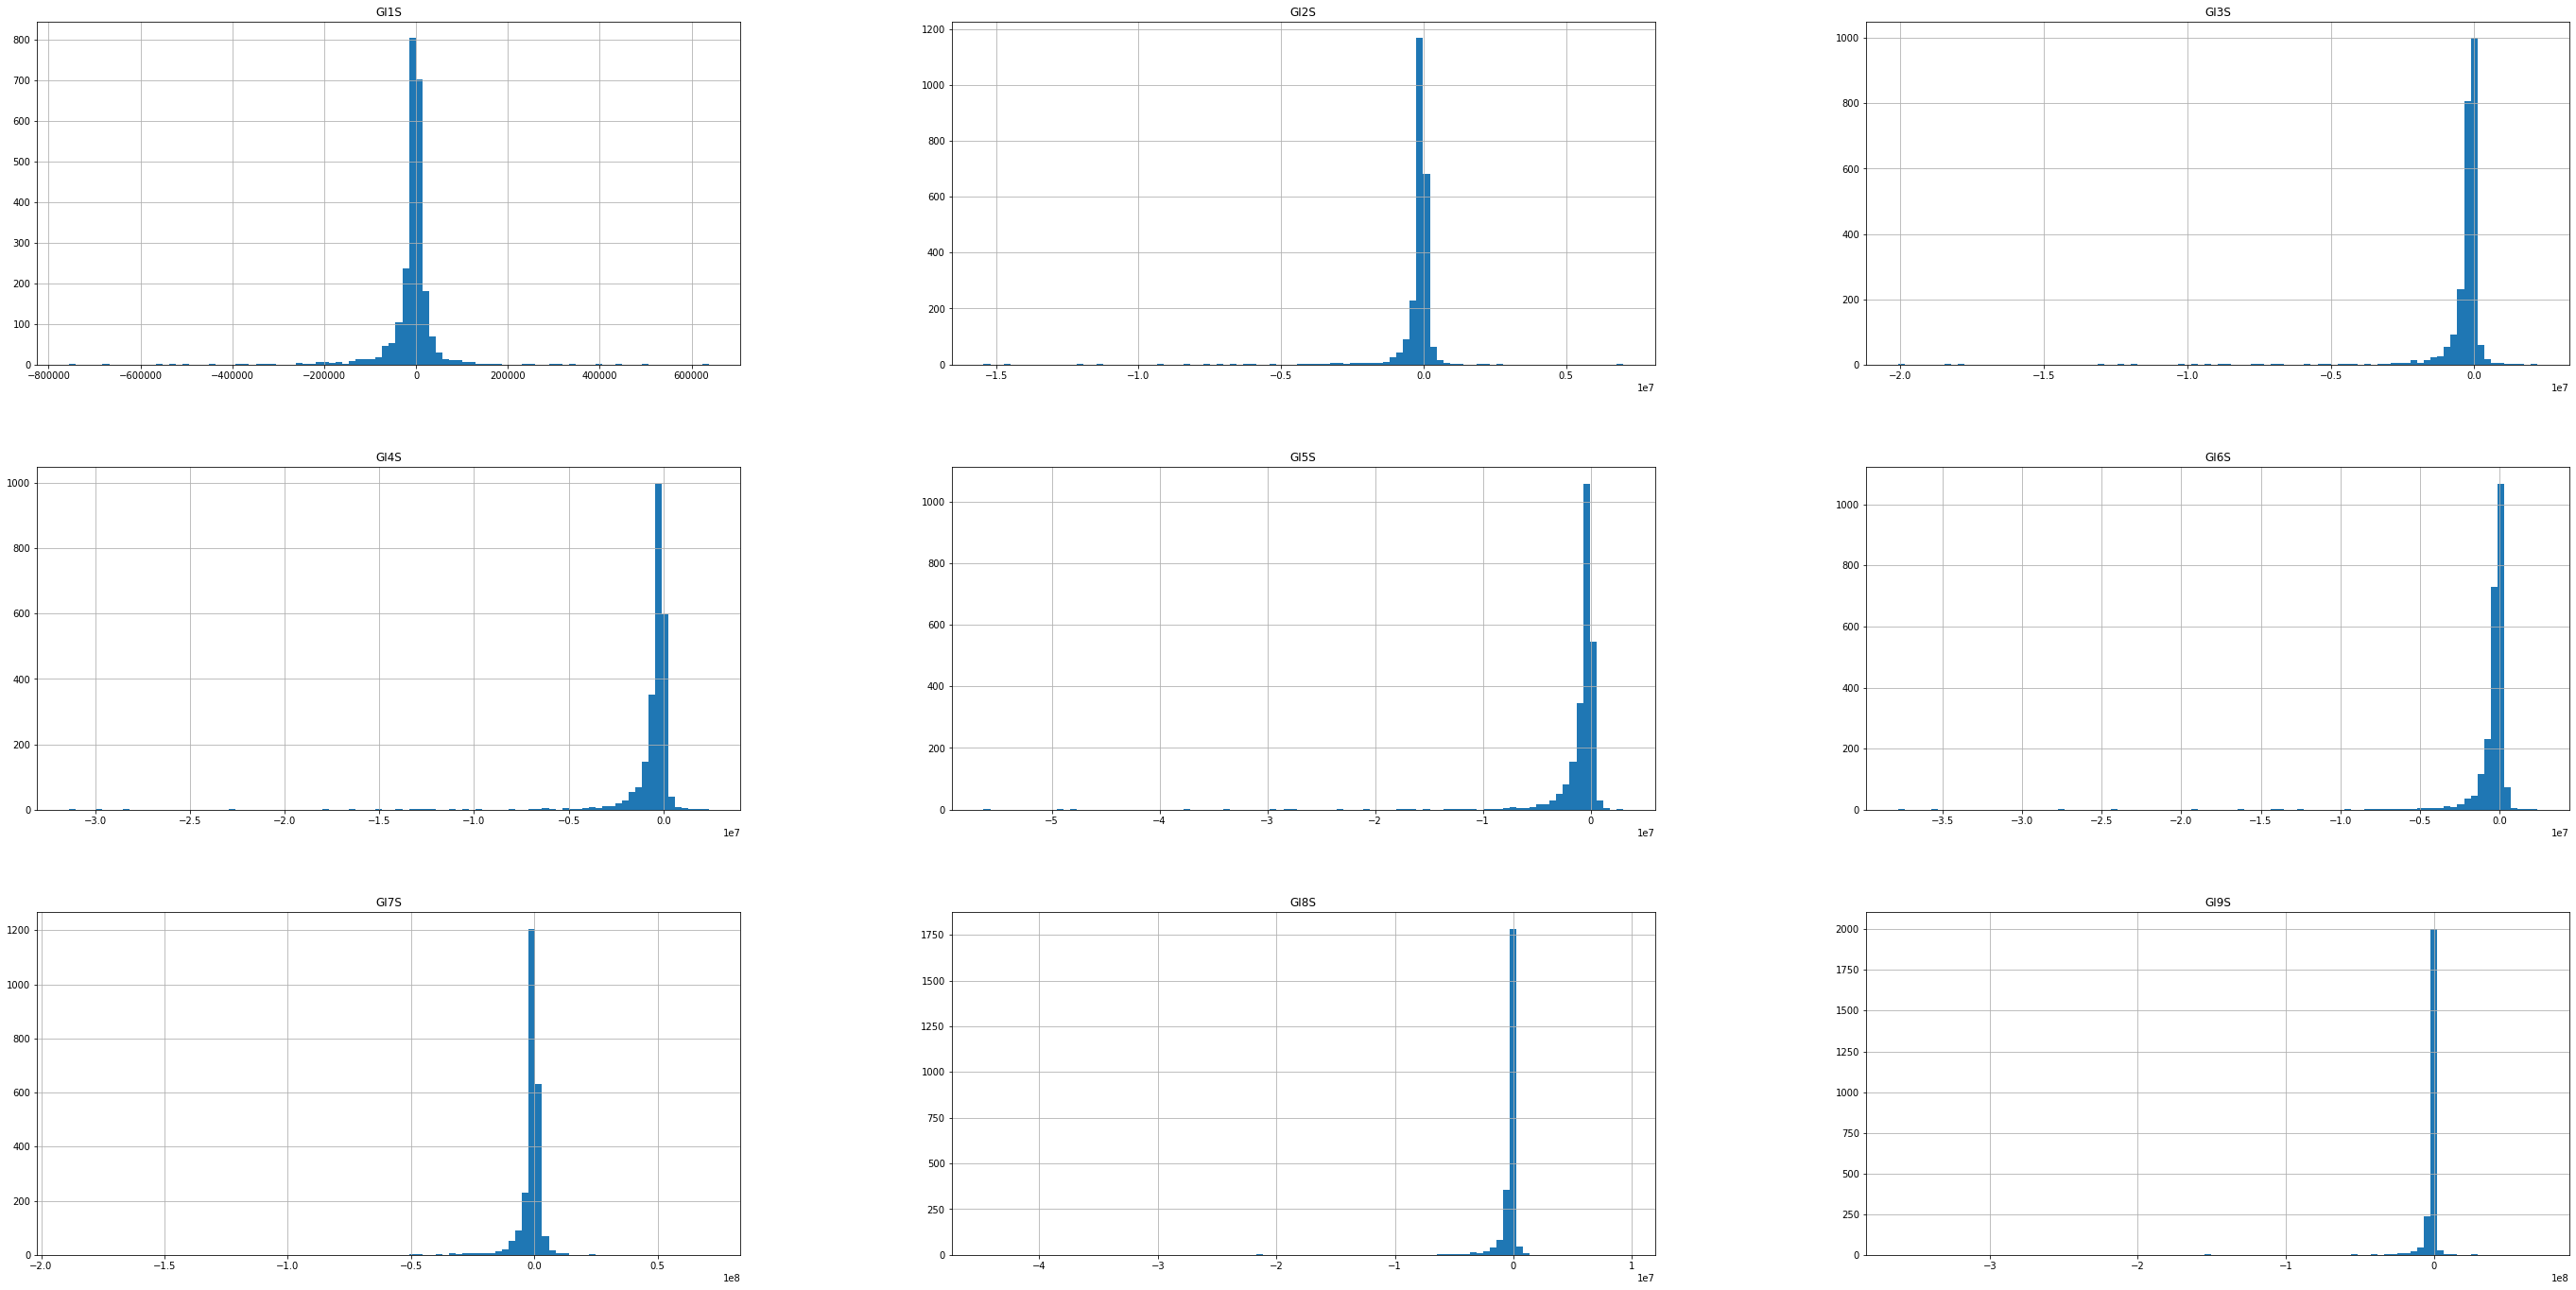

In [ ]:
# histórico da segunda metade dos atributos
hist = Modelo.hist(column=atributosGIS,figsize=(48,24),bins=96)  

In [ ]:
# correlação entre os parâmetros
temp = Modelo.drop(columns='PIB').loc[:,atributosGI+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

               GI1M    GI2M    GI3M    GI4M    GI5M    GI6M    GI7M    GI8M  \
GI1M         1.0000  0.3230  0.1428  0.2992  0.2869  0.3834  0.3538  0.2893   
GI2M         0.3230  1.0000  0.5777  0.7243  0.7017  0.6693  0.3769  0.3461   
GI3M         0.1428  0.5777  1.0000  0.7474  0.7061  0.3396 -0.1397 -0.1202   
GI4M         0.2992  0.7243  0.7474  1.0000  0.8802  0.7214  0.2932  0.2685   
GI5M         0.2869  0.7017  0.7061  0.8802  1.0000  0.7633  0.3943  0.4018   
GI6M         0.3834  0.6693  0.3396  0.7214  0.7633  1.0000  0.7609  0.7151   
GI7M         0.3538  0.3769 -0.1397  0.2932  0.3943  0.7609  1.0000  0.9400   
GI8M         0.2893  0.3461 -0.1202  0.2685  0.4018  0.7151  0.9400  1.0000   
GI9M         0.3115  0.3552 -0.1110  0.2951  0.3901  0.7452  0.9260  0.9220   
GI1S         0.8493  0.4088  0.3837  0.4490  0.4366  0.3863  0.1856  0.1628   
GI2S         0.2182  0.8533  0.8206  0.7988  0.7525  0.4969  0.0280  0.0297   
GI3S         0.0720  0.5328  0.9564  0.7251  0.6908 

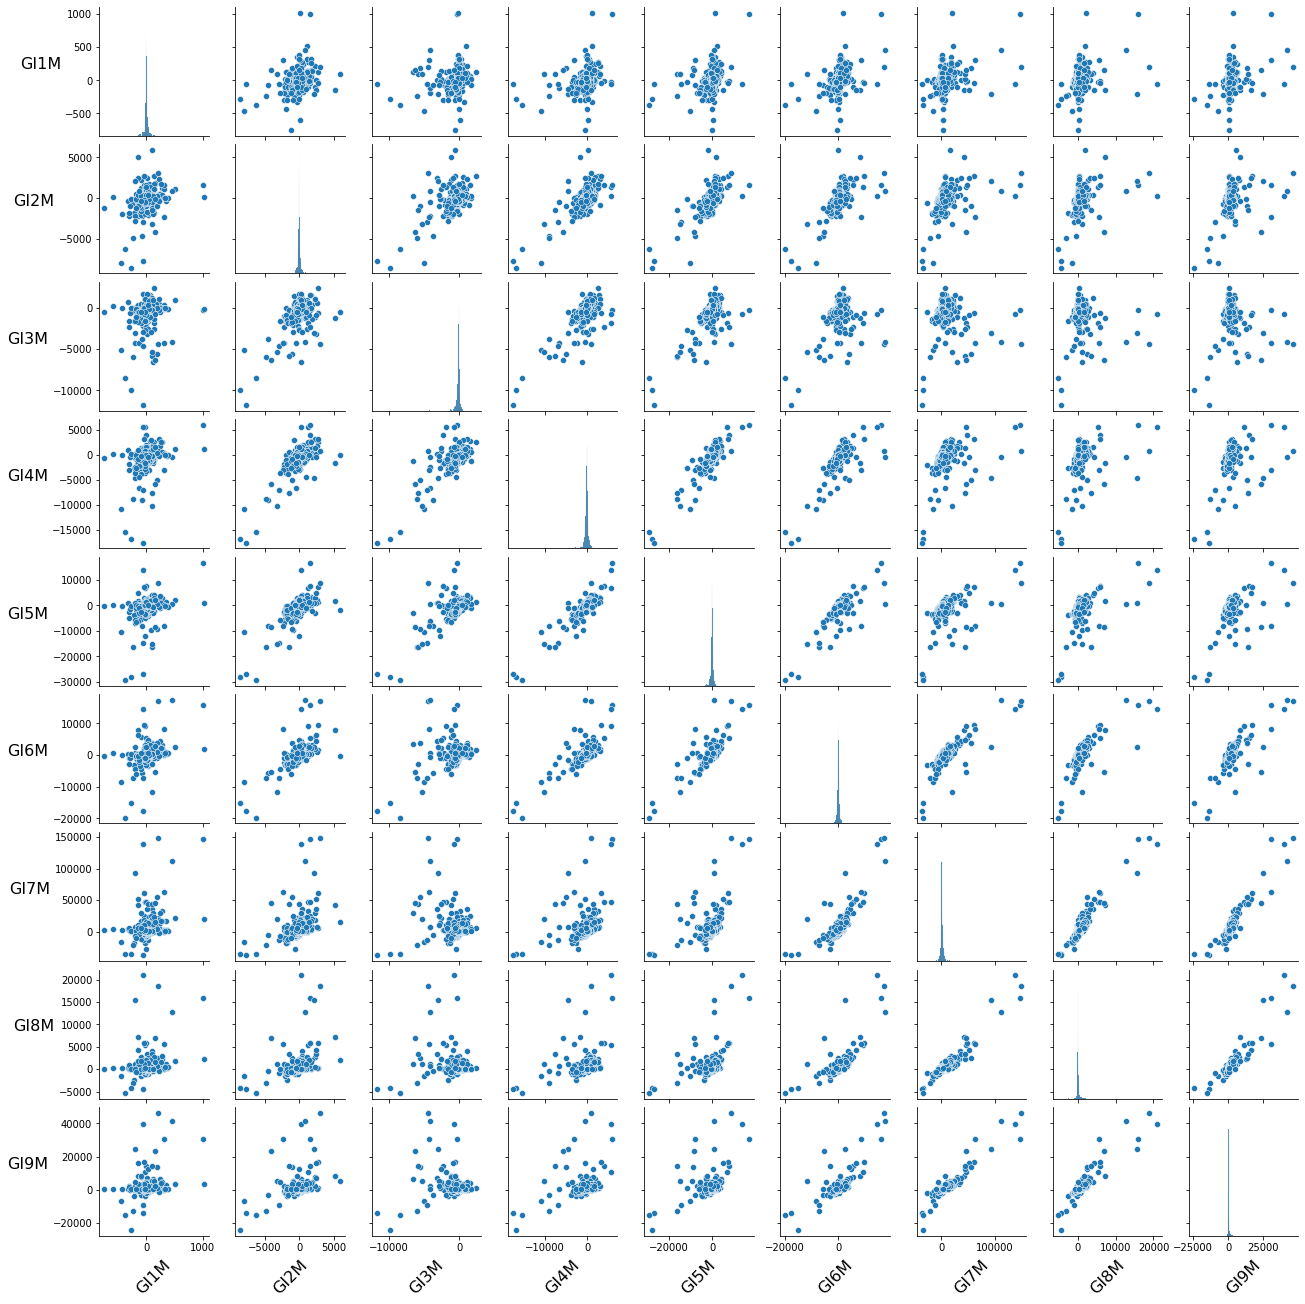

In [ ]:
# comparação dos atributos aos pares
fn.DispersaoPares(Modelo[atributosGIM])

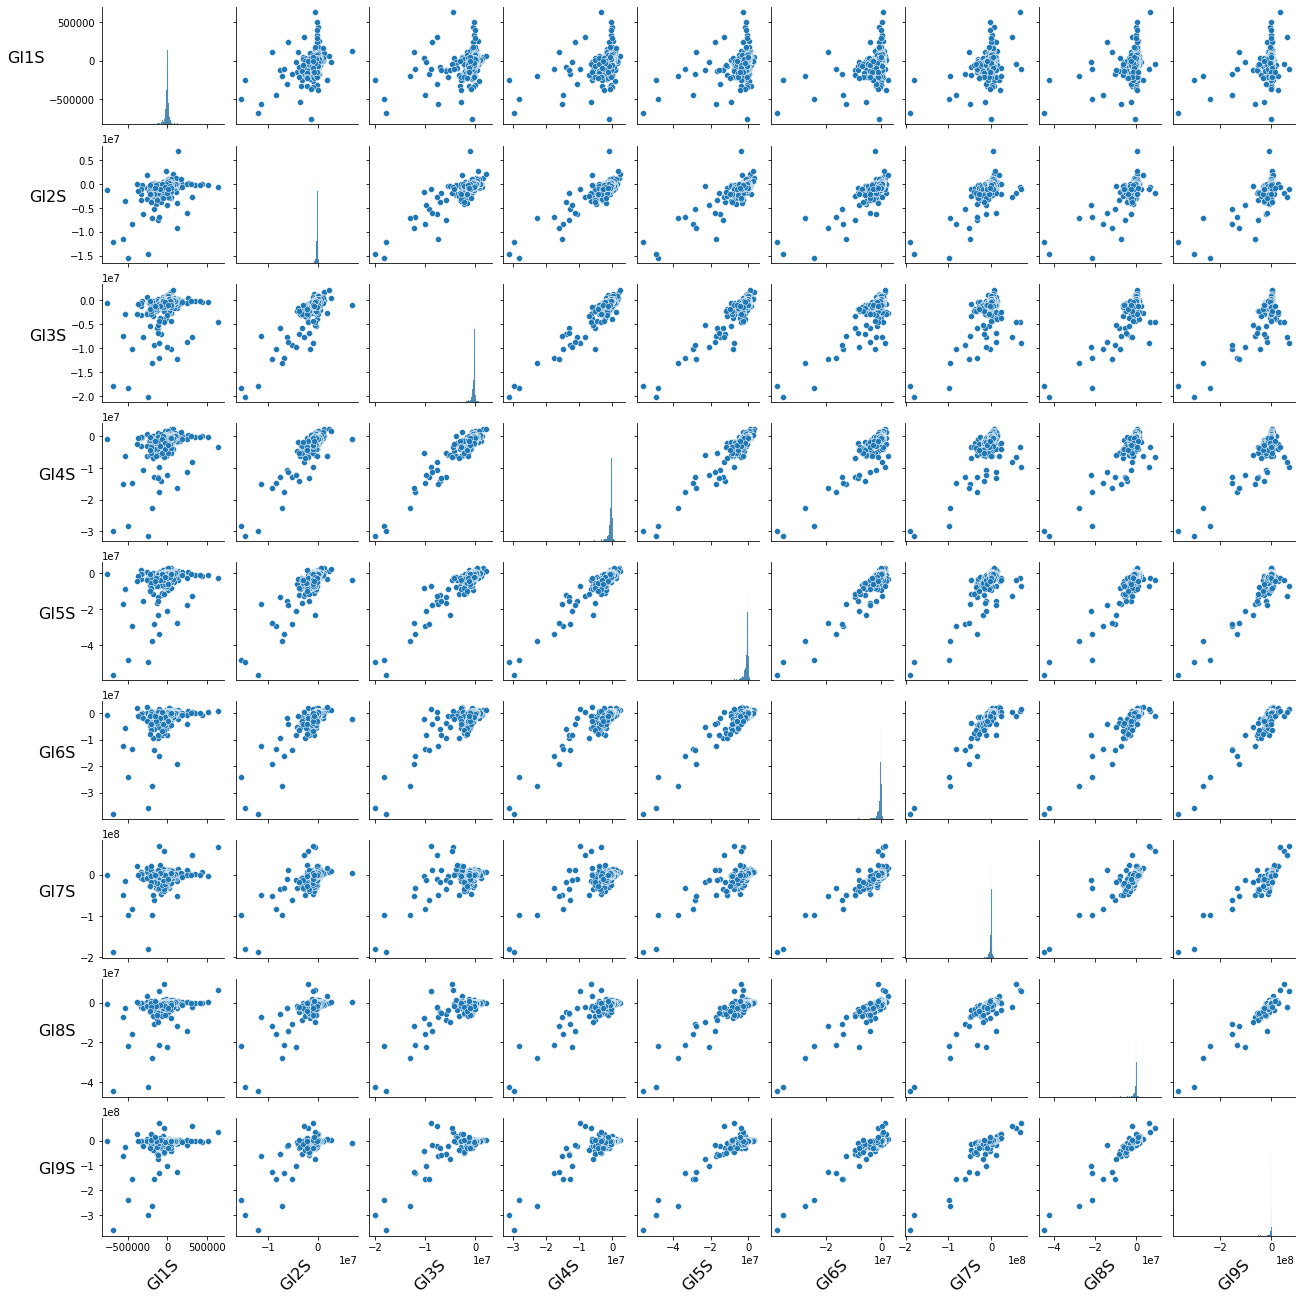

In [ ]:
fn.DispersaoPares(Modelo[atributosGIS])

## Análise dados Raça/Cor

In [ ]:
# Lista de atributos de FaixaEmpr
atributosRCM = fn.ListaPrefixo(list(Modelo),'RC','M')
atributosRCS = fn.ListaPrefixo(list(Modelo),'RC','S')
atributosRC = atributosRCM+atributosRCS

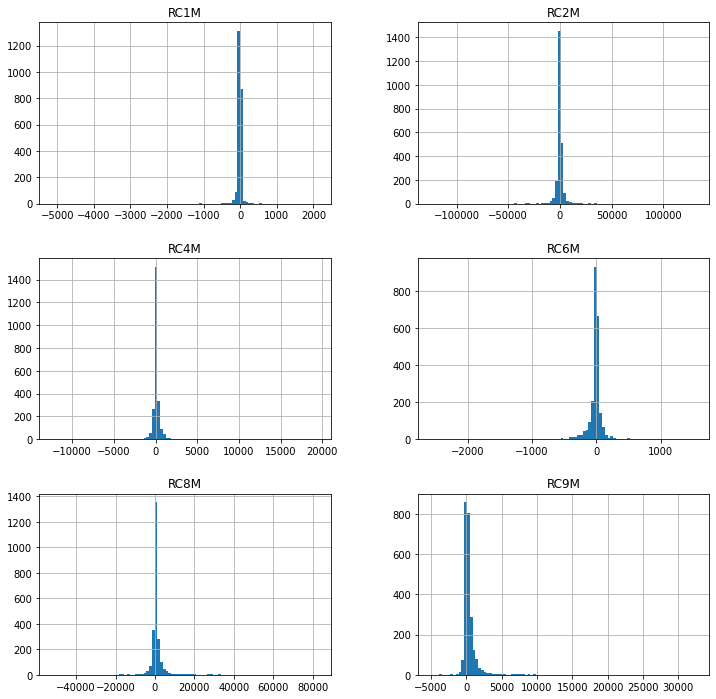

In [ ]:
# histórico da primeira metade dos atributos
hist = Modelo.hist(column=atributosRCM,figsize=(12,12),bins=96)     

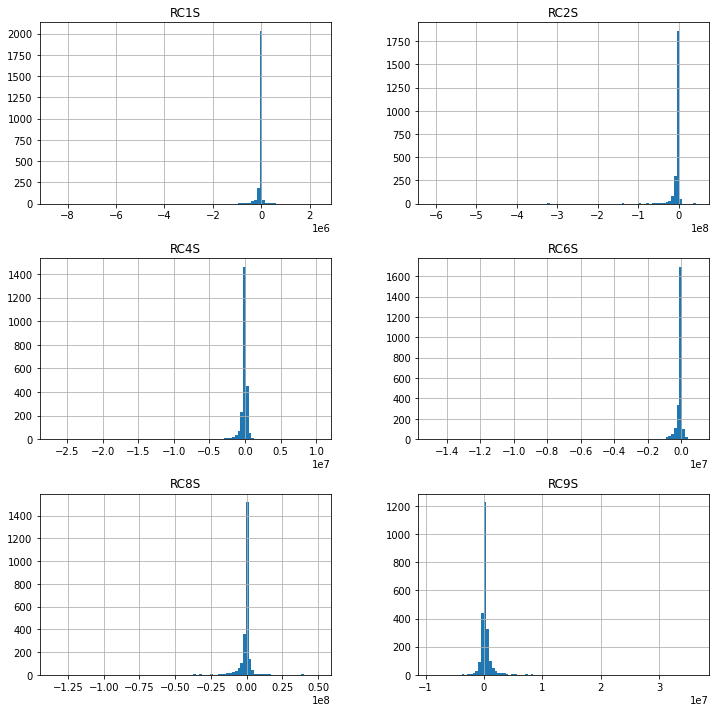

In [ ]:
# histórico da segunda metade dos atributos
hist = Modelo.hist(column=atributosRCS,figsize=(12,12),bins=96)  

In [ ]:
# correlação entre os parâmetros
temp = Modelo.drop(columns='PIB').loc[:,atributosRC+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

               RC1M    RC2M    RC4M    RC6M    RC8M    RC9M    RC1S    RC2S  \
RC1M         1.0000  0.1744  0.0467  0.2666  0.0446 -0.1029  0.8703  0.2271   
RC2M         0.1744  1.0000  0.6557  0.5970  0.5241  0.2906  0.1741  0.6478   
RC4M         0.0467  0.6557  1.0000  0.4194  0.8102  0.6841 -0.1641  0.0400   
RC6M         0.2666  0.5970  0.4194  1.0000  0.3869  0.0901  0.2672  0.4786   
RC8M         0.0446  0.5241  0.8102  0.3869  1.0000  0.6808 -0.1636 -0.0115   
RC9M        -0.1029  0.2906  0.6841  0.0901  0.6808  1.0000 -0.3437 -0.3643   
RC1S         0.8703  0.1741 -0.1641  0.2672 -0.1636 -0.3437  1.0000  0.4923   
RC2S         0.2271  0.6478  0.0400  0.4786 -0.0115 -0.3643  0.4923  1.0000   
RC4S         0.2224  0.7264  0.6573  0.5576  0.4922  0.1901  0.2578  0.6121   
RC6S         0.2542  0.5048 -0.0428  0.5888 -0.0582 -0.4077  0.5112  0.9232   
RC8S         0.2398  0.6119  0.5596  0.5430  0.6880  0.2142  0.2307  0.4679   
RC9S        -0.0791  0.2361  0.6709  0.1095  0.6492 

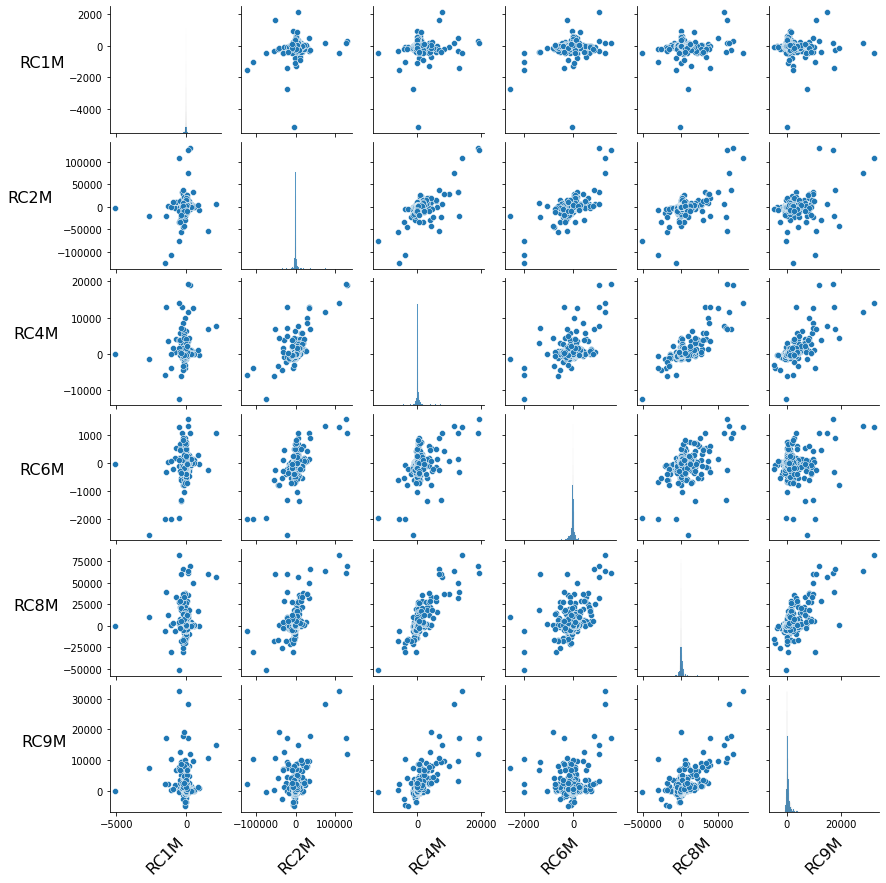

In [ ]:
# comparação dos atributos aos pares
fn.DispersaoPares(Modelo[atributosRCM])

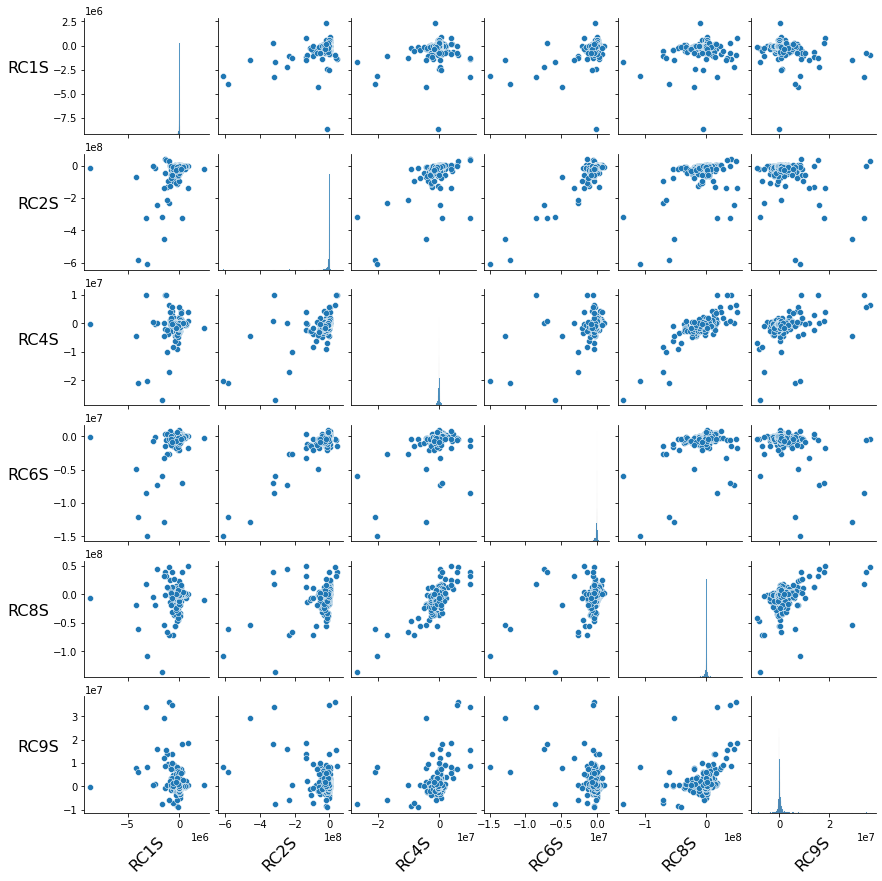

In [ ]:
fn.DispersaoPares(Modelo[atributosRCS])

## Análise dados Gênero

In [ ]:
# Lista de atributos de FaixaEmpr
atributosS = fn.ListaPrefixo(list(Modelo),'SE')

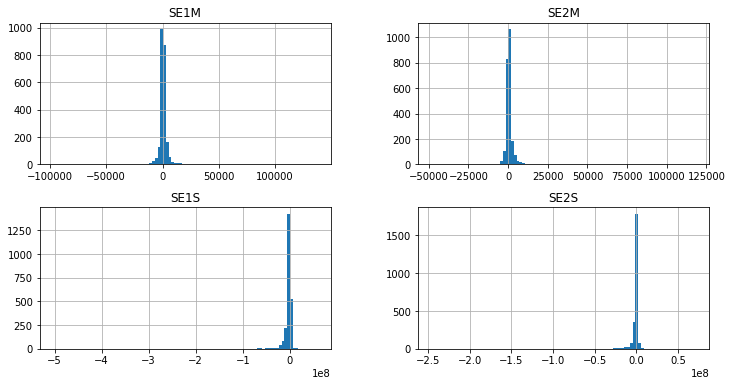

In [ ]:
# histograma dos atributos
hist = Modelo.hist(column=atributosS,figsize=(12,6),bins=96)     

In [ ]:
# correlação entre os parâmetros
temp = Modelo.drop(columns='PIB').loc[:,atributosS+['Crescimento']]
int_fields = temp.dtypes.index
corr = np.corrcoef(temp[int_fields].transpose())
correlacao = pd.DataFrame(data=corr,index=int_fields,columns=int_fields)
print(correlacao)

               SE1M    SE2M    SE1S    SE2S  Crescimento
SE1M         1.0000  0.9282  0.5281  0.6204       0.4278
SE2M         0.9282  1.0000  0.3112  0.4840       0.5951
SE1S         0.5281  0.3112  1.0000  0.9542      -0.3486
SE2S         0.6204  0.4840  0.9542  1.0000      -0.1956
Crescimento  0.4278  0.5951 -0.3486 -0.1956       1.0000


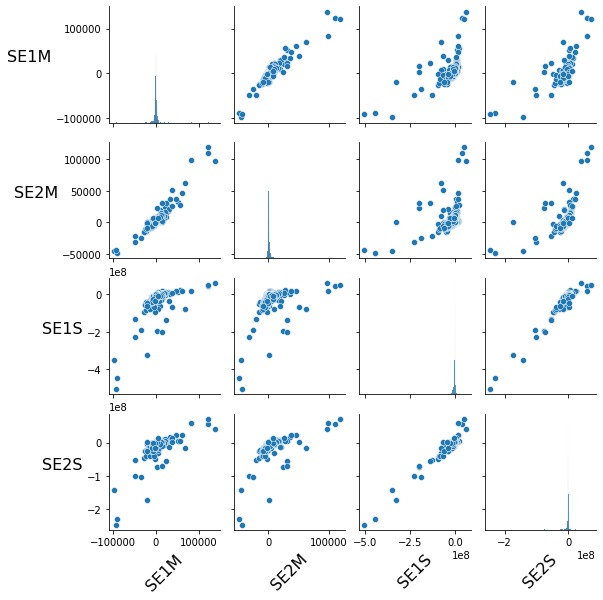

In [ ]:
# comparação dos atributos aos pares
fn.DispersaoPares(Modelo[atributosS])

##Salva Modelo Final

In [ ]:
# salva os dados depois do tratamento na análise
Modelo.to_excel('Modelo_final.xlsx',index=False)